# EXPLORATORY DATA ANALYSIS

In [177]:
# LIBRARIES GET IMPORTED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# WE LOAD DATASET
data = pd.read_csv("/kaggle/input/data-set/styles.csv", on_bad_lines='skip')

# BASIC INFORMATION IS DISPLAYED
print("Dataset Info:")
data.info()
print("\nFirst Few Rows of the Dataset:")
data.head(10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB

First Few Rows of the Dataset:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [31]:
# MISSING VALUES ARE CHECKED
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [35]:
# MISSING VALUE ROWS ARE DROPPED
data = data.dropna()
data.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [44]:
#CHECKING FOR DUPLICATES
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44419    False
44420    False
44421    False
44422    False
44423    False
Length: 44077, dtype: bool

<Axes: >

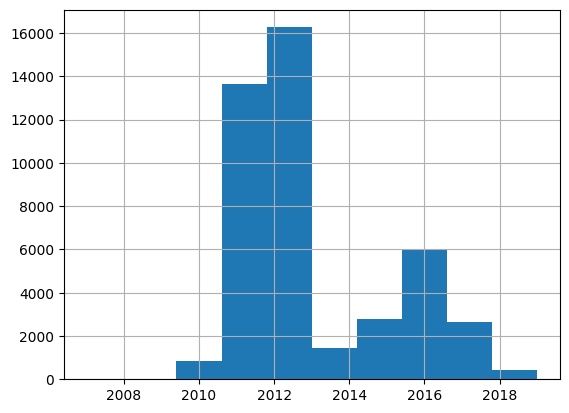

In [45]:
# SHOWING DISTRIBUTION
data['year'].hist(bins=10)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Density'>

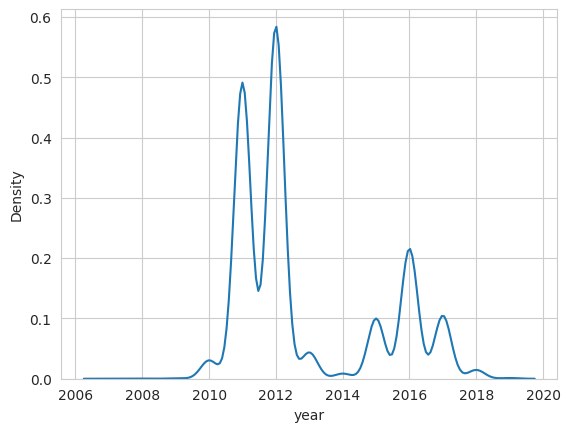

In [109]:
# SHOWING PROBABILITY DISTRIBUTION
sns.kdeplot(data['year'])

gender
Men       22109
Women     18357
Unisex     2126
Boys        830
Girls       655
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

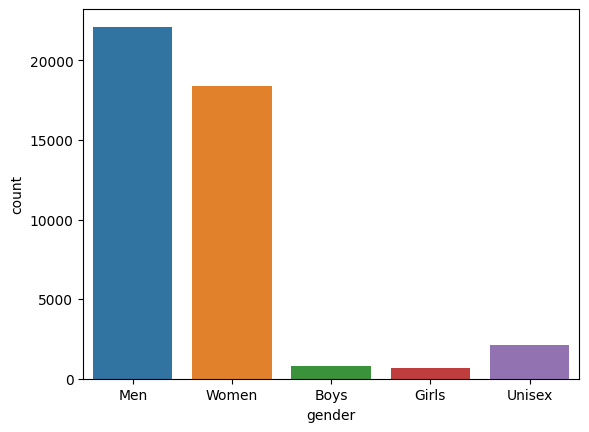

In [53]:
print(data['gender'].value_counts())
sns.countplot(x='gender', data=data)

season
Summer    21440
Fall      11414
Winter     8511
Spring     2712
Name: count, dtype: int64
year
2012.0    16268
2011.0    13634
2016.0     5998
2015.0     2775
2017.0     2649
2013.0     1205
2010.0      846
2018.0      404
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: count, dtype: int64


<Axes: xlabel='season', ylabel='year'>

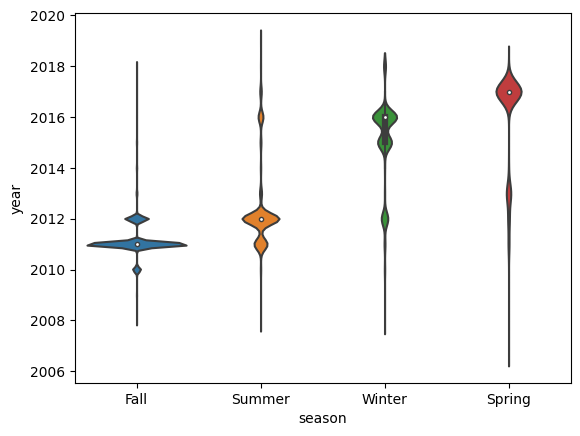

In [84]:
print(data['season'].value_counts())
print(data['year'].value_counts())

sns.violinplot(x='season', y='year', data=data)

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# SETTING SEABORN STYLE
sns.set_style("whitegrid")

seasons = sorted(data['season'].dropna().astype(str).unique())

print("Season Distribution:\n", data['season'].value_counts(), "\n")
print("Gender Distribution:\n", data['gender'].value_counts(), "\n")
print("Product Display Name:\n", data['productDisplayName'].value_counts(), "\n")


Season Distribution:
 season
Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: count, dtype: int64 

Gender Distribution:
 gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64 

Product Display Name:
 productDisplayName
Lucera Women Silver Earrings                         82
Lucera Women Silver Pendant                          56
Lucera Women Silver Ring                             50
Catwalk Women Black Heels                            48
Q&Q Men Black Dial Watch                             42
                                                     ..
Inkfruit Mens Chain Reaction T-shirt                  1
Fabindia Men Striped Green Shirt                      1
United Colors of Benetton Girls Red Printed Dress     1
Converse Unisex Floral Print Casual Shoes             1
Jockey Women Pink Briefs                              1
Name: count, Length: 31121, dtype: int64 



In [75]:
data['productDisplayName'].str.split().explode().value_counts()

productDisplayName
Men               19127
Women             14738
Black              9644
Blue               6561
White              5738
                  ...  
Sauve                 1
(A168)                1
MTP-1192A-1ADF        1
Ceremonies            1
A485                  1
Name: count, Length: 9278, dtype: int64

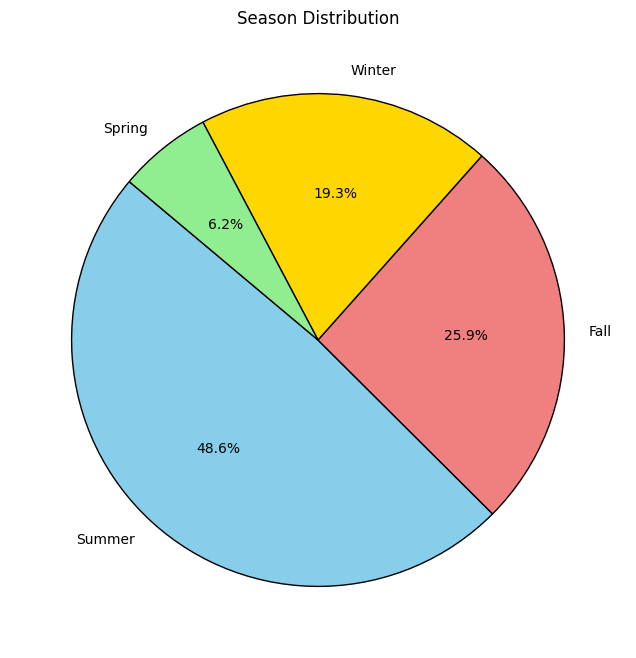

In [72]:
season_counts = data['season'].value_counts()

plt.figure(figsize=(8, 8))  
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightcoral', 'gold', 'lightgreen'], startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Season Distribution")
plt.show()


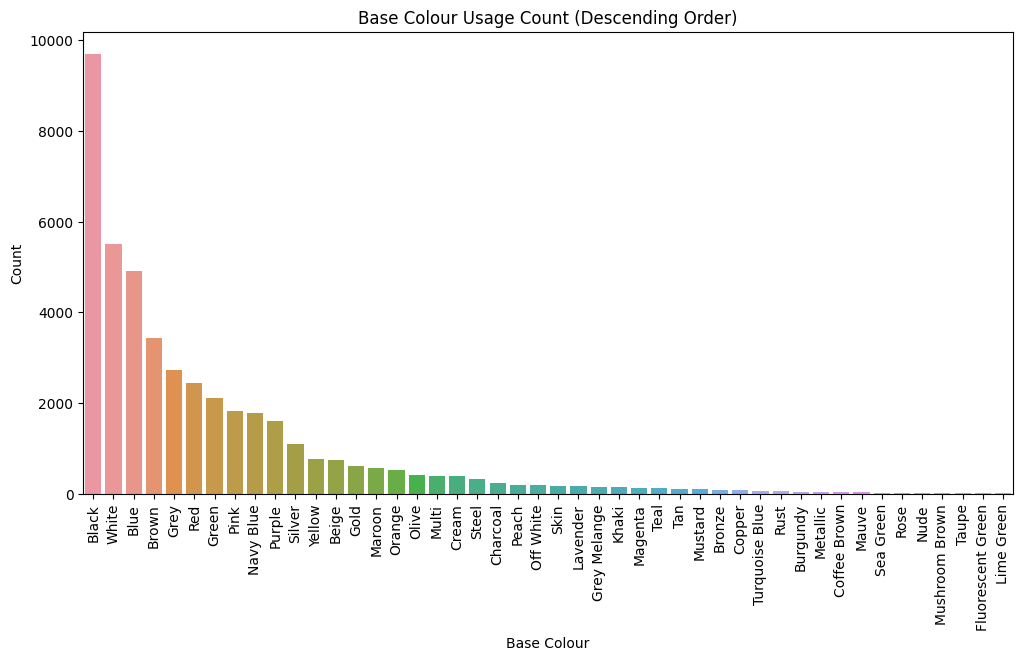

In [76]:
color_article_counts = data.groupby(['baseColour'])['articleType'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=color_article_counts.index, y=color_article_counts.values)

plt.xticks(rotation=90)
plt.title("Base Colour Usage Count (Descending Order)")
plt.xlabel("Base Colour")
plt.ylabel("Count")

plt.show()


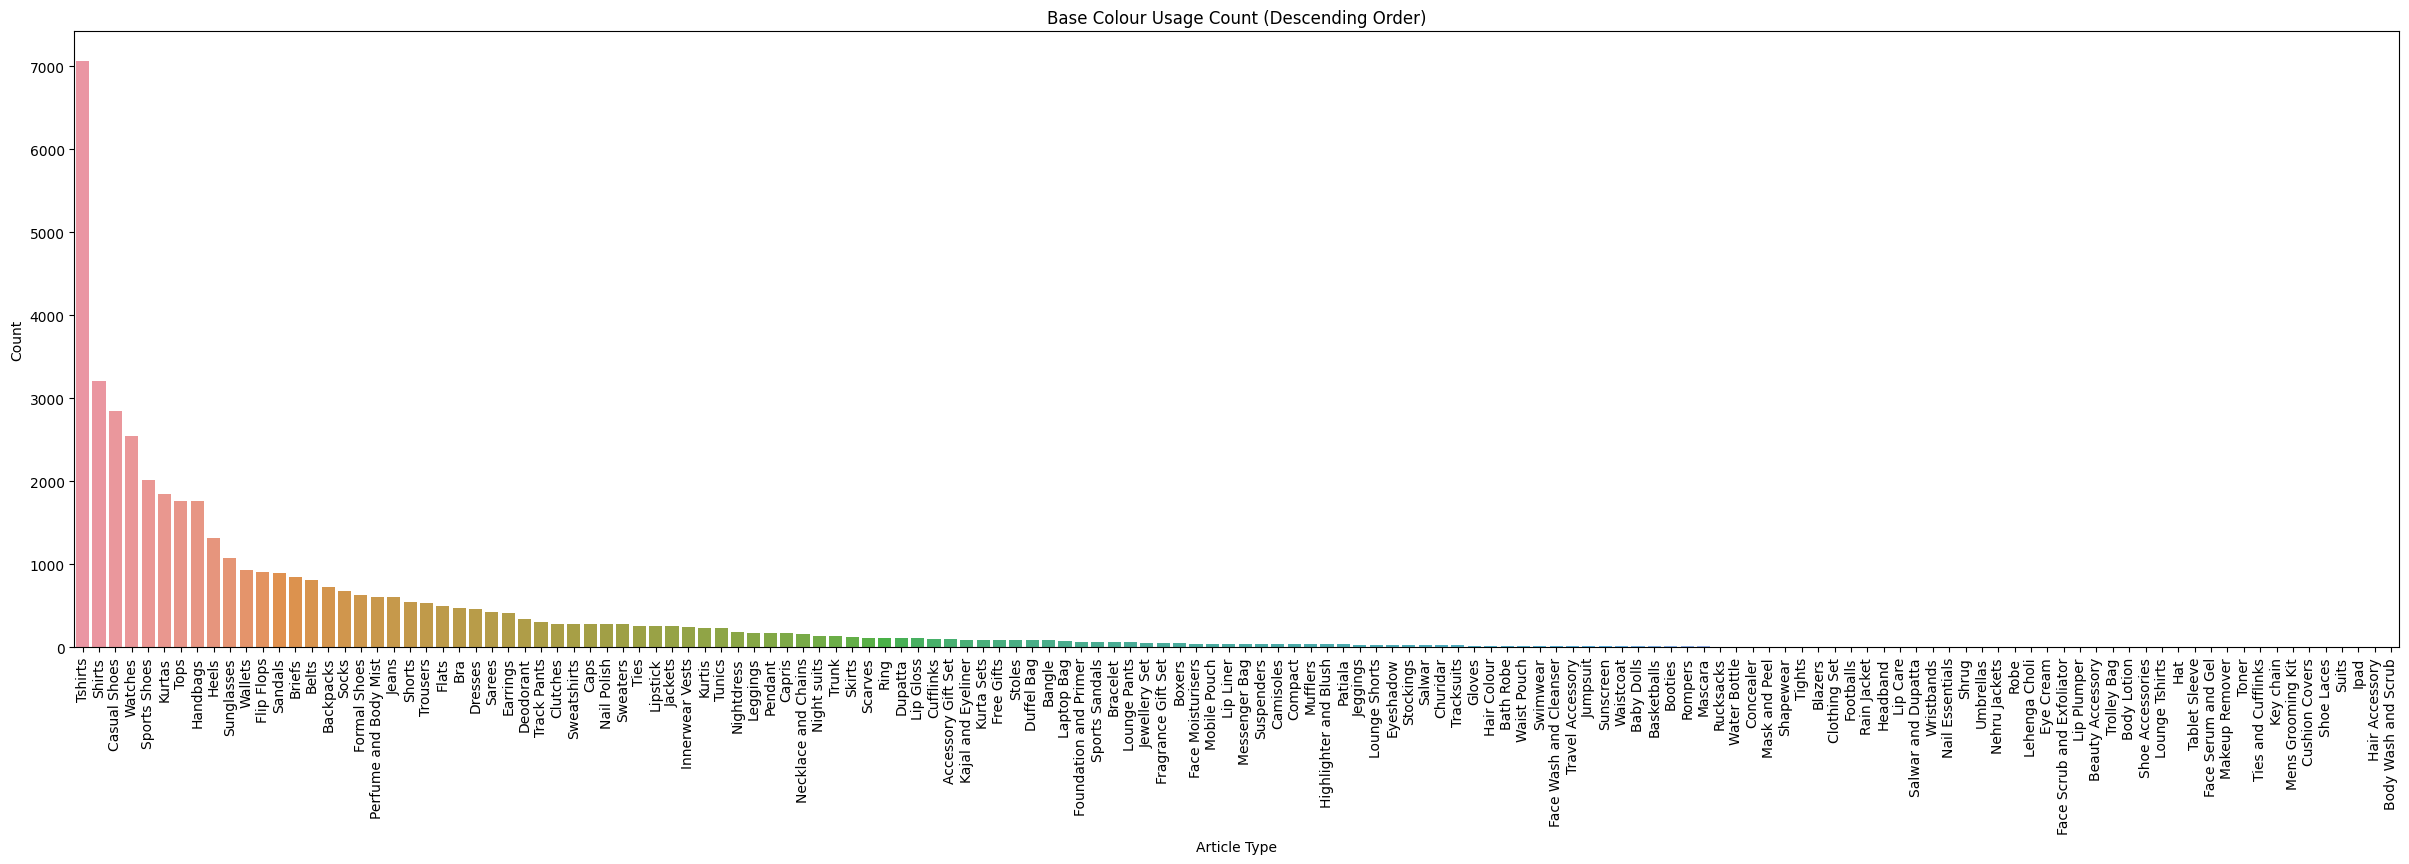

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# COUNTS EACH BASECOLOUR OCCURENCE WITHIN ARTICLETYPE AND SORTS IN DESCENDING ORDER
color_article_counts = data.groupby(['articleType'])['baseColour'].count().sort_values(ascending=False)

# PLOT BAR GRAPGH
plt.figure(figsize=(30, 8))
sns.barplot(x=color_article_counts.index, y=color_article_counts.values)

plt.xticks(rotation=90)
plt.title("Base Colour Usage Count (Descending Order)")
plt.xlabel("Article Type")  
plt.ylabel("Count")

plt.show()


# CNN MODEL

In [146]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm  # USED FOR PROGRESS BAR

IMAGE_DIR = "/kaggle/input/data-set/myntradataset/images"
CSV_FILE = "/kaggle/input/data-set/myntradataset/styles.csv"

df = pd.read_csv(CSV_FILE, on_bad_lines='skip')

# DROPPING MISSING VALUES
df.dropna(subset=['baseColour', 'articleType', 'season', 'gender'], inplace=True)

# LABEL ENCODING
label_encoders = {}
for column in ['baseColour', 'articleType', 'season', 'gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  

# CREATING CUSTOM DATASET CLASS
class FashionDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)  
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_name = str(row['id']) + ".jpg"
        img_path = os.path.join(self.img_dir, img_name)

        try:
            image = Image.open(img_path).convert('RGB')
        except (FileNotFoundError, OSError):  
            return None

        if self.transform:
            image = self.transform(image)

        labels = torch.tensor([row['baseColour'], row['articleType'], row['season'], row['gender']], dtype=torch.long)
        return image, labels

# CUSTOM COLLATE FUNCTION TO FILTER OUT None VALUES
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return None, None
    return torch.stack([b[0] for b in batch]), torch.stack([b[1] for b in batch])

# IMAGE TRANSFORMATIONS
transform = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) 
])

# DATASET AND DATALOADERS
dataset = FashionDataset(df, IMAGE_DIR, transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# ADDING CUSTOM CNN MODEL
class FashionCNN(nn.Module):
    def __init__(self, num_colors, num_types, num_seasons, num_genders):
        super(FashionCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 16 * 16, 512),  
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
        )

        # SEPERATED OUTPUTLAYES FOR MULTI LABEL CLASSIFICATION
        self.fc_color = nn.Linear(256, num_colors)
        self.fc_type = nn.Linear(256, num_types)
        self.fc_season = nn.Linear(256, num_seasons)
        self.fc_gender = nn.Linear(256, num_genders)

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # FLATTEN
        x = self.fc_layers(x)

        color_out = self.fc_color(x)
        type_out = self.fc_type(x)
        season_out = self.fc_season(x)
        gender_out = self.fc_gender(x)

        return color_out, type_out, season_out, gender_out

# INITIALIZATION OF MODEL
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_colors = len(label_encoders['baseColour'].classes_)
num_types = len(label_encoders['articleType'].classes_)
num_seasons = len(label_encoders['season'].classes_)
num_genders = len(label_encoders['gender'].classes_)

model = FashionCNN(num_colors, num_types, num_seasons, num_genders).to(device)

# USING OPTIMIZERS AND LOSS
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TRAINING LOOP
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    progress_bar = tqdm(train_loader, desc=f"Training", leave=True)  # tqdm for progress bar
    
    for batch_idx, (images, labels) in enumerate(progress_bar):
        if images is None or labels is None:  # Skip empty batches
            continue

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        color_out, type_out, season_out, gender_out = model(images)

        loss1 = criterion(color_out, labels[:, 0])
        loss2 = criterion(type_out, labels[:, 1])
        loss3 = criterion(season_out, labels[:, 2])
        loss4 = criterion(gender_out, labels[:, 3])

        loss = loss1 + loss2 + loss3 + loss4
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {loss.item():.4f}")

        # Update tqdm progress bar with loss
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} Completed - Avg Loss: {avg_loss:.4f}")


model.eval()
correct = [0, 0, 0, 0]
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        if images is None or labels is None:
            continue

        images, labels = images.to(device), labels.to(device)

        color_out, type_out, season_out, gender_out = model(images)

        _, pred_color = torch.max(color_out, 1)
        _, pred_type = torch.max(type_out, 1)
        _, pred_season = torch.max(season_out, 1)
        _, pred_gender = torch.max(gender_out, 1)

        correct[0] += (pred_color == labels[:, 0]).sum().item()
        correct[1] += (pred_type == labels[:, 1]).sum().item()
        correct[2] += (pred_season == labels[:, 2]).sum().item()
        correct[3] += (pred_gender == labels[:, 3]).sum().item()

        total += labels.size(0)

# ACCURACY
print(f"Color Accuracy: {correct[0] / total * 100:.2f}%")
print(f"Type Accuracy: {correct[1] / total * 100:.2f}%")
print(f"Season Accuracy: {correct[2] / total * 100:.2f}%")
print(f"Gender Accuracy: {correct[3] / total * 100:.2f}%")



Epoch 1/10


Training:   1%|          | 11/1110 [00:01<02:04,  8.80it/s, loss=9.18]

Batch 10/1110 - Loss: 8.7389


Training:   2%|▏         | 21/1110 [00:02<02:03,  8.85it/s, loss=8.9] 

Batch 20/1110 - Loss: 9.2269


Training:   3%|▎         | 31/1110 [00:03<02:00,  8.99it/s, loss=7.96]

Batch 30/1110 - Loss: 8.4825


Training:   4%|▎         | 41/1110 [00:04<02:00,  8.86it/s, loss=7.32]

Batch 40/1110 - Loss: 7.5817


Training:   5%|▍         | 51/1110 [00:05<02:03,  8.60it/s, loss=6.66]

Batch 50/1110 - Loss: 7.2618


Training:   5%|▌         | 61/1110 [00:06<01:56,  8.97it/s, loss=6.96]

Batch 60/1110 - Loss: 6.7303


Training:   6%|▋         | 71/1110 [00:08<01:57,  8.86it/s, loss=6.38]

Batch 70/1110 - Loss: 6.8185


Training:   7%|▋         | 81/1110 [00:09<01:59,  8.61it/s, loss=6.49]

Batch 80/1110 - Loss: 6.5504


Training:   8%|▊         | 91/1110 [00:10<02:00,  8.48it/s, loss=6.89]

Batch 90/1110 - Loss: 6.6789


Training:   9%|▉         | 101/1110 [00:11<01:51,  9.09it/s, loss=6.53]

Batch 100/1110 - Loss: 6.3587


Training:  10%|█         | 111/1110 [00:12<01:54,  8.73it/s, loss=6.18]

Batch 110/1110 - Loss: 5.5944


Training:  11%|█         | 121/1110 [00:13<01:51,  8.86it/s, loss=5.34]

Batch 120/1110 - Loss: 6.4589


Training:  12%|█▏        | 131/1110 [00:14<01:47,  9.09it/s, loss=5.69]

Batch 130/1110 - Loss: 5.9931


Training:  13%|█▎        | 141/1110 [00:16<01:56,  8.31it/s, loss=5.47]

Batch 140/1110 - Loss: 5.8589


Training:  14%|█▎        | 151/1110 [00:17<01:47,  8.92it/s, loss=6.63]

Batch 150/1110 - Loss: 5.5191


Training:  15%|█▍        | 161/1110 [00:18<01:45,  8.99it/s, loss=5.83]

Batch 160/1110 - Loss: 4.7539


Training:  15%|█▌        | 171/1110 [00:19<01:42,  9.13it/s, loss=5.37]

Batch 170/1110 - Loss: 5.4980


Training:  16%|█▋        | 181/1110 [00:20<01:42,  9.03it/s, loss=4.81]

Batch 180/1110 - Loss: 5.3850


Training:  17%|█▋        | 191/1110 [00:21<01:39,  9.28it/s, loss=5.31]

Batch 190/1110 - Loss: 6.4106


Training:  18%|█▊        | 201/1110 [00:22<01:40,  9.08it/s, loss=5.49]

Batch 200/1110 - Loss: 4.5610


Training:  19%|█▉        | 211/1110 [00:23<01:41,  8.89it/s, loss=4.78]

Batch 210/1110 - Loss: 5.3557


Training:  20%|█▉        | 221/1110 [00:24<01:39,  8.98it/s, loss=4.76]

Batch 220/1110 - Loss: 5.3280


Training:  21%|██        | 231/1110 [00:26<01:43,  8.49it/s, loss=4.63]

Batch 230/1110 - Loss: 4.5889


Training:  22%|██▏       | 241/1110 [00:27<01:39,  8.70it/s, loss=5.67]

Batch 240/1110 - Loss: 5.1085


Training:  23%|██▎       | 251/1110 [00:28<01:37,  8.85it/s, loss=4.41]

Batch 250/1110 - Loss: 5.9296


Training:  24%|██▎       | 261/1110 [00:29<01:38,  8.60it/s, loss=5.48]

Batch 260/1110 - Loss: 5.3925


Training:  24%|██▍       | 271/1110 [00:30<01:36,  8.73it/s, loss=5.37]

Batch 270/1110 - Loss: 4.5535


Training:  25%|██▌       | 281/1110 [00:31<01:36,  8.55it/s, loss=3.43]

Batch 280/1110 - Loss: 4.5464


Training:  26%|██▌       | 291/1110 [00:33<01:35,  8.58it/s, loss=4.69]

Batch 290/1110 - Loss: 4.6328


Training:  27%|██▋       | 301/1110 [00:34<01:36,  8.35it/s, loss=6.22]

Batch 300/1110 - Loss: 4.9688


Training:  28%|██▊       | 311/1110 [00:35<01:35,  8.40it/s, loss=5.22]

Batch 310/1110 - Loss: 4.2106


Training:  29%|██▉       | 321/1110 [00:36<01:31,  8.62it/s, loss=4.39]

Batch 320/1110 - Loss: 5.1607


Training:  30%|██▉       | 331/1110 [00:37<01:27,  8.87it/s, loss=4.73]

Batch 330/1110 - Loss: 5.3656


Training:  31%|███       | 341/1110 [00:38<01:26,  8.86it/s, loss=4.23]

Batch 340/1110 - Loss: 5.1291


Training:  32%|███▏      | 351/1110 [00:40<01:28,  8.58it/s, loss=3.93]

Batch 350/1110 - Loss: 4.9067


Training:  33%|███▎      | 361/1110 [00:41<01:23,  8.95it/s, loss=4.21]

Batch 360/1110 - Loss: 4.9242


Training:  33%|███▎      | 371/1110 [00:42<01:27,  8.49it/s, loss=4.34]

Batch 370/1110 - Loss: 4.9924


Training:  34%|███▍      | 381/1110 [00:43<01:23,  8.75it/s, loss=4.43]

Batch 380/1110 - Loss: 4.4888


Training:  35%|███▌      | 391/1110 [00:44<01:24,  8.50it/s, loss=4.55]

Batch 390/1110 - Loss: 4.1405


Training:  36%|███▌      | 401/1110 [00:45<01:20,  8.79it/s, loss=5.48]

Batch 400/1110 - Loss: 4.6170


Training:  37%|███▋      | 411/1110 [00:47<01:22,  8.46it/s, loss=4.07]

Batch 410/1110 - Loss: 4.4329


Training:  38%|███▊      | 421/1110 [00:48<01:31,  7.50it/s, loss=4.09]

Batch 420/1110 - Loss: 4.1785


Training:  39%|███▉      | 431/1110 [00:49<01:18,  8.69it/s, loss=4.13]

Batch 430/1110 - Loss: 5.3524


Training:  40%|███▉      | 441/1110 [00:50<01:15,  8.84it/s, loss=3.7] 

Batch 440/1110 - Loss: 4.7141


Training:  41%|████      | 451/1110 [00:51<01:19,  8.30it/s, loss=4.91]

Batch 450/1110 - Loss: 4.6960


Training:  42%|████▏     | 461/1110 [00:53<01:16,  8.51it/s, loss=4.69]

Batch 460/1110 - Loss: 4.7872


Training:  42%|████▏     | 471/1110 [00:54<01:12,  8.85it/s, loss=3.92]

Batch 470/1110 - Loss: 4.4788


Training:  43%|████▎     | 481/1110 [00:55<01:14,  8.43it/s, loss=3.92]

Batch 480/1110 - Loss: 4.5663


Training:  44%|████▍     | 491/1110 [00:56<01:14,  8.35it/s, loss=5.35]

Batch 490/1110 - Loss: 4.0748


Training:  45%|████▌     | 501/1110 [00:57<01:10,  8.60it/s, loss=4.2] 

Batch 500/1110 - Loss: 3.5354


Training:  46%|████▌     | 511/1110 [00:58<01:11,  8.36it/s, loss=4.66]

Batch 510/1110 - Loss: 4.1530


Training:  47%|████▋     | 521/1110 [00:59<01:08,  8.65it/s, loss=4.19]

Batch 520/1110 - Loss: 4.2286


Training:  48%|████▊     | 531/1110 [01:01<01:06,  8.65it/s, loss=4.36]

Batch 530/1110 - Loss: 4.2670


Training:  49%|████▊     | 541/1110 [01:02<01:05,  8.64it/s, loss=3.86]

Batch 540/1110 - Loss: 3.9659


Training:  50%|████▉     | 551/1110 [01:03<01:06,  8.42it/s, loss=4.52]

Batch 550/1110 - Loss: 4.1002


Training:  51%|█████     | 561/1110 [01:04<01:02,  8.84it/s, loss=3.47]

Batch 560/1110 - Loss: 3.7204


Training:  51%|█████▏    | 571/1110 [01:05<00:58,  9.17it/s, loss=5.85]

Batch 570/1110 - Loss: 4.3488


Training:  52%|█████▏    | 581/1110 [01:06<01:00,  8.72it/s, loss=4.4] 

Batch 580/1110 - Loss: 4.0827


Training:  53%|█████▎    | 591/1110 [01:07<00:58,  8.90it/s, loss=4.45]

Batch 590/1110 - Loss: 3.5623


Training:  54%|█████▍    | 601/1110 [01:09<00:58,  8.77it/s, loss=4.45]

Batch 600/1110 - Loss: 3.3302


Training:  55%|█████▌    | 611/1110 [01:10<00:55,  9.07it/s, loss=4.08]

Batch 610/1110 - Loss: 4.4313


Training:  56%|█████▌    | 621/1110 [01:11<00:55,  8.83it/s, loss=4.13]

Batch 620/1110 - Loss: 3.2763


Training:  57%|█████▋    | 631/1110 [01:12<00:55,  8.59it/s, loss=4.44]

Batch 630/1110 - Loss: 3.9916


Training:  58%|█████▊    | 641/1110 [01:13<00:52,  8.96it/s, loss=4.7] 

Batch 640/1110 - Loss: 4.4172


Training:  59%|█████▊    | 651/1110 [01:14<00:51,  8.89it/s, loss=4.24]

Batch 650/1110 - Loss: 3.7476


Training:  60%|█████▉    | 661/1110 [01:15<00:48,  9.17it/s, loss=3.79]

Batch 660/1110 - Loss: 4.2117


Training:  60%|██████    | 671/1110 [01:16<00:49,  8.85it/s, loss=3.1] 

Batch 670/1110 - Loss: 4.2468


Training:  61%|██████▏   | 681/1110 [01:18<00:48,  8.90it/s, loss=4.18]

Batch 680/1110 - Loss: 4.9471


Training:  62%|██████▏   | 691/1110 [01:19<00:51,  8.11it/s, loss=3.73]

Batch 690/1110 - Loss: 3.7683


Training:  63%|██████▎   | 701/1110 [01:20<00:45,  8.97it/s, loss=3.48]

Batch 700/1110 - Loss: 5.1630


Training:  64%|██████▍   | 711/1110 [01:21<00:44,  8.93it/s, loss=4.13]

Batch 710/1110 - Loss: 4.6316


Training:  65%|██████▍   | 721/1110 [01:22<00:43,  8.96it/s, loss=4.2] 

Batch 720/1110 - Loss: 3.3078


Training:  66%|██████▌   | 731/1110 [01:23<00:42,  8.87it/s, loss=4.33]

Batch 730/1110 - Loss: 4.6598


Training:  67%|██████▋   | 741/1110 [01:24<00:41,  8.82it/s, loss=4.11]

Batch 740/1110 - Loss: 3.9653


Training:  68%|██████▊   | 751/1110 [01:26<00:42,  8.52it/s, loss=3.45]

Batch 750/1110 - Loss: 3.6351


Training:  69%|██████▊   | 761/1110 [01:27<00:39,  8.77it/s, loss=4.14]

Batch 760/1110 - Loss: 3.6182


Training:  69%|██████▉   | 771/1110 [01:28<00:38,  8.76it/s, loss=4.19]

Batch 770/1110 - Loss: 3.7473


Training:  70%|███████   | 781/1110 [01:29<00:38,  8.59it/s, loss=3.72]

Batch 780/1110 - Loss: 4.8689


Training:  71%|███████▏  | 791/1110 [01:30<00:35,  8.90it/s, loss=3.14]

Batch 790/1110 - Loss: 3.9592


Training:  72%|███████▏  | 801/1110 [01:31<00:35,  8.73it/s, loss=3.44]

Batch 800/1110 - Loss: 3.3875


Training:  73%|███████▎  | 811/1110 [01:33<00:37,  8.02it/s, loss=4.03]

Batch 810/1110 - Loss: 3.9064


Training:  74%|███████▍  | 821/1110 [01:34<00:34,  8.49it/s, loss=4.23]

Batch 820/1110 - Loss: 4.3853


Training:  75%|███████▍  | 831/1110 [01:35<00:32,  8.67it/s, loss=3.79]

Batch 830/1110 - Loss: 3.2645


Training:  76%|███████▌  | 841/1110 [01:36<00:31,  8.64it/s, loss=4.76]

Batch 840/1110 - Loss: 4.3350


Training:  77%|███████▋  | 851/1110 [01:37<00:30,  8.60it/s, loss=4.41]

Batch 850/1110 - Loss: 3.7689


Training:  78%|███████▊  | 861/1110 [01:38<00:28,  8.84it/s, loss=3.18]

Batch 860/1110 - Loss: 3.9927


Training:  78%|███████▊  | 871/1110 [01:40<00:28,  8.25it/s, loss=3.16]

Batch 870/1110 - Loss: 4.7044


Training:  79%|███████▉  | 881/1110 [01:41<00:27,  8.26it/s, loss=3.78]

Batch 880/1110 - Loss: 3.7919


Training:  80%|████████  | 891/1110 [01:42<00:25,  8.50it/s, loss=3.18]

Batch 890/1110 - Loss: 4.2726


Training:  81%|████████  | 901/1110 [01:43<00:23,  8.72it/s, loss=3.93]

Batch 900/1110 - Loss: 3.5619


Training:  82%|████████▏ | 911/1110 [01:44<00:23,  8.60it/s, loss=4.34]

Batch 910/1110 - Loss: 4.4769


Training:  83%|████████▎ | 921/1110 [01:45<00:22,  8.59it/s, loss=4.38]

Batch 920/1110 - Loss: 3.6811


Training:  84%|████████▍ | 931/1110 [01:47<00:20,  8.66it/s, loss=3.22]

Batch 930/1110 - Loss: 2.8395


Training:  85%|████████▍ | 941/1110 [01:48<00:19,  8.48it/s, loss=3.31]

Batch 940/1110 - Loss: 3.7498


Training:  86%|████████▌ | 951/1110 [01:49<00:18,  8.59it/s, loss=3.6] 

Batch 950/1110 - Loss: 3.7722


Training:  87%|████████▋ | 961/1110 [01:50<00:18,  7.93it/s, loss=4.41]

Batch 960/1110 - Loss: 3.0183


Training:  87%|████████▋ | 971/1110 [01:51<00:16,  8.54it/s, loss=3.63]

Batch 970/1110 - Loss: 3.1243


Training:  88%|████████▊ | 981/1110 [01:53<00:14,  8.92it/s, loss=3.83]

Batch 980/1110 - Loss: 3.9372


Training:  89%|████████▉ | 991/1110 [01:54<00:13,  8.54it/s, loss=3.56]

Batch 990/1110 - Loss: 3.0658


Training:  90%|█████████ | 1001/1110 [01:55<00:13,  8.38it/s, loss=3.37]

Batch 1000/1110 - Loss: 2.8196


Training:  91%|█████████ | 1011/1110 [01:56<00:11,  8.62it/s, loss=4.48]

Batch 1010/1110 - Loss: 3.9882


Training:  92%|█████████▏| 1021/1110 [01:57<00:10,  8.68it/s, loss=3.29]

Batch 1020/1110 - Loss: 3.7980


Training:  93%|█████████▎| 1031/1110 [01:58<00:09,  8.77it/s, loss=3.46]

Batch 1030/1110 - Loss: 3.5419


Training:  94%|█████████▍| 1041/1110 [02:00<00:08,  8.37it/s, loss=3.58]

Batch 1040/1110 - Loss: 3.9436


Training:  95%|█████████▍| 1051/1110 [02:01<00:06,  8.80it/s, loss=3.67]

Batch 1050/1110 - Loss: 3.3881


Training:  96%|█████████▌| 1061/1110 [02:02<00:05,  8.83it/s, loss=3.67]

Batch 1060/1110 - Loss: 3.4775


Training:  96%|█████████▋| 1071/1110 [02:03<00:04,  8.91it/s, loss=2.83]

Batch 1070/1110 - Loss: 3.5330


Training:  97%|█████████▋| 1081/1110 [02:04<00:03,  8.67it/s, loss=3.26]

Batch 1080/1110 - Loss: 3.4409


Training:  98%|█████████▊| 1091/1110 [02:05<00:02,  8.73it/s, loss=3.37]

Batch 1090/1110 - Loss: 4.1552


Training:  99%|█████████▉| 1101/1110 [02:06<00:01,  8.49it/s, loss=3.48]

Batch 1100/1110 - Loss: 3.3590


Training: 100%|██████████| 1110/1110 [02:07<00:00,  8.68it/s, loss=3.02]


Batch 1110/1110 - Loss: 3.0153
Epoch 1 Completed - Avg Loss: 4.6034

Epoch 2/10


Training:   1%|          | 12/1110 [00:01<01:40, 10.94it/s, loss=3.3] 

Batch 10/1110 - Loss: 3.4399


Training:   2%|▏         | 22/1110 [00:02<01:41, 10.72it/s, loss=4.18]

Batch 20/1110 - Loss: 2.5097


Training:   3%|▎         | 32/1110 [00:02<01:39, 10.81it/s, loss=3.53]

Batch 30/1110 - Loss: 3.4731


Training:   4%|▍         | 42/1110 [00:03<01:38, 10.87it/s, loss=3.52]

Batch 40/1110 - Loss: 4.0991


Training:   5%|▍         | 52/1110 [00:04<01:36, 10.98it/s, loss=3.81]

Batch 50/1110 - Loss: 3.6381


Training:   6%|▌         | 62/1110 [00:05<01:34, 11.05it/s, loss=3.69]

Batch 60/1110 - Loss: 2.8373


Training:   6%|▋         | 72/1110 [00:06<01:35, 10.81it/s, loss=3.9] 

Batch 70/1110 - Loss: 3.3644


Training:   7%|▋         | 82/1110 [00:07<01:33, 10.96it/s, loss=4.46]

Batch 80/1110 - Loss: 3.3635


Training:   8%|▊         | 92/1110 [00:08<01:34, 10.72it/s, loss=3.51]

Batch 90/1110 - Loss: 3.0397


Training:   9%|▉         | 102/1110 [00:09<01:32, 10.89it/s, loss=3.24]

Batch 100/1110 - Loss: 4.1037


Training:  10%|█         | 112/1110 [00:10<01:31, 10.91it/s, loss=2.96]

Batch 110/1110 - Loss: 3.7667


Training:  11%|█         | 122/1110 [00:11<01:30, 10.89it/s, loss=2.98]

Batch 120/1110 - Loss: 3.6008


Training:  12%|█▏        | 132/1110 [00:12<01:30, 10.85it/s, loss=2.91]

Batch 130/1110 - Loss: 3.1081


Training:  13%|█▎        | 142/1110 [00:13<01:29, 10.85it/s, loss=3.21]

Batch 140/1110 - Loss: 3.4776


Training:  14%|█▎        | 152/1110 [00:14<01:32, 10.31it/s, loss=3.14]

Batch 150/1110 - Loss: 2.0845


Training:  15%|█▍        | 162/1110 [00:15<01:33, 10.14it/s, loss=2.89]

Batch 160/1110 - Loss: 3.3505


Training:  15%|█▌        | 172/1110 [00:15<01:27, 10.74it/s, loss=3.04]

Batch 170/1110 - Loss: 2.8236


Training:  16%|█▋        | 182/1110 [00:16<01:28, 10.52it/s, loss=3.24]

Batch 180/1110 - Loss: 3.4488


Training:  17%|█▋        | 192/1110 [00:17<01:28, 10.34it/s, loss=2.69]

Batch 190/1110 - Loss: 3.6853


Training:  18%|█▊        | 202/1110 [00:18<01:26, 10.51it/s, loss=3.21]

Batch 200/1110 - Loss: 3.9496


Training:  19%|█▉        | 212/1110 [00:19<01:26, 10.37it/s, loss=3.59]

Batch 210/1110 - Loss: 3.3143


Training:  20%|██        | 222/1110 [00:20<01:25, 10.44it/s, loss=2.97]

Batch 220/1110 - Loss: 4.0729


Training:  21%|██        | 232/1110 [00:21<01:22, 10.67it/s, loss=3.65]

Batch 230/1110 - Loss: 3.1635


Training:  22%|██▏       | 242/1110 [00:22<01:21, 10.71it/s, loss=2.73]

Batch 240/1110 - Loss: 2.9929


Training:  23%|██▎       | 252/1110 [00:23<01:22, 10.42it/s, loss=2.66]

Batch 250/1110 - Loss: 3.3307


Training:  24%|██▎       | 262/1110 [00:24<01:21, 10.40it/s, loss=3.58]

Batch 260/1110 - Loss: 3.6957


Training:  25%|██▍       | 272/1110 [00:25<01:20, 10.43it/s, loss=3.6] 

Batch 270/1110 - Loss: 3.4593


Training:  25%|██▌       | 282/1110 [00:26<01:16, 10.77it/s, loss=3.49]

Batch 280/1110 - Loss: 3.2644


Training:  26%|██▋       | 292/1110 [00:27<01:20, 10.22it/s, loss=4.28]

Batch 290/1110 - Loss: 2.9647


Training:  27%|██▋       | 300/1110 [00:28<01:20, 10.12it/s, loss=3.17]

Batch 300/1110 - Loss: 3.4361


Training:  28%|██▊       | 310/1110 [00:29<01:18, 10.20it/s, loss=3.25]

Batch 310/1110 - Loss: 3.5357


Training:  29%|██▉       | 322/1110 [00:30<01:17, 10.14it/s, loss=3.1] 

Batch 320/1110 - Loss: 3.6514


Training:  30%|██▉       | 330/1110 [00:31<01:16, 10.15it/s, loss=3.57]

Batch 330/1110 - Loss: 3.5151


Training:  31%|███       | 341/1110 [00:32<01:22,  9.37it/s, loss=3.09]

Batch 340/1110 - Loss: 3.0413


Training:  32%|███▏      | 351/1110 [00:33<01:17,  9.76it/s, loss=4.29]

Batch 350/1110 - Loss: 2.7746


Training:  33%|███▎      | 361/1110 [00:34<01:13, 10.15it/s, loss=2.81]

Batch 360/1110 - Loss: 4.0777


Training:  34%|███▎      | 372/1110 [00:35<01:11, 10.33it/s, loss=2.45]

Batch 370/1110 - Loss: 3.3507


Training:  34%|███▍      | 382/1110 [00:36<01:10, 10.39it/s, loss=2.81]

Batch 380/1110 - Loss: 2.7572


Training:  35%|███▌      | 390/1110 [00:37<01:12,  9.96it/s, loss=3.19]

Batch 390/1110 - Loss: 3.2393


Training:  36%|███▌      | 401/1110 [00:38<01:12,  9.82it/s, loss=3.13]

Batch 400/1110 - Loss: 3.8516


Training:  37%|███▋      | 411/1110 [00:39<01:10,  9.98it/s, loss=3.54]

Batch 410/1110 - Loss: 2.6909


Training:  38%|███▊      | 421/1110 [00:40<01:09,  9.92it/s, loss=3.31]

Batch 420/1110 - Loss: 3.3557


Training:  39%|███▉      | 431/1110 [00:41<01:09,  9.80it/s, loss=3.63]

Batch 430/1110 - Loss: 3.4540


Training:  40%|███▉      | 441/1110 [00:42<01:09,  9.63it/s, loss=3.07]

Batch 440/1110 - Loss: 3.5170


Training:  41%|████      | 451/1110 [00:43<01:05, 10.09it/s, loss=3.32]

Batch 450/1110 - Loss: 4.4794


Training:  42%|████▏     | 461/1110 [00:44<01:07,  9.58it/s, loss=3.72]

Batch 460/1110 - Loss: 3.4430


Training:  42%|████▏     | 471/1110 [00:45<01:10,  9.07it/s, loss=3.33]

Batch 470/1110 - Loss: 3.9194


Training:  43%|████▎     | 481/1110 [00:46<01:10,  8.91it/s, loss=3.61]

Batch 480/1110 - Loss: 2.7925


Training:  44%|████▍     | 491/1110 [00:47<01:12,  8.52it/s, loss=3.1] 

Batch 490/1110 - Loss: 3.4324


Training:  45%|████▌     | 501/1110 [00:48<01:03,  9.57it/s, loss=2.78]

Batch 500/1110 - Loss: 2.8698


Training:  46%|████▌     | 511/1110 [00:49<01:07,  8.83it/s, loss=3.52]

Batch 510/1110 - Loss: 3.3201


Training:  47%|████▋     | 520/1110 [00:50<00:59,  9.96it/s, loss=2.91]

Batch 520/1110 - Loss: 2.6271


Training:  48%|████▊     | 531/1110 [00:51<00:57, 10.10it/s, loss=2.78]

Batch 530/1110 - Loss: 3.6064


Training:  49%|████▉     | 542/1110 [00:52<00:55, 10.20it/s, loss=2.81]

Batch 540/1110 - Loss: 3.1892


Training:  50%|████▉     | 552/1110 [00:53<00:54, 10.24it/s, loss=2.86]

Batch 550/1110 - Loss: 3.9738


Training:  51%|█████     | 562/1110 [00:54<00:53, 10.30it/s, loss=2.91]

Batch 560/1110 - Loss: 2.5760


Training:  52%|█████▏    | 572/1110 [00:55<00:51, 10.41it/s, loss=2.75]

Batch 570/1110 - Loss: 2.4974


Training:  52%|█████▏    | 582/1110 [00:56<00:52, 10.05it/s, loss=3.71]

Batch 580/1110 - Loss: 3.3055


Training:  53%|█████▎    | 592/1110 [00:57<00:50, 10.24it/s, loss=3.44]

Batch 590/1110 - Loss: 3.4613


Training:  54%|█████▍    | 601/1110 [00:58<00:51,  9.80it/s, loss=2.75]

Batch 600/1110 - Loss: 2.4526


Training:  55%|█████▌    | 612/1110 [00:59<00:49, 10.15it/s, loss=3.17]

Batch 610/1110 - Loss: 3.5147


Training:  56%|█████▌    | 621/1110 [01:00<00:49,  9.90it/s, loss=2.79]

Batch 620/1110 - Loss: 3.4089


Training:  57%|█████▋    | 632/1110 [01:01<00:47, 10.08it/s, loss=3.7] 

Batch 630/1110 - Loss: 3.0969


Training:  58%|█████▊    | 642/1110 [01:02<00:45, 10.22it/s, loss=3.61]

Batch 640/1110 - Loss: 3.4273


Training:  59%|█████▊    | 652/1110 [01:03<00:45, 10.11it/s, loss=2.95]

Batch 650/1110 - Loss: 2.7102


Training:  60%|█████▉    | 661/1110 [01:04<00:44, 10.07it/s, loss=2.91]

Batch 660/1110 - Loss: 2.7882


Training:  61%|██████    | 672/1110 [01:05<00:43, 10.07it/s, loss=3.85]

Batch 670/1110 - Loss: 2.9438


Training:  61%|██████▏   | 680/1110 [01:06<00:41, 10.33it/s, loss=3.63]

Batch 680/1110 - Loss: 3.2176


Training:  62%|██████▏   | 692/1110 [01:07<00:40, 10.33it/s, loss=2.9] 

Batch 690/1110 - Loss: 2.6923


Training:  63%|██████▎   | 701/1110 [01:08<00:42,  9.67it/s, loss=3.75]

Batch 700/1110 - Loss: 3.2604


Training:  64%|██████▍   | 711/1110 [01:09<00:41,  9.51it/s, loss=2.85]

Batch 710/1110 - Loss: 3.8247


Training:  65%|██████▍   | 721/1110 [01:10<00:42,  9.18it/s, loss=3.13]

Batch 720/1110 - Loss: 3.9895


Training:  66%|██████▌   | 731/1110 [01:11<00:41,  9.12it/s, loss=4.19]

Batch 730/1110 - Loss: 3.4652


Training:  67%|██████▋   | 740/1110 [01:13<00:40,  9.14it/s, loss=2.4] 

Batch 740/1110 - Loss: 3.1792


Training:  68%|██████▊   | 751/1110 [01:14<00:36,  9.94it/s, loss=2.96]

Batch 750/1110 - Loss: 2.8244


Training:  69%|██████▊   | 762/1110 [01:15<00:35,  9.67it/s, loss=3.77]

Batch 760/1110 - Loss: 2.8725


Training:  70%|██████▉   | 772/1110 [01:16<00:33, 10.22it/s, loss=3.22]

Batch 770/1110 - Loss: 3.2169


Training:  70%|███████   | 781/1110 [01:17<00:35,  9.36it/s, loss=4.23]

Batch 780/1110 - Loss: 3.1576


Training:  71%|███████▏  | 791/1110 [01:18<00:33,  9.55it/s, loss=3.29]

Batch 790/1110 - Loss: 2.9244


Training:  72%|███████▏  | 801/1110 [01:19<00:29, 10.32it/s, loss=3.8] 

Batch 800/1110 - Loss: 3.4788


Training:  73%|███████▎  | 810/1110 [01:20<00:31,  9.62it/s, loss=3.27]

Batch 810/1110 - Loss: 3.9342


Training:  74%|███████▍  | 821/1110 [01:21<00:28, 10.05it/s, loss=3.43]

Batch 820/1110 - Loss: 3.3669


Training:  75%|███████▍  | 831/1110 [01:22<00:27, 10.10it/s, loss=3.08]

Batch 830/1110 - Loss: 3.2245


Training:  76%|███████▌  | 841/1110 [01:23<00:26, 10.14it/s, loss=2.79]

Batch 840/1110 - Loss: 2.9601


Training:  77%|███████▋  | 851/1110 [01:24<00:25, 10.24it/s, loss=3.37]

Batch 850/1110 - Loss: 3.9648


Training:  78%|███████▊  | 861/1110 [01:25<00:24, 10.26it/s, loss=3.15]

Batch 860/1110 - Loss: 2.9548


Training:  79%|███████▊  | 872/1110 [01:26<00:23, 10.06it/s, loss=3.02]

Batch 870/1110 - Loss: 3.7697


Training:  79%|███████▉  | 881/1110 [01:27<00:23,  9.82it/s, loss=3.37]

Batch 880/1110 - Loss: 3.0426


Training:  80%|████████  | 890/1110 [01:28<00:21, 10.11it/s, loss=2.8] 

Batch 890/1110 - Loss: 2.5778


Training:  81%|████████▏ | 902/1110 [01:29<00:20, 10.28it/s, loss=2.76]

Batch 900/1110 - Loss: 3.8471


Training:  82%|████████▏ | 911/1110 [01:30<00:21,  9.35it/s, loss=3.76]

Batch 910/1110 - Loss: 3.4870


Training:  83%|████████▎ | 920/1110 [01:31<00:18, 10.10it/s, loss=2.42]

Batch 920/1110 - Loss: 3.1003


Training:  84%|████████▍ | 931/1110 [01:32<00:18,  9.85it/s, loss=3.49]

Batch 930/1110 - Loss: 3.1274


Training:  85%|████████▍ | 940/1110 [01:33<00:18,  9.20it/s, loss=2.61]

Batch 940/1110 - Loss: 3.2821


Training:  86%|████████▌ | 951/1110 [01:34<00:18,  8.78it/s, loss=3.64]

Batch 950/1110 - Loss: 2.7889


Training:  87%|████████▋ | 961/1110 [01:35<00:16,  9.24it/s, loss=3.17]

Batch 960/1110 - Loss: 2.2962


Training:  87%|████████▋ | 971/1110 [01:36<00:16,  8.62it/s, loss=3.52]

Batch 970/1110 - Loss: 2.8641


Training:  88%|████████▊ | 980/1110 [01:37<00:14,  9.03it/s, loss=3.41]

Batch 980/1110 - Loss: 2.6160


Training:  89%|████████▉ | 991/1110 [01:38<00:12,  9.50it/s, loss=2.96]

Batch 990/1110 - Loss: 3.2371


Training:  90%|█████████ | 1001/1110 [01:39<00:11,  9.82it/s, loss=3]   

Batch 1000/1110 - Loss: 3.0026


Training:  91%|█████████ | 1011/1110 [01:40<00:10,  9.32it/s, loss=2.68]

Batch 1010/1110 - Loss: 3.2484


Training:  92%|█████████▏| 1021/1110 [01:41<00:10,  8.82it/s, loss=3.44]

Batch 1020/1110 - Loss: 3.3796


Training:  93%|█████████▎| 1031/1110 [01:43<00:08,  9.73it/s, loss=3.14]

Batch 1030/1110 - Loss: 2.9122


Training:  94%|█████████▍| 1041/1110 [01:44<00:06,  9.91it/s, loss=4.33]

Batch 1040/1110 - Loss: 3.0240


Training:  95%|█████████▍| 1051/1110 [01:45<00:06,  9.77it/s, loss=3.11]

Batch 1050/1110 - Loss: 3.0865


Training:  96%|█████████▌| 1061/1110 [01:46<00:05,  9.74it/s, loss=3.57]

Batch 1060/1110 - Loss: 3.3302


Training:  96%|█████████▋| 1071/1110 [01:47<00:04,  9.20it/s, loss=2.78]

Batch 1070/1110 - Loss: 3.0274


Training:  97%|█████████▋| 1081/1110 [01:48<00:03,  9.18it/s, loss=3.14]

Batch 1080/1110 - Loss: 3.9749


Training:  98%|█████████▊| 1091/1110 [01:49<00:02,  9.47it/s, loss=2.93]

Batch 1090/1110 - Loss: 3.0050


Training:  99%|█████████▉| 1101/1110 [01:50<00:00,  9.62it/s, loss=3.54]

Batch 1100/1110 - Loss: 2.8666


Training: 100%|██████████| 1110/1110 [01:51<00:00,  9.98it/s, loss=3.04]


Batch 1110/1110 - Loss: 3.0407
Epoch 2 Completed - Avg Loss: 3.2699

Epoch 3/10


Training:   1%|          | 12/1110 [00:01<01:39, 11.02it/s, loss=3.11]

Batch 10/1110 - Loss: 3.4608


Training:   2%|▏         | 22/1110 [00:01<01:38, 11.03it/s, loss=2.69]

Batch 20/1110 - Loss: 2.8015


Training:   3%|▎         | 32/1110 [00:02<01:38, 10.93it/s, loss=2.92]

Batch 30/1110 - Loss: 2.4017


Training:   4%|▍         | 42/1110 [00:03<01:35, 11.16it/s, loss=2.5] 

Batch 40/1110 - Loss: 3.3160


Training:   5%|▍         | 52/1110 [00:04<01:36, 10.95it/s, loss=2.59]

Batch 50/1110 - Loss: 3.0610


Training:   6%|▌         | 62/1110 [00:05<01:34, 11.05it/s, loss=2.88]

Batch 60/1110 - Loss: 2.8491


Training:   6%|▋         | 72/1110 [00:06<01:39, 10.40it/s, loss=2.89]

Batch 70/1110 - Loss: 3.0092


Training:   7%|▋         | 82/1110 [00:07<01:40, 10.24it/s, loss=3.2] 

Batch 80/1110 - Loss: 2.6835


Training:   8%|▊         | 92/1110 [00:08<01:36, 10.50it/s, loss=3.09]

Batch 90/1110 - Loss: 2.9088


Training:   9%|▉         | 102/1110 [00:09<01:38, 10.18it/s, loss=3.12]

Batch 100/1110 - Loss: 2.7799


Training:  10%|█         | 112/1110 [00:10<01:40,  9.91it/s, loss=2.64]

Batch 110/1110 - Loss: 2.7685


Training:  11%|█         | 122/1110 [00:11<01:38, 10.02it/s, loss=2.51]

Batch 120/1110 - Loss: 2.5726


Training:  12%|█▏        | 131/1110 [00:12<01:37, 10.03it/s, loss=2.35]

Batch 130/1110 - Loss: 3.4074


Training:  13%|█▎        | 142/1110 [00:13<01:33, 10.35it/s, loss=3.11]

Batch 140/1110 - Loss: 3.1445


Training:  14%|█▎        | 152/1110 [00:14<01:32, 10.40it/s, loss=2.44]

Batch 150/1110 - Loss: 2.3317


Training:  15%|█▍        | 162/1110 [00:15<01:27, 10.79it/s, loss=2.32]

Batch 160/1110 - Loss: 3.3113


Training:  15%|█▌        | 172/1110 [00:16<01:27, 10.73it/s, loss=2.48]

Batch 170/1110 - Loss: 3.6029


Training:  16%|█▋        | 182/1110 [00:17<01:28, 10.43it/s, loss=2.63]

Batch 180/1110 - Loss: 2.7389


Training:  17%|█▋        | 192/1110 [00:18<01:26, 10.66it/s, loss=2.78]

Batch 190/1110 - Loss: 2.9137


Training:  18%|█▊        | 202/1110 [00:19<01:24, 10.73it/s, loss=2.62]

Batch 200/1110 - Loss: 3.1534


Training:  19%|█▉        | 212/1110 [00:20<01:23, 10.79it/s, loss=2.29]

Batch 210/1110 - Loss: 3.1111


Training:  20%|██        | 222/1110 [00:21<01:22, 10.79it/s, loss=2.44]

Batch 220/1110 - Loss: 2.4827


Training:  21%|██        | 232/1110 [00:21<01:21, 10.80it/s, loss=2.81]

Batch 230/1110 - Loss: 2.9520


Training:  22%|██▏       | 242/1110 [00:22<01:21, 10.66it/s, loss=2.97]

Batch 240/1110 - Loss: 2.6397


Training:  23%|██▎       | 252/1110 [00:23<01:18, 10.87it/s, loss=3.15]

Batch 250/1110 - Loss: 3.3658


Training:  24%|██▎       | 262/1110 [00:24<01:18, 10.76it/s, loss=2.99]

Batch 260/1110 - Loss: 2.9666


Training:  25%|██▍       | 272/1110 [00:25<01:19, 10.57it/s, loss=2.72]

Batch 270/1110 - Loss: 3.6878


Training:  25%|██▌       | 282/1110 [00:26<01:17, 10.67it/s, loss=2.98]

Batch 280/1110 - Loss: 2.5482


Training:  26%|██▋       | 292/1110 [00:27<01:18, 10.42it/s, loss=2.83]

Batch 290/1110 - Loss: 3.6433


Training:  27%|██▋       | 300/1110 [00:28<01:17, 10.45it/s, loss=2.69]

Batch 300/1110 - Loss: 2.1451


Training:  28%|██▊       | 312/1110 [00:29<01:22,  9.70it/s, loss=2.7] 

Batch 310/1110 - Loss: 1.8573


Training:  29%|██▉       | 321/1110 [00:30<01:15, 10.40it/s, loss=2.47]

Batch 320/1110 - Loss: 3.2071


Training:  30%|██▉       | 331/1110 [00:31<01:14, 10.43it/s, loss=2.55]

Batch 330/1110 - Loss: 2.2593


Training:  31%|███       | 341/1110 [00:32<01:14, 10.29it/s, loss=3.02]

Batch 340/1110 - Loss: 2.8913


Training:  32%|███▏      | 351/1110 [00:33<01:13, 10.38it/s, loss=2.91]

Batch 350/1110 - Loss: 2.8538


Training:  33%|███▎      | 361/1110 [00:34<01:17,  9.63it/s, loss=2.1] 

Batch 360/1110 - Loss: 2.6845


Training:  33%|███▎      | 371/1110 [00:35<01:21,  9.03it/s, loss=2.59]

Batch 370/1110 - Loss: 2.9759


Training:  34%|███▍      | 380/1110 [00:36<01:19,  9.23it/s, loss=2.82]

Batch 380/1110 - Loss: 3.1592


Training:  35%|███▌      | 392/1110 [00:37<01:16,  9.38it/s, loss=2.89]

Batch 390/1110 - Loss: 3.3417


Training:  36%|███▌      | 401/1110 [00:38<01:12,  9.71it/s, loss=2.8] 

Batch 400/1110 - Loss: 2.8929


Training:  37%|███▋      | 412/1110 [00:39<01:09, 10.03it/s, loss=2.94]

Batch 410/1110 - Loss: 2.5728


Training:  38%|███▊      | 422/1110 [00:41<01:08, 10.02it/s, loss=2.46]

Batch 420/1110 - Loss: 2.3362


Training:  39%|███▉      | 431/1110 [00:41<01:10,  9.57it/s, loss=3.01]

Batch 430/1110 - Loss: 3.0758


Training:  40%|███▉      | 442/1110 [00:43<01:06, 10.08it/s, loss=3.23]

Batch 440/1110 - Loss: 3.0655


Training:  41%|████      | 452/1110 [00:44<01:04, 10.20it/s, loss=2.41]

Batch 450/1110 - Loss: 2.8488


Training:  42%|████▏     | 462/1110 [00:45<01:03, 10.19it/s, loss=2.53]

Batch 460/1110 - Loss: 2.7466


Training:  43%|████▎     | 472/1110 [00:45<01:02, 10.17it/s, loss=2.77]

Batch 470/1110 - Loss: 2.6769


Training:  43%|████▎     | 480/1110 [00:46<01:02, 10.01it/s, loss=2.15]

Batch 480/1110 - Loss: 2.1639


Training:  44%|████▍     | 490/1110 [00:47<01:04,  9.66it/s, loss=3.61]

Batch 490/1110 - Loss: 3.1970


Training:  45%|████▌     | 500/1110 [00:49<01:01,  9.99it/s, loss=2.3] 

Batch 500/1110 - Loss: 2.6611


Training:  46%|████▌     | 511/1110 [00:50<01:03,  9.47it/s, loss=2.63]

Batch 510/1110 - Loss: 2.6470


Training:  47%|████▋     | 522/1110 [00:51<00:58, 10.03it/s, loss=2.47]

Batch 520/1110 - Loss: 2.3539


Training:  48%|████▊     | 532/1110 [00:52<00:56, 10.18it/s, loss=2.24]

Batch 530/1110 - Loss: 2.9821


Training:  49%|████▊     | 541/1110 [00:53<00:57,  9.90it/s, loss=2.41]

Batch 540/1110 - Loss: 2.9425


Training:  50%|████▉     | 550/1110 [00:54<01:01,  9.17it/s, loss=2.75]

Batch 550/1110 - Loss: 2.6338


Training:  51%|█████     | 562/1110 [00:55<00:54,  9.99it/s, loss=2.08]

Batch 560/1110 - Loss: 2.3389


Training:  51%|█████▏    | 571/1110 [00:56<00:57,  9.41it/s, loss=2.85]

Batch 570/1110 - Loss: 2.6953


Training:  52%|█████▏    | 582/1110 [00:57<00:53,  9.95it/s, loss=3.55]

Batch 580/1110 - Loss: 2.5494


Training:  53%|█████▎    | 590/1110 [00:58<00:51, 10.07it/s, loss=2.52]

Batch 590/1110 - Loss: 2.4563


Training:  54%|█████▍    | 602/1110 [00:59<00:50, 10.05it/s, loss=2.61]

Batch 600/1110 - Loss: 2.8822


Training:  55%|█████▌    | 611/1110 [01:00<00:54,  9.19it/s, loss=2.52]

Batch 610/1110 - Loss: 2.4775


Training:  56%|█████▌    | 621/1110 [01:01<00:51,  9.50it/s, loss=3.59]

Batch 620/1110 - Loss: 2.5552


Training:  57%|█████▋    | 631/1110 [01:02<00:47,  9.98it/s, loss=2.35]

Batch 630/1110 - Loss: 2.8344


Training:  58%|█████▊    | 641/1110 [01:03<00:46, 10.14it/s, loss=2.07]

Batch 640/1110 - Loss: 2.5182


Training:  59%|█████▊    | 651/1110 [01:04<00:46,  9.91it/s, loss=1.94]

Batch 650/1110 - Loss: 2.7387


Training:  60%|█████▉    | 662/1110 [01:05<00:43, 10.36it/s, loss=3.03]

Batch 660/1110 - Loss: 3.2363


Training:  61%|██████    | 672/1110 [01:06<00:42, 10.36it/s, loss=2.69]

Batch 670/1110 - Loss: 2.5380


Training:  61%|██████▏   | 682/1110 [01:07<00:42, 10.04it/s, loss=2.45]

Batch 680/1110 - Loss: 2.9152


Training:  62%|██████▏   | 692/1110 [01:08<00:40, 10.27it/s, loss=1.9] 

Batch 690/1110 - Loss: 3.2703


Training:  63%|██████▎   | 702/1110 [01:09<00:39, 10.39it/s, loss=2.96]

Batch 700/1110 - Loss: 3.1893


Training:  64%|██████▍   | 710/1110 [01:10<00:39, 10.09it/s, loss=2.99]

Batch 710/1110 - Loss: 3.6495


Training:  65%|██████▍   | 720/1110 [01:11<00:38, 10.17it/s, loss=2.02]

Batch 720/1110 - Loss: 2.9137


Training:  66%|██████▌   | 731/1110 [01:12<00:39,  9.69it/s, loss=2.79]

Batch 730/1110 - Loss: 2.9342


Training:  67%|██████▋   | 741/1110 [01:13<00:36, 10.12it/s, loss=3.44]

Batch 740/1110 - Loss: 3.3199


Training:  68%|██████▊   | 751/1110 [01:14<00:35, 10.23it/s, loss=2.49]

Batch 750/1110 - Loss: 2.4071


Training:  69%|██████▊   | 761/1110 [01:15<00:34, 10.05it/s, loss=2.54]

Batch 760/1110 - Loss: 2.6840


Training:  69%|██████▉   | 771/1110 [01:16<00:32, 10.37it/s, loss=2.95]

Batch 770/1110 - Loss: 2.1299


Training:  70%|███████   | 781/1110 [01:17<00:32, 10.03it/s, loss=3.28]

Batch 780/1110 - Loss: 1.8798


Training:  71%|███████▏  | 791/1110 [01:18<00:31, 10.23it/s, loss=3.46]

Batch 790/1110 - Loss: 2.3654


Training:  72%|███████▏  | 801/1110 [01:19<00:30, 10.17it/s, loss=3.38]

Batch 800/1110 - Loss: 2.9029


Training:  73%|███████▎  | 811/1110 [01:20<00:29, 10.11it/s, loss=2.63]

Batch 810/1110 - Loss: 2.5647


Training:  74%|███████▍  | 821/1110 [01:21<00:28, 10.10it/s, loss=2.5] 

Batch 820/1110 - Loss: 2.9700


Training:  75%|███████▍  | 831/1110 [01:22<00:27, 10.21it/s, loss=2.88]

Batch 830/1110 - Loss: 2.9102


Training:  76%|███████▌  | 842/1110 [01:23<00:26, 10.02it/s, loss=3]   

Batch 840/1110 - Loss: 2.4993


Training:  77%|███████▋  | 852/1110 [01:24<00:25, 10.24it/s, loss=2.97]

Batch 850/1110 - Loss: 3.9005


Training:  77%|███████▋  | 860/1110 [01:25<00:24, 10.12it/s, loss=2.04]

Batch 860/1110 - Loss: 2.9076


Training:  78%|███████▊  | 871/1110 [01:26<00:24,  9.78it/s, loss=3.06]

Batch 870/1110 - Loss: 3.3383


Training:  79%|███████▉  | 880/1110 [01:27<00:22, 10.03it/s, loss=3.2] 

Batch 880/1110 - Loss: 2.4421


Training:  80%|████████  | 891/1110 [01:28<00:21, 10.03it/s, loss=3.17]

Batch 890/1110 - Loss: 2.8761


Training:  81%|████████  | 901/1110 [01:29<00:20, 10.16it/s, loss=2.64]

Batch 900/1110 - Loss: 2.1557


Training:  82%|████████▏ | 911/1110 [01:30<00:19, 10.35it/s, loss=2.61]

Batch 910/1110 - Loss: 3.2316


Training:  83%|████████▎ | 921/1110 [01:31<00:18, 10.16it/s, loss=2.47]

Batch 920/1110 - Loss: 2.4762


Training:  84%|████████▍ | 931/1110 [01:32<00:19,  8.97it/s, loss=2.67]

Batch 930/1110 - Loss: 2.5231


Training:  85%|████████▍ | 940/1110 [01:33<00:18,  9.34it/s, loss=3.04]

Batch 940/1110 - Loss: 2.4119


Training:  86%|████████▌ | 951/1110 [01:34<00:15, 10.12it/s, loss=2.81]

Batch 950/1110 - Loss: 3.4377


Training:  87%|████████▋ | 962/1110 [01:35<00:14, 10.20it/s, loss=2.83]

Batch 960/1110 - Loss: 2.6258


Training:  88%|████████▊ | 972/1110 [01:36<00:13,  9.96it/s, loss=2.94]

Batch 970/1110 - Loss: 2.9213


Training:  88%|████████▊ | 981/1110 [01:37<00:13,  9.87it/s, loss=2.98]

Batch 980/1110 - Loss: 2.2275


Training:  89%|████████▉ | 990/1110 [01:38<00:11, 10.10it/s, loss=3.08]

Batch 990/1110 - Loss: 2.2464


Training:  90%|█████████ | 1001/1110 [01:39<00:10,  9.91it/s, loss=2.96]

Batch 1000/1110 - Loss: 2.6358


Training:  91%|█████████ | 1011/1110 [01:40<00:10,  9.87it/s, loss=3.3] 

Batch 1010/1110 - Loss: 2.4890


Training:  92%|█████████▏| 1021/1110 [01:41<00:09,  9.78it/s, loss=3.56]

Batch 1020/1110 - Loss: 2.5246


Training:  93%|█████████▎| 1030/1110 [01:42<00:08,  9.54it/s, loss=2.8] 

Batch 1030/1110 - Loss: 2.3840


Training:  94%|█████████▍| 1041/1110 [01:43<00:07,  9.65it/s, loss=3.08]

Batch 1040/1110 - Loss: 2.5205


Training:  95%|█████████▍| 1051/1110 [01:44<00:06,  9.32it/s, loss=2.84]

Batch 1050/1110 - Loss: 2.8779


Training:  96%|█████████▌| 1061/1110 [01:45<00:05,  9.38it/s, loss=3.28]

Batch 1060/1110 - Loss: 2.8189


Training:  96%|█████████▋| 1071/1110 [01:46<00:04,  9.63it/s, loss=3.41]

Batch 1070/1110 - Loss: 3.4580


Training:  97%|█████████▋| 1081/1110 [01:47<00:03,  9.53it/s, loss=3.3] 

Batch 1080/1110 - Loss: 3.0838


Training:  98%|█████████▊| 1091/1110 [01:48<00:02,  9.48it/s, loss=3.22]

Batch 1090/1110 - Loss: 2.4768


Training:  99%|█████████▉| 1101/1110 [01:49<00:00,  9.77it/s, loss=2.7] 

Batch 1100/1110 - Loss: 3.0644


Training: 100%|██████████| 1110/1110 [01:50<00:00, 10.04it/s, loss=2.88]


Batch 1110/1110 - Loss: 2.8775
Epoch 3 Completed - Avg Loss: 2.7815

Epoch 4/10


Training:   1%|          | 12/1110 [00:01<01:41, 10.83it/s, loss=2.66]

Batch 10/1110 - Loss: 2.7111


Training:   2%|▏         | 20/1110 [00:01<01:41, 10.74it/s, loss=2.21]

Batch 20/1110 - Loss: 2.4986


Training:   3%|▎         | 32/1110 [00:03<01:42, 10.52it/s, loss=1.95]

Batch 30/1110 - Loss: 2.3536


Training:   4%|▍         | 42/1110 [00:03<01:37, 10.96it/s, loss=2.55]

Batch 40/1110 - Loss: 2.9694


Training:   5%|▍         | 52/1110 [00:04<01:44, 10.10it/s, loss=2.34]

Batch 50/1110 - Loss: 1.8056


Training:   5%|▌         | 60/1110 [00:05<01:42, 10.23it/s, loss=2.16]

Batch 60/1110 - Loss: 2.5525


Training:   6%|▋         | 70/1110 [00:06<01:42, 10.15it/s, loss=2.59]

Batch 70/1110 - Loss: 2.1202


Training:   7%|▋         | 82/1110 [00:07<01:41, 10.17it/s, loss=2.26]

Batch 80/1110 - Loss: 3.3433


Training:   8%|▊         | 92/1110 [00:08<01:38, 10.31it/s, loss=1.97]

Batch 90/1110 - Loss: 2.4789


Training:   9%|▉         | 102/1110 [00:09<01:35, 10.56it/s, loss=2.66]

Batch 100/1110 - Loss: 2.3653


Training:  10%|█         | 112/1110 [00:10<01:35, 10.41it/s, loss=2.39]

Batch 110/1110 - Loss: 2.6775


Training:  11%|█         | 122/1110 [00:11<01:35, 10.32it/s, loss=2.24]

Batch 120/1110 - Loss: 2.7531


Training:  12%|█▏        | 131/1110 [00:12<01:41,  9.69it/s, loss=2.61]

Batch 130/1110 - Loss: 2.4436


Training:  13%|█▎        | 141/1110 [00:13<01:34, 10.23it/s, loss=2.81]

Batch 140/1110 - Loss: 2.4494


Training:  14%|█▎        | 151/1110 [00:14<01:37,  9.85it/s, loss=2.96]

Batch 150/1110 - Loss: 2.7440


Training:  15%|█▍        | 161/1110 [00:15<01:29, 10.59it/s, loss=2.63]

Batch 160/1110 - Loss: 2.4640


Training:  15%|█▌        | 171/1110 [00:16<01:30, 10.38it/s, loss=2.05]

Batch 170/1110 - Loss: 2.1420


Training:  16%|█▋        | 181/1110 [00:17<01:26, 10.80it/s, loss=2.38]

Batch 180/1110 - Loss: 2.1710


Training:  17%|█▋        | 191/1110 [00:18<01:25, 10.72it/s, loss=2.19]

Batch 190/1110 - Loss: 2.7043


Training:  18%|█▊        | 201/1110 [00:19<01:23, 10.85it/s, loss=2.2] 

Batch 200/1110 - Loss: 2.3972


Training:  19%|█▉        | 211/1110 [00:20<01:24, 10.70it/s, loss=2.94]

Batch 210/1110 - Loss: 2.5979


Training:  20%|█▉        | 221/1110 [00:21<01:22, 10.83it/s, loss=2.25]

Batch 220/1110 - Loss: 1.9022


Training:  21%|██        | 231/1110 [00:22<01:22, 10.69it/s, loss=2.64]

Batch 230/1110 - Loss: 2.3899


Training:  22%|██▏       | 241/1110 [00:23<01:19, 10.92it/s, loss=2.73]

Batch 240/1110 - Loss: 2.4745


Training:  23%|██▎       | 251/1110 [00:24<01:19, 10.75it/s, loss=2.78]

Batch 250/1110 - Loss: 2.4917


Training:  24%|██▎       | 261/1110 [00:25<01:18, 10.87it/s, loss=3.09]

Batch 260/1110 - Loss: 2.2164


Training:  24%|██▍       | 271/1110 [00:26<01:17, 10.80it/s, loss=3.03]

Batch 270/1110 - Loss: 2.1202


Training:  25%|██▌       | 281/1110 [00:26<01:19, 10.44it/s, loss=2.59]

Batch 280/1110 - Loss: 1.7424


Training:  26%|██▌       | 291/1110 [00:27<01:15, 10.92it/s, loss=2.87]

Batch 290/1110 - Loss: 2.5622


Training:  27%|██▋       | 301/1110 [00:28<01:15, 10.73it/s, loss=2.37]

Batch 300/1110 - Loss: 2.1707


Training:  28%|██▊       | 311/1110 [00:29<01:12, 10.96it/s, loss=1.96]

Batch 310/1110 - Loss: 2.2097


Training:  29%|██▉       | 321/1110 [00:30<01:13, 10.71it/s, loss=2.4] 

Batch 320/1110 - Loss: 1.8889


Training:  30%|██▉       | 331/1110 [00:31<01:11, 10.82it/s, loss=2.33]

Batch 330/1110 - Loss: 2.4858


Training:  31%|███       | 341/1110 [00:32<01:12, 10.60it/s, loss=2.65]

Batch 340/1110 - Loss: 1.7495


Training:  32%|███▏      | 351/1110 [00:33<01:10, 10.75it/s, loss=2.08]

Batch 350/1110 - Loss: 2.4690


Training:  33%|███▎      | 361/1110 [00:34<01:11, 10.50it/s, loss=2.27]

Batch 360/1110 - Loss: 2.9663


Training:  33%|███▎      | 371/1110 [00:35<01:09, 10.69it/s, loss=2.53]

Batch 370/1110 - Loss: 2.1714


Training:  34%|███▍      | 381/1110 [00:36<01:11, 10.22it/s, loss=2.41]

Batch 380/1110 - Loss: 2.3588


Training:  35%|███▌      | 391/1110 [00:37<01:08, 10.49it/s, loss=2.15]

Batch 390/1110 - Loss: 2.8496


Training:  36%|███▌      | 401/1110 [00:38<01:08, 10.42it/s, loss=2.26]

Batch 400/1110 - Loss: 2.5683


Training:  37%|███▋      | 411/1110 [00:39<01:08, 10.22it/s, loss=2.39]

Batch 410/1110 - Loss: 2.4357


Training:  38%|███▊      | 421/1110 [00:40<01:05, 10.46it/s, loss=1.91]

Batch 420/1110 - Loss: 2.2246


Training:  39%|███▉      | 431/1110 [00:41<01:05, 10.34it/s, loss=1.99]

Batch 430/1110 - Loss: 2.4507


Training:  40%|███▉      | 441/1110 [00:42<01:05, 10.17it/s, loss=2.76]

Batch 440/1110 - Loss: 2.4855


Training:  41%|████      | 451/1110 [00:43<01:02, 10.49it/s, loss=1.95]

Batch 450/1110 - Loss: 2.5193


Training:  42%|████▏     | 461/1110 [00:44<01:09,  9.35it/s, loss=2.21]

Batch 460/1110 - Loss: 2.2894


Training:  42%|████▏     | 471/1110 [00:45<01:10,  9.06it/s, loss=1.81]

Batch 470/1110 - Loss: 2.6625


Training:  43%|████▎     | 482/1110 [00:46<01:03,  9.96it/s, loss=2.18]

Batch 480/1110 - Loss: 2.9550


Training:  44%|████▍     | 492/1110 [00:47<01:00, 10.16it/s, loss=1.94]

Batch 490/1110 - Loss: 2.9319


Training:  45%|████▌     | 500/1110 [00:48<01:00, 10.08it/s, loss=2.57]

Batch 500/1110 - Loss: 2.5036


Training:  46%|████▌     | 511/1110 [00:49<00:59,  9.99it/s, loss=2.92]

Batch 510/1110 - Loss: 2.5983


Training:  47%|████▋     | 521/1110 [00:50<00:58, 10.15it/s, loss=2.91]

Batch 520/1110 - Loss: 2.2802


Training:  48%|████▊     | 531/1110 [00:51<00:57, 10.03it/s, loss=2.8] 

Batch 530/1110 - Loss: 2.6451


Training:  49%|████▊     | 541/1110 [00:52<00:57,  9.84it/s, loss=2.38]

Batch 540/1110 - Loss: 2.2524


Training:  50%|████▉     | 551/1110 [00:53<00:55, 10.08it/s, loss=2.31]

Batch 550/1110 - Loss: 3.4770


Training:  51%|█████     | 561/1110 [00:54<00:55,  9.93it/s, loss=2.5] 

Batch 560/1110 - Loss: 2.2872


Training:  51%|█████▏    | 571/1110 [00:55<00:52, 10.18it/s, loss=2.66]

Batch 570/1110 - Loss: 2.5306


Training:  52%|█████▏    | 581/1110 [00:56<00:52, 10.07it/s, loss=2.11]

Batch 580/1110 - Loss: 1.9714


Training:  53%|█████▎    | 591/1110 [00:57<00:52,  9.79it/s, loss=2.14]

Batch 590/1110 - Loss: 1.7264


Training:  54%|█████▍    | 602/1110 [00:58<00:49, 10.24it/s, loss=2.18]

Batch 600/1110 - Loss: 2.6789


Training:  55%|█████▌    | 612/1110 [00:59<00:48, 10.28it/s, loss=2.69]

Batch 610/1110 - Loss: 2.4070


Training:  56%|█████▌    | 620/1110 [01:00<00:48, 10.04it/s, loss=2.95]

Batch 620/1110 - Loss: 3.0664


Training:  57%|█████▋    | 630/1110 [01:01<00:49,  9.78it/s, loss=2.49]

Batch 630/1110 - Loss: 2.7202


Training:  58%|█████▊    | 641/1110 [01:02<00:45, 10.23it/s, loss=1.57]

Batch 640/1110 - Loss: 2.5083


Training:  59%|█████▊    | 652/1110 [01:03<00:45, 10.06it/s, loss=2.49]

Batch 650/1110 - Loss: 2.2737


Training:  59%|█████▉    | 660/1110 [01:04<00:44, 10.20it/s, loss=2.39]

Batch 660/1110 - Loss: 2.4524


Training:  61%|██████    | 672/1110 [01:05<00:42, 10.27it/s, loss=2.19]

Batch 670/1110 - Loss: 2.4261


Training:  61%|██████▏   | 682/1110 [01:06<00:42, 10.09it/s, loss=3.25]

Batch 680/1110 - Loss: 2.3767


Training:  62%|██████▏   | 692/1110 [01:07<00:41, 10.04it/s, loss=2.47]

Batch 690/1110 - Loss: 2.0548


Training:  63%|██████▎   | 701/1110 [01:08<00:41,  9.91it/s, loss=1.74]

Batch 700/1110 - Loss: 2.3191


Training:  64%|██████▍   | 711/1110 [01:09<00:39, 10.02it/s, loss=2.33]

Batch 710/1110 - Loss: 2.5043


Training:  65%|██████▍   | 721/1110 [01:10<00:39,  9.87it/s, loss=2.35]

Batch 720/1110 - Loss: 2.4835


Training:  66%|██████▌   | 730/1110 [01:11<00:37, 10.11it/s, loss=2.11]

Batch 730/1110 - Loss: 2.2464


Training:  67%|██████▋   | 742/1110 [01:12<00:35, 10.33it/s, loss=2.93]

Batch 740/1110 - Loss: 2.6022


Training:  68%|██████▊   | 752/1110 [01:13<00:34, 10.31it/s, loss=2.3] 

Batch 750/1110 - Loss: 1.9718


Training:  68%|██████▊   | 760/1110 [01:14<00:34, 10.13it/s, loss=2.79]

Batch 760/1110 - Loss: 2.1538


Training:  70%|██████▉   | 772/1110 [01:15<00:33, 10.24it/s, loss=3.16]

Batch 770/1110 - Loss: 2.8388


Training:  70%|███████   | 782/1110 [01:16<00:33,  9.66it/s, loss=2.5] 

Batch 780/1110 - Loss: 2.2007


Training:  71%|███████▏  | 791/1110 [01:17<00:32,  9.75it/s, loss=2.24]

Batch 790/1110 - Loss: 3.0068


Training:  72%|███████▏  | 802/1110 [01:18<00:30, 10.26it/s, loss=2.39]

Batch 800/1110 - Loss: 3.1805


Training:  73%|███████▎  | 811/1110 [01:19<00:30,  9.79it/s, loss=2.32]

Batch 810/1110 - Loss: 1.7734


Training:  74%|███████▍  | 821/1110 [01:20<00:28, 10.20it/s, loss=3.3] 

Batch 820/1110 - Loss: 2.1913


Training:  75%|███████▍  | 831/1110 [01:21<00:27, 10.22it/s, loss=2.37]

Batch 830/1110 - Loss: 2.3369


Training:  76%|███████▌  | 841/1110 [01:22<00:26, 10.19it/s, loss=1.9] 

Batch 840/1110 - Loss: 2.7836


Training:  77%|███████▋  | 851/1110 [01:23<00:24, 10.41it/s, loss=2.6] 

Batch 850/1110 - Loss: 2.8787


Training:  78%|███████▊  | 861/1110 [01:23<00:24, 10.14it/s, loss=1.96]

Batch 860/1110 - Loss: 2.5364


Training:  78%|███████▊  | 871/1110 [01:25<00:23, 10.31it/s, loss=3.6] 

Batch 870/1110 - Loss: 2.3149


Training:  79%|███████▉  | 881/1110 [01:26<00:21, 10.48it/s, loss=2.77]

Batch 880/1110 - Loss: 2.4569


Training:  80%|████████  | 891/1110 [01:26<00:21, 10.23it/s, loss=2.4] 

Batch 890/1110 - Loss: 2.2871


Training:  81%|████████  | 901/1110 [01:27<00:20, 10.39it/s, loss=1.8] 

Batch 900/1110 - Loss: 2.2329


Training:  82%|████████▏ | 911/1110 [01:28<00:19, 10.33it/s, loss=2.49]

Batch 910/1110 - Loss: 2.7054


Training:  83%|████████▎ | 921/1110 [01:29<00:17, 10.54it/s, loss=1.78]

Batch 920/1110 - Loss: 1.5175


Training:  84%|████████▍ | 931/1110 [01:30<00:17, 10.30it/s, loss=2.49]

Batch 930/1110 - Loss: 2.1714


Training:  85%|████████▍ | 941/1110 [01:31<00:16, 10.43it/s, loss=2.11]

Batch 940/1110 - Loss: 1.8136


Training:  86%|████████▌ | 951/1110 [01:32<00:15, 10.47it/s, loss=2.41]

Batch 950/1110 - Loss: 2.1345


Training:  87%|████████▋ | 961/1110 [01:33<00:14, 10.38it/s, loss=2.74]

Batch 960/1110 - Loss: 2.5814


Training:  87%|████████▋ | 971/1110 [01:34<00:13, 10.31it/s, loss=2.5] 

Batch 970/1110 - Loss: 1.9303


Training:  88%|████████▊ | 981/1110 [01:35<00:12, 10.38it/s, loss=2.76]

Batch 980/1110 - Loss: 2.5038


Training:  89%|████████▉ | 991/1110 [01:36<00:11, 10.02it/s, loss=2.65]

Batch 990/1110 - Loss: 1.9691


Training:  90%|█████████ | 1001/1110 [01:37<00:10, 10.18it/s, loss=2.03]

Batch 1000/1110 - Loss: 2.7626


Training:  91%|█████████ | 1011/1110 [01:38<00:09, 10.07it/s, loss=2.07]

Batch 1010/1110 - Loss: 2.6916


Training:  92%|█████████▏| 1021/1110 [01:39<00:08, 10.29it/s, loss=2.7] 

Batch 1020/1110 - Loss: 2.5550


Training:  93%|█████████▎| 1031/1110 [01:40<00:07, 10.07it/s, loss=2.88]

Batch 1030/1110 - Loss: 2.3679


Training:  94%|█████████▍| 1042/1110 [01:41<00:06, 10.14it/s, loss=2.61]

Batch 1040/1110 - Loss: 2.2927


Training:  95%|█████████▍| 1050/1110 [01:42<00:06,  9.92it/s, loss=2.63]

Batch 1050/1110 - Loss: 2.5016


Training:  96%|█████████▌| 1062/1110 [01:43<00:04, 10.11it/s, loss=2.2] 

Batch 1060/1110 - Loss: 2.8544


Training:  97%|█████████▋| 1072/1110 [01:44<00:03, 10.12it/s, loss=2.15]

Batch 1070/1110 - Loss: 2.2085


Training:  97%|█████████▋| 1081/1110 [01:45<00:03,  9.36it/s, loss=2.39]

Batch 1080/1110 - Loss: 2.3090


Training:  98%|█████████▊| 1091/1110 [01:46<00:01,  9.67it/s, loss=2.33]

Batch 1090/1110 - Loss: 2.7779


Training:  99%|█████████▉| 1100/1110 [01:47<00:01,  9.58it/s, loss=2.81]

Batch 1100/1110 - Loss: 2.3321


Training: 100%|██████████| 1110/1110 [01:48<00:00, 10.23it/s, loss=1.99]


Batch 1110/1110 - Loss: 1.9875
Epoch 4 Completed - Avg Loss: 2.4300

Epoch 5/10


Training:   1%|          | 12/1110 [00:01<01:41, 10.77it/s, loss=2.15]

Batch 10/1110 - Loss: 1.6396


Training:   2%|▏         | 22/1110 [00:02<01:42, 10.66it/s, loss=2.58]

Batch 20/1110 - Loss: 2.2564


Training:   3%|▎         | 32/1110 [00:03<01:41, 10.65it/s, loss=2.22]

Batch 30/1110 - Loss: 1.8587


Training:   4%|▎         | 40/1110 [00:03<01:41, 10.59it/s, loss=2.67]

Batch 40/1110 - Loss: 2.2658


Training:   5%|▍         | 50/1110 [00:04<01:39, 10.70it/s, loss=1.86]

Batch 50/1110 - Loss: 2.1588


Training:   6%|▌         | 62/1110 [00:05<01:38, 10.62it/s, loss=2.05]

Batch 60/1110 - Loss: 1.6440


Training:   6%|▋         | 72/1110 [00:06<01:38, 10.57it/s, loss=1.85]

Batch 70/1110 - Loss: 1.6896


Training:   7%|▋         | 82/1110 [00:07<01:34, 10.83it/s, loss=1.83]

Batch 80/1110 - Loss: 2.3974


Training:   8%|▊         | 90/1110 [00:08<01:37, 10.49it/s, loss=2.46]

Batch 90/1110 - Loss: 1.7372


Training:   9%|▉         | 102/1110 [00:09<01:35, 10.50it/s, loss=1.79]

Batch 100/1110 - Loss: 1.9026


Training:  10%|█         | 112/1110 [00:10<01:36, 10.29it/s, loss=1.99]

Batch 110/1110 - Loss: 2.1401


Training:  11%|█         | 122/1110 [00:11<01:34, 10.45it/s, loss=1.49]

Batch 120/1110 - Loss: 2.2388


Training:  12%|█▏        | 132/1110 [00:12<01:34, 10.40it/s, loss=1.94]

Batch 130/1110 - Loss: 2.6245


Training:  13%|█▎        | 142/1110 [00:13<01:29, 10.82it/s, loss=1.57]

Batch 140/1110 - Loss: 2.1845


Training:  14%|█▎        | 152/1110 [00:14<01:31, 10.52it/s, loss=2.06]

Batch 150/1110 - Loss: 2.1704


Training:  15%|█▍        | 162/1110 [00:15<01:30, 10.45it/s, loss=2.28]

Batch 160/1110 - Loss: 2.9071


Training:  15%|█▌        | 172/1110 [00:16<01:29, 10.44it/s, loss=1.67]

Batch 170/1110 - Loss: 1.8069


Training:  16%|█▋        | 182/1110 [00:17<01:26, 10.69it/s, loss=1.95]

Batch 180/1110 - Loss: 1.7676


Training:  17%|█▋        | 192/1110 [00:18<01:28, 10.42it/s, loss=2.34]

Batch 190/1110 - Loss: 1.9921


Training:  18%|█▊        | 202/1110 [00:19<01:27, 10.36it/s, loss=1.89]

Batch 200/1110 - Loss: 1.5568


Training:  19%|█▉        | 212/1110 [00:20<01:25, 10.56it/s, loss=2.03]

Batch 210/1110 - Loss: 1.8367


Training:  20%|██        | 222/1110 [00:21<01:22, 10.76it/s, loss=2.48]

Batch 220/1110 - Loss: 1.9890


Training:  21%|██        | 232/1110 [00:22<01:22, 10.63it/s, loss=2.93]

Batch 230/1110 - Loss: 1.4974


Training:  22%|██▏       | 242/1110 [00:23<01:20, 10.79it/s, loss=2.13]

Batch 240/1110 - Loss: 2.0968


Training:  23%|██▎       | 252/1110 [00:23<01:19, 10.82it/s, loss=1.66]

Batch 250/1110 - Loss: 2.1339


Training:  24%|██▎       | 262/1110 [00:24<01:18, 10.81it/s, loss=2.15]

Batch 260/1110 - Loss: 1.7354


Training:  25%|██▍       | 272/1110 [00:25<01:18, 10.73it/s, loss=2.32]

Batch 270/1110 - Loss: 2.2264


Training:  25%|██▌       | 282/1110 [00:26<01:18, 10.52it/s, loss=2.03]

Batch 280/1110 - Loss: 2.4589


Training:  26%|██▋       | 292/1110 [00:27<01:16, 10.72it/s, loss=2.05]

Batch 290/1110 - Loss: 1.9094


Training:  27%|██▋       | 302/1110 [00:28<01:16, 10.53it/s, loss=1.45]

Batch 300/1110 - Loss: 2.2102


Training:  28%|██▊       | 312/1110 [00:29<01:13, 10.83it/s, loss=2.12]

Batch 310/1110 - Loss: 2.4162


Training:  29%|██▉       | 320/1110 [00:30<01:18, 10.00it/s, loss=2.23]

Batch 320/1110 - Loss: 1.9502


Training:  30%|██▉       | 330/1110 [00:31<01:17, 10.01it/s, loss=1.99]

Batch 330/1110 - Loss: 2.7513


Training:  31%|███       | 342/1110 [00:32<01:15, 10.23it/s, loss=2.62]

Batch 340/1110 - Loss: 1.8719


Training:  32%|███▏      | 352/1110 [00:33<01:12, 10.44it/s, loss=1.81]

Batch 350/1110 - Loss: 2.2044


Training:  33%|███▎      | 362/1110 [00:34<01:10, 10.55it/s, loss=1.73]

Batch 360/1110 - Loss: 2.2613


Training:  34%|███▎      | 372/1110 [00:35<01:09, 10.62it/s, loss=2.45]

Batch 370/1110 - Loss: 1.8114


Training:  34%|███▍      | 382/1110 [00:36<01:07, 10.76it/s, loss=2.24]

Batch 380/1110 - Loss: 2.5103


Training:  35%|███▌      | 392/1110 [00:37<01:07, 10.58it/s, loss=2.36]

Batch 390/1110 - Loss: 1.8891


Training:  36%|███▌      | 402/1110 [00:38<01:07, 10.50it/s, loss=2.25]

Batch 400/1110 - Loss: 2.1071


Training:  37%|███▋      | 412/1110 [00:39<01:04, 10.78it/s, loss=1.76]

Batch 410/1110 - Loss: 2.2680


Training:  38%|███▊      | 422/1110 [00:40<01:04, 10.62it/s, loss=1.9] 

Batch 420/1110 - Loss: 1.9944


Training:  39%|███▉      | 432/1110 [00:41<01:03, 10.67it/s, loss=2.36]

Batch 430/1110 - Loss: 1.7181


Training:  40%|███▉      | 442/1110 [00:41<01:02, 10.72it/s, loss=1.81]

Batch 440/1110 - Loss: 2.1199


Training:  41%|████      | 452/1110 [00:42<01:01, 10.68it/s, loss=2.99]

Batch 450/1110 - Loss: 1.7165


Training:  42%|████▏     | 462/1110 [00:43<01:01, 10.61it/s, loss=2.57]

Batch 460/1110 - Loss: 1.9922


Training:  43%|████▎     | 472/1110 [00:44<01:01, 10.36it/s, loss=2.06]

Batch 470/1110 - Loss: 1.8882


Training:  43%|████▎     | 482/1110 [00:45<01:00, 10.32it/s, loss=1.95]

Batch 480/1110 - Loss: 2.8748


Training:  44%|████▍     | 492/1110 [00:46<00:59, 10.47it/s, loss=2.68]

Batch 490/1110 - Loss: 2.0857


Training:  45%|████▌     | 500/1110 [00:47<00:59, 10.34it/s, loss=2.14]

Batch 500/1110 - Loss: 2.2627


Training:  46%|████▌     | 510/1110 [00:48<00:58, 10.22it/s, loss=2.35]

Batch 510/1110 - Loss: 2.3250


Training:  47%|████▋     | 522/1110 [00:49<00:57, 10.31it/s, loss=1.64]

Batch 520/1110 - Loss: 2.5684


Training:  48%|████▊     | 532/1110 [00:50<00:55, 10.37it/s, loss=1.83]

Batch 530/1110 - Loss: 2.2303


Training:  49%|████▊     | 540/1110 [00:51<00:56, 10.13it/s, loss=2]   

Batch 540/1110 - Loss: 1.8918


Training:  50%|████▉     | 551/1110 [00:52<00:56,  9.90it/s, loss=2.08]

Batch 550/1110 - Loss: 1.9669


Training:  51%|█████     | 561/1110 [00:53<00:55,  9.89it/s, loss=1.55]

Batch 560/1110 - Loss: 1.8287


Training:  51%|█████▏    | 570/1110 [00:54<00:53, 10.10it/s, loss=2.15]

Batch 570/1110 - Loss: 2.0966


Training:  52%|█████▏    | 581/1110 [00:55<00:52, 10.06it/s, loss=2.27]

Batch 580/1110 - Loss: 2.6493


Training:  53%|█████▎    | 592/1110 [00:56<00:50, 10.18it/s, loss=2.92]

Batch 590/1110 - Loss: 2.2196


Training:  54%|█████▍    | 602/1110 [00:57<00:50, 10.09it/s, loss=2.92]

Batch 600/1110 - Loss: 2.3644


Training:  55%|█████▌    | 611/1110 [00:58<00:50,  9.86it/s, loss=2.06]

Batch 610/1110 - Loss: 2.3336


Training:  56%|█████▌    | 620/1110 [00:59<00:48, 10.08it/s, loss=2.36]

Batch 620/1110 - Loss: 2.9200


Training:  57%|█████▋    | 631/1110 [01:00<00:47,  9.99it/s, loss=2.28]

Batch 630/1110 - Loss: 2.5144


Training:  58%|█████▊    | 641/1110 [01:01<00:52,  8.91it/s, loss=1.63]

Batch 640/1110 - Loss: 2.5450


Training:  59%|█████▊    | 652/1110 [01:02<00:46,  9.94it/s, loss=1.87]

Batch 650/1110 - Loss: 2.0165


Training:  60%|█████▉    | 662/1110 [01:03<00:44, 10.04it/s, loss=2.36]

Batch 660/1110 - Loss: 2.1811


Training:  60%|██████    | 671/1110 [01:04<00:44,  9.76it/s, loss=2.72]

Batch 670/1110 - Loss: 2.4835


Training:  61%|██████▏   | 682/1110 [01:05<00:42, 10.15it/s, loss=2.79]

Batch 680/1110 - Loss: 2.2915


Training:  62%|██████▏   | 691/1110 [01:06<00:42,  9.91it/s, loss=2.28]

Batch 690/1110 - Loss: 1.8198


Training:  63%|██████▎   | 701/1110 [01:07<00:40,  9.98it/s, loss=2.11]

Batch 700/1110 - Loss: 1.7198


Training:  64%|██████▍   | 711/1110 [01:08<00:40,  9.93it/s, loss=2.35]

Batch 710/1110 - Loss: 1.9741


Training:  65%|██████▍   | 721/1110 [01:09<00:40,  9.55it/s, loss=2.35]

Batch 720/1110 - Loss: 1.7430


Training:  66%|██████▌   | 731/1110 [01:10<00:39,  9.61it/s, loss=1.81]

Batch 730/1110 - Loss: 2.1472


Training:  67%|██████▋   | 741/1110 [01:11<00:36,  9.98it/s, loss=2.22]

Batch 740/1110 - Loss: 2.2518


Training:  68%|██████▊   | 750/1110 [01:12<00:35, 10.11it/s, loss=1.9] 

Batch 750/1110 - Loss: 1.8217


Training:  69%|██████▊   | 761/1110 [01:13<00:35,  9.71it/s, loss=2.29]

Batch 760/1110 - Loss: 2.1556


Training:  69%|██████▉   | 771/1110 [01:14<00:33, 10.17it/s, loss=1.94]

Batch 770/1110 - Loss: 2.0423


Training:  70%|███████   | 782/1110 [01:15<00:32, 10.01it/s, loss=2.23]

Batch 780/1110 - Loss: 1.9686


Training:  71%|███████▏  | 792/1110 [01:16<00:31, 10.23it/s, loss=1.83]

Batch 790/1110 - Loss: 2.1245


Training:  72%|███████▏  | 801/1110 [01:17<00:31,  9.84it/s, loss=2.04]

Batch 800/1110 - Loss: 2.1438


Training:  73%|███████▎  | 811/1110 [01:19<00:33,  9.02it/s, loss=2.31]

Batch 810/1110 - Loss: 2.1412


Training:  74%|███████▍  | 822/1110 [01:20<00:28, 10.09it/s, loss=2.37]

Batch 820/1110 - Loss: 1.5805


Training:  75%|███████▍  | 831/1110 [01:21<00:28,  9.88it/s, loss=2.75]

Batch 830/1110 - Loss: 2.3483


Training:  76%|███████▌  | 841/1110 [01:22<00:26, 10.23it/s, loss=2.58]

Batch 840/1110 - Loss: 1.8787


Training:  77%|███████▋  | 851/1110 [01:23<00:25, 10.23it/s, loss=1.72]

Batch 850/1110 - Loss: 2.1015


Training:  78%|███████▊  | 861/1110 [01:24<00:24, 10.34it/s, loss=2.32]

Batch 860/1110 - Loss: 2.6025


Training:  78%|███████▊  | 871/1110 [01:25<00:23, 10.15it/s, loss=2.79]

Batch 870/1110 - Loss: 2.5615


Training:  79%|███████▉  | 881/1110 [01:26<00:22, 10.17it/s, loss=2.4] 

Batch 880/1110 - Loss: 1.9943


Training:  80%|████████  | 891/1110 [01:27<00:20, 10.45it/s, loss=1.78]

Batch 890/1110 - Loss: 1.6681


Training:  81%|████████  | 901/1110 [01:27<00:21,  9.87it/s, loss=1.71]

Batch 900/1110 - Loss: 2.0972


Training:  82%|████████▏ | 911/1110 [01:29<00:19, 10.30it/s, loss=2.11]

Batch 910/1110 - Loss: 2.3109


Training:  83%|████████▎ | 921/1110 [01:29<00:18, 10.41it/s, loss=2.2] 

Batch 920/1110 - Loss: 1.8360


Training:  84%|████████▍ | 931/1110 [01:30<00:17, 10.47it/s, loss=2.4] 

Batch 930/1110 - Loss: 2.6054


Training:  85%|████████▍ | 941/1110 [01:31<00:16, 10.54it/s, loss=2.56]

Batch 940/1110 - Loss: 1.8419


Training:  86%|████████▌ | 951/1110 [01:32<00:15, 10.05it/s, loss=2.69]

Batch 950/1110 - Loss: 2.6068


Training:  87%|████████▋ | 961/1110 [01:33<00:16,  9.18it/s, loss=2.9] 

Batch 960/1110 - Loss: 2.3609


Training:  87%|████████▋ | 971/1110 [01:34<00:13, 10.24it/s, loss=2.03]

Batch 970/1110 - Loss: 2.0227


Training:  88%|████████▊ | 981/1110 [01:35<00:12, 10.36it/s, loss=2.49]

Batch 980/1110 - Loss: 2.1028


Training:  89%|████████▉ | 991/1110 [01:36<00:11, 10.57it/s, loss=2.54]

Batch 990/1110 - Loss: 2.7392


Training:  90%|█████████ | 1001/1110 [01:37<00:10, 10.37it/s, loss=2.23]

Batch 1000/1110 - Loss: 1.8583


Training:  91%|█████████ | 1011/1110 [01:38<00:09, 10.29it/s, loss=2.05]

Batch 1010/1110 - Loss: 1.9816


Training:  92%|█████████▏| 1021/1110 [01:39<00:08, 10.40it/s, loss=2.41]

Batch 1020/1110 - Loss: 2.2335


Training:  93%|█████████▎| 1031/1110 [01:40<00:07, 10.37it/s, loss=2.34]

Batch 1030/1110 - Loss: 1.6822


Training:  94%|█████████▍| 1041/1110 [01:41<00:06, 10.47it/s, loss=1.76]

Batch 1040/1110 - Loss: 2.3269


Training:  95%|█████████▍| 1052/1110 [01:42<00:05, 10.19it/s, loss=2]   

Batch 1050/1110 - Loss: 2.6422


Training:  96%|█████████▌| 1062/1110 [01:43<00:04, 10.31it/s, loss=2.18]

Batch 1060/1110 - Loss: 1.7481


Training:  97%|█████████▋| 1072/1110 [01:44<00:03, 10.34it/s, loss=1.98]

Batch 1070/1110 - Loss: 2.1169


Training:  97%|█████████▋| 1082/1110 [01:45<00:02, 10.37it/s, loss=1.86]

Batch 1080/1110 - Loss: 2.0633


Training:  98%|█████████▊| 1092/1110 [01:46<00:01, 10.44it/s, loss=2.15]

Batch 1090/1110 - Loss: 2.3508


Training:  99%|█████████▉| 1101/1110 [01:47<00:00,  9.76it/s, loss=1.8] 

Batch 1100/1110 - Loss: 2.2840


Training: 100%|██████████| 1110/1110 [01:48<00:00, 10.25it/s, loss=1.69]


Batch 1110/1110 - Loss: 1.6920
Epoch 5 Completed - Avg Loss: 2.1212

Epoch 6/10


Training:   1%|          | 12/1110 [00:01<01:42, 10.71it/s, loss=1.87]

Batch 10/1110 - Loss: 1.5250


Training:   2%|▏         | 22/1110 [00:02<01:40, 10.82it/s, loss=2.07]

Batch 20/1110 - Loss: 2.1593


Training:   3%|▎         | 32/1110 [00:02<01:37, 11.06it/s, loss=1.92]

Batch 30/1110 - Loss: 1.8050


Training:   4%|▍         | 42/1110 [00:03<01:37, 10.92it/s, loss=1.59]

Batch 40/1110 - Loss: 1.7613


Training:   5%|▍         | 52/1110 [00:04<01:39, 10.66it/s, loss=1.78]

Batch 50/1110 - Loss: 2.1535


Training:   6%|▌         | 62/1110 [00:05<01:37, 10.78it/s, loss=1.54]

Batch 60/1110 - Loss: 1.9251


Training:   6%|▋         | 72/1110 [00:06<01:34, 10.98it/s, loss=1.79]

Batch 70/1110 - Loss: 1.3401


Training:   7%|▋         | 82/1110 [00:07<01:35, 10.72it/s, loss=2.07]

Batch 80/1110 - Loss: 1.7558


Training:   8%|▊         | 92/1110 [00:08<01:39, 10.28it/s, loss=1.71]

Batch 90/1110 - Loss: 2.2057


Training:   9%|▉         | 100/1110 [00:09<01:36, 10.45it/s, loss=2.15]

Batch 100/1110 - Loss: 1.3545


Training:  10%|█         | 111/1110 [00:10<01:39, 10.07it/s, loss=1.67]

Batch 110/1110 - Loss: 1.5260


Training:  11%|█         | 121/1110 [00:11<01:37, 10.17it/s, loss=1.71]

Batch 120/1110 - Loss: 1.7819


Training:  12%|█▏        | 131/1110 [00:12<01:37, 10.00it/s, loss=1.48]

Batch 130/1110 - Loss: 2.0542


Training:  13%|█▎        | 141/1110 [00:13<01:36, 10.06it/s, loss=1.44]

Batch 140/1110 - Loss: 1.7805


Training:  14%|█▎        | 152/1110 [00:14<01:37,  9.80it/s, loss=1.24]

Batch 150/1110 - Loss: 1.8841


Training:  15%|█▍        | 162/1110 [00:15<01:34, 10.08it/s, loss=1.23]

Batch 160/1110 - Loss: 1.5619


Training:  15%|█▌        | 171/1110 [00:16<01:37,  9.60it/s, loss=1.74]

Batch 170/1110 - Loss: 2.2754


Training:  16%|█▋        | 182/1110 [00:17<01:32, 10.02it/s, loss=1.68]

Batch 180/1110 - Loss: 1.6924


Training:  17%|█▋        | 192/1110 [00:18<01:28, 10.36it/s, loss=2.18]

Batch 190/1110 - Loss: 1.7193


Training:  18%|█▊        | 200/1110 [00:19<01:30, 10.07it/s, loss=2.34]

Batch 200/1110 - Loss: 2.1872


Training:  19%|█▉        | 212/1110 [00:20<01:27, 10.24it/s, loss=1.7] 

Batch 210/1110 - Loss: 1.8316


Training:  20%|██        | 222/1110 [00:21<01:26, 10.33it/s, loss=1.98]

Batch 220/1110 - Loss: 1.2926


Training:  21%|██        | 230/1110 [00:22<01:27, 10.03it/s, loss=1.51]

Batch 230/1110 - Loss: 2.4330


Training:  22%|██▏       | 242/1110 [00:23<01:24, 10.25it/s, loss=1.47]

Batch 240/1110 - Loss: 1.3793


Training:  23%|██▎       | 252/1110 [00:24<01:23, 10.30it/s, loss=1.3] 

Batch 250/1110 - Loss: 1.6203


Training:  24%|██▎       | 261/1110 [00:25<01:26,  9.82it/s, loss=1.82]

Batch 260/1110 - Loss: 1.8818


Training:  24%|██▍       | 270/1110 [00:26<01:22, 10.15it/s, loss=1.82]

Batch 270/1110 - Loss: 1.4583


Training:  25%|██▌       | 281/1110 [00:27<01:23,  9.90it/s, loss=1.81]

Batch 280/1110 - Loss: 2.0864


Training:  26%|██▌       | 291/1110 [00:28<01:23,  9.83it/s, loss=1.62]

Batch 290/1110 - Loss: 1.4217


Training:  27%|██▋       | 301/1110 [00:29<01:25,  9.46it/s, loss=1.73]

Batch 300/1110 - Loss: 1.6327


Training:  28%|██▊       | 312/1110 [00:30<01:19, 10.00it/s, loss=1.79]

Batch 310/1110 - Loss: 1.8125


Training:  29%|██▉       | 321/1110 [00:31<01:19,  9.90it/s, loss=1.85]

Batch 320/1110 - Loss: 1.5348


Training:  30%|██▉       | 331/1110 [00:32<01:24,  9.24it/s, loss=1.76]

Batch 330/1110 - Loss: 1.9129


Training:  31%|███       | 340/1110 [00:33<01:22,  9.30it/s, loss=1.83]

Batch 340/1110 - Loss: 1.8717


Training:  32%|███▏      | 352/1110 [00:34<01:14, 10.19it/s, loss=2.24]

Batch 350/1110 - Loss: 1.6960


Training:  32%|███▏      | 360/1110 [00:35<01:16,  9.83it/s, loss=1.69]

Batch 360/1110 - Loss: 0.9596


Training:  33%|███▎      | 371/1110 [00:36<01:17,  9.60it/s, loss=2.46]

Batch 370/1110 - Loss: 1.9142


Training:  34%|███▍      | 382/1110 [00:37<01:15,  9.69it/s, loss=1.73]

Batch 380/1110 - Loss: 1.9204


Training:  35%|███▌      | 392/1110 [00:38<01:12,  9.88it/s, loss=1.5] 

Batch 390/1110 - Loss: 1.3352


Training:  36%|███▌      | 401/1110 [00:39<01:14,  9.45it/s, loss=1.82] 

Batch 400/1110 - Loss: 1.9340


Training:  37%|███▋      | 412/1110 [00:40<01:09, 10.11it/s, loss=1.76]

Batch 410/1110 - Loss: 2.0614


Training:  38%|███▊      | 422/1110 [00:41<01:07, 10.15it/s, loss=1.77]

Batch 420/1110 - Loss: 1.9885


Training:  39%|███▉      | 431/1110 [00:42<01:09,  9.80it/s, loss=2.38]

Batch 430/1110 - Loss: 2.2112


Training:  40%|███▉      | 441/1110 [00:44<01:09,  9.68it/s, loss=2.53]

Batch 440/1110 - Loss: 2.3703


Training:  41%|████      | 451/1110 [00:45<01:07,  9.83it/s, loss=2.38]

Batch 450/1110 - Loss: 1.4332


Training:  41%|████▏     | 460/1110 [00:46<01:08,  9.42it/s, loss=2.38]

Batch 460/1110 - Loss: 1.1496


Training:  42%|████▏     | 471/1110 [00:47<01:05,  9.74it/s, loss=2.04]

Batch 470/1110 - Loss: 1.5370


Training:  43%|████▎     | 481/1110 [00:48<01:12,  8.67it/s, loss=1.3] 

Batch 480/1110 - Loss: 1.7041


Training:  44%|████▍     | 492/1110 [00:49<01:02,  9.85it/s, loss=2.06]

Batch 490/1110 - Loss: 1.7720


Training:  45%|████▌     | 500/1110 [00:50<01:02,  9.72it/s, loss=1.67]

Batch 500/1110 - Loss: 1.9273


Training:  46%|████▌     | 512/1110 [00:51<01:01,  9.65it/s, loss=1.92]

Batch 510/1110 - Loss: 1.5131


Training:  47%|████▋     | 521/1110 [00:52<00:58, 10.08it/s, loss=2.2] 

Batch 520/1110 - Loss: 1.0701


Training:  48%|████▊     | 530/1110 [00:53<01:00,  9.61it/s, loss=1.59]

Batch 530/1110 - Loss: 2.4660


Training:  49%|████▊     | 541/1110 [00:54<00:59,  9.51it/s, loss=1.5] 

Batch 540/1110 - Loss: 1.2120


Training:  50%|████▉     | 551/1110 [00:55<00:58,  9.51it/s, loss=1.97]

Batch 550/1110 - Loss: 1.3893


Training:  51%|█████     | 561/1110 [00:56<00:57,  9.53it/s, loss=2.38]

Batch 560/1110 - Loss: 2.3630


Training:  51%|█████▏    | 571/1110 [00:57<01:00,  8.95it/s, loss=2.35]

Batch 570/1110 - Loss: 1.6855


Training:  52%|█████▏    | 581/1110 [00:58<00:56,  9.39it/s, loss=1.68]

Batch 580/1110 - Loss: 1.8567


Training:  53%|█████▎    | 591/1110 [00:59<00:55,  9.42it/s, loss=1.66]

Batch 590/1110 - Loss: 2.0321


Training:  54%|█████▍    | 601/1110 [01:00<00:52,  9.67it/s, loss=1.71]

Batch 600/1110 - Loss: 1.6856


Training:  55%|█████▌    | 611/1110 [01:01<00:53,  9.26it/s, loss=1.42]

Batch 610/1110 - Loss: 1.4663


Training:  56%|█████▌    | 621/1110 [01:02<00:52,  9.26it/s, loss=2.22]

Batch 620/1110 - Loss: 2.5379


Training:  57%|█████▋    | 630/1110 [01:04<00:49,  9.75it/s, loss=1.67]

Batch 630/1110 - Loss: 2.3623


Training:  58%|█████▊    | 641/1110 [01:05<00:49,  9.41it/s, loss=1.91]

Batch 640/1110 - Loss: 2.7115


Training:  59%|█████▊    | 651/1110 [01:06<00:48,  9.42it/s, loss=2.17]

Batch 650/1110 - Loss: 2.0345


Training:  60%|█████▉    | 661/1110 [01:07<00:47,  9.47it/s, loss=1.6] 

Batch 660/1110 - Loss: 2.3856


Training:  60%|██████    | 671/1110 [01:08<00:47,  9.25it/s, loss=1.71]

Batch 670/1110 - Loss: 1.6771


Training:  61%|██████▏   | 680/1110 [01:09<00:43,  9.96it/s, loss=2.16]

Batch 680/1110 - Loss: 2.2999


Training:  62%|██████▏   | 691/1110 [01:10<00:44,  9.49it/s, loss=1.94]

Batch 690/1110 - Loss: 1.8217


Training:  63%|██████▎   | 701/1110 [01:11<00:45,  9.03it/s, loss=1.48]

Batch 700/1110 - Loss: 1.8964


Training:  64%|██████▍   | 711/1110 [01:12<00:42,  9.28it/s, loss=1.63]

Batch 710/1110 - Loss: 2.0725


Training:  65%|██████▍   | 721/1110 [01:13<00:44,  8.80it/s, loss=2.12]

Batch 720/1110 - Loss: 2.0184


Training:  66%|██████▌   | 731/1110 [01:14<00:45,  8.41it/s, loss=2.14]

Batch 730/1110 - Loss: 1.4987


Training:  67%|██████▋   | 741/1110 [01:15<00:40,  9.19it/s, loss=1.48]

Batch 740/1110 - Loss: 1.9452


Training:  68%|██████▊   | 751/1110 [01:16<00:39,  9.04it/s, loss=1.95]

Batch 750/1110 - Loss: 1.9733


Training:  69%|██████▊   | 761/1110 [01:18<00:38,  9.05it/s, loss=2.25]

Batch 760/1110 - Loss: 1.9232


Training:  69%|██████▉   | 771/1110 [01:19<00:38,  8.82it/s, loss=2.17]

Batch 770/1110 - Loss: 2.2114


Training:  70%|███████   | 781/1110 [01:20<00:35,  9.23it/s, loss=1.24]

Batch 780/1110 - Loss: 1.8742


Training:  71%|███████▏  | 792/1110 [01:21<00:32,  9.80it/s, loss=2.3] 

Batch 790/1110 - Loss: 1.5651


Training:  72%|███████▏  | 801/1110 [01:22<00:31,  9.71it/s, loss=2.02]

Batch 800/1110 - Loss: 1.8394


Training:  73%|███████▎  | 811/1110 [01:23<00:30,  9.77it/s, loss=1.46]

Batch 810/1110 - Loss: 1.3679


Training:  74%|███████▍  | 821/1110 [01:24<00:29,  9.77it/s, loss=1.26]

Batch 820/1110 - Loss: 2.1828


Training:  75%|███████▍  | 831/1110 [01:25<00:28,  9.90it/s, loss=2.04]

Batch 830/1110 - Loss: 1.9914


Training:  76%|███████▌  | 841/1110 [01:26<00:28,  9.55it/s, loss=1.29]

Batch 840/1110 - Loss: 1.5585


Training:  77%|███████▋  | 851/1110 [01:27<00:27,  9.29it/s, loss=1.74]

Batch 850/1110 - Loss: 2.5077


Training:  78%|███████▊  | 861/1110 [01:28<00:25,  9.63it/s, loss=1.08]

Batch 860/1110 - Loss: 2.1443


Training:  78%|███████▊  | 871/1110 [01:29<00:25,  9.45it/s, loss=1.85]

Batch 870/1110 - Loss: 1.3510


Training:  79%|███████▉  | 880/1110 [01:30<00:24,  9.37it/s, loss=1.97]

Batch 880/1110 - Loss: 1.6179


Training:  80%|████████  | 891/1110 [01:31<00:23,  9.43it/s, loss=2.58]

Batch 890/1110 - Loss: 1.6734


Training:  81%|████████  | 901/1110 [01:32<00:21,  9.75it/s, loss=1.6] 

Batch 900/1110 - Loss: 1.8506


Training:  82%|████████▏ | 911/1110 [01:33<00:19, 10.37it/s, loss=1.78]

Batch 910/1110 - Loss: 1.8072


Training:  83%|████████▎ | 921/1110 [01:34<00:18, 10.13it/s, loss=1.96]

Batch 920/1110 - Loss: 1.8758


Training:  84%|████████▍ | 931/1110 [01:35<00:17, 10.11it/s, loss=1.67]

Batch 930/1110 - Loss: 1.4174


Training:  85%|████████▍ | 941/1110 [01:36<00:16, 10.26it/s, loss=1.5] 

Batch 940/1110 - Loss: 1.2975


Training:  86%|████████▌ | 951/1110 [01:37<00:15, 10.44it/s, loss=1.86]

Batch 950/1110 - Loss: 2.3385


Training:  87%|████████▋ | 961/1110 [01:38<00:14, 10.29it/s, loss=1.34]

Batch 960/1110 - Loss: 1.9964


Training:  87%|████████▋ | 971/1110 [01:39<00:14,  9.84it/s, loss=1.97]

Batch 970/1110 - Loss: 2.1854


Training:  88%|████████▊ | 982/1110 [01:40<00:12, 10.14it/s, loss=2.17]

Batch 980/1110 - Loss: 1.6875


Training:  89%|████████▉ | 992/1110 [01:41<00:11, 10.37it/s, loss=1.28]

Batch 990/1110 - Loss: 2.0335


Training:  90%|█████████ | 1002/1110 [01:42<00:10, 10.33it/s, loss=2.48]

Batch 1000/1110 - Loss: 1.3682


Training:  91%|█████████ | 1010/1110 [01:43<00:09, 10.26it/s, loss=2.23]

Batch 1010/1110 - Loss: 2.0242


Training:  92%|█████████▏| 1021/1110 [01:44<00:08, 10.15it/s, loss=1.84]

Batch 1020/1110 - Loss: 1.7582


Training:  93%|█████████▎| 1031/1110 [01:45<00:07, 10.27it/s, loss=2.38]

Batch 1030/1110 - Loss: 1.4374


Training:  94%|█████████▍| 1041/1110 [01:46<00:06, 10.07it/s, loss=1.85]

Batch 1040/1110 - Loss: 1.5540


Training:  95%|█████████▍| 1051/1110 [01:47<00:05, 10.26it/s, loss=1.75]

Batch 1050/1110 - Loss: 2.0835


Training:  96%|█████████▌| 1061/1110 [01:48<00:04, 10.25it/s, loss=1.95]

Batch 1060/1110 - Loss: 1.1657


Training:  96%|█████████▋| 1071/1110 [01:49<00:03, 10.37it/s, loss=1.58]

Batch 1070/1110 - Loss: 2.1974


Training:  97%|█████████▋| 1081/1110 [01:50<00:02,  9.87it/s, loss=1.93]

Batch 1080/1110 - Loss: 1.7823


Training:  98%|█████████▊| 1091/1110 [01:51<00:01,  9.85it/s, loss=1.69]

Batch 1090/1110 - Loss: 2.0956


Training:  99%|█████████▉| 1102/1110 [01:52<00:00, 10.32it/s, loss=2.03]

Batch 1100/1110 - Loss: 1.6495


Training: 100%|██████████| 1110/1110 [01:53<00:00,  9.80it/s, loss=2.38]


Batch 1110/1110 - Loss: 2.3814
Epoch 6 Completed - Avg Loss: 1.8356

Epoch 7/10


Training:   1%|          | 12/1110 [00:01<01:42, 10.71it/s, loss=1.37]

Batch 10/1110 - Loss: 1.7007


Training:   2%|▏         | 22/1110 [00:02<01:39, 10.95it/s, loss=1.14]

Batch 20/1110 - Loss: 1.1688


Training:   3%|▎         | 32/1110 [00:02<01:36, 11.12it/s, loss=1.63]

Batch 30/1110 - Loss: 1.4418


Training:   4%|▍         | 42/1110 [00:03<01:39, 10.78it/s, loss=1.63]

Batch 40/1110 - Loss: 1.6730


Training:   5%|▍         | 52/1110 [00:04<01:34, 11.17it/s, loss=1.18]

Batch 50/1110 - Loss: 1.4904


Training:   6%|▌         | 62/1110 [00:05<01:35, 11.00it/s, loss=1.91]

Batch 60/1110 - Loss: 1.6919


Training:   6%|▋         | 72/1110 [00:06<01:38, 10.56it/s, loss=1.3] 

Batch 70/1110 - Loss: 1.4380


Training:   7%|▋         | 82/1110 [00:07<01:38, 10.45it/s, loss=1.64] 

Batch 80/1110 - Loss: 1.4779


Training:   8%|▊         | 92/1110 [00:08<01:36, 10.60it/s, loss=1.67] 

Batch 90/1110 - Loss: 0.8837


Training:   9%|▉         | 102/1110 [00:09<01:32, 10.92it/s, loss=1.32]

Batch 100/1110 - Loss: 1.6683


Training:  10%|█         | 112/1110 [00:10<01:37, 10.28it/s, loss=1.44]

Batch 110/1110 - Loss: 1.3248


Training:  11%|█         | 122/1110 [00:11<01:33, 10.56it/s, loss=1.37]

Batch 120/1110 - Loss: 1.3967


Training:  12%|█▏        | 132/1110 [00:12<01:32, 10.57it/s, loss=1.47] 

Batch 130/1110 - Loss: 1.6498


Training:  13%|█▎        | 142/1110 [00:13<01:29, 10.79it/s, loss=1.74] 

Batch 140/1110 - Loss: 1.7425


Training:  14%|█▎        | 152/1110 [00:14<01:28, 10.85it/s, loss=1.4] 

Batch 150/1110 - Loss: 1.7125


Training:  15%|█▍        | 162/1110 [00:15<01:30, 10.42it/s, loss=1.24]

Batch 160/1110 - Loss: 1.3321


Training:  15%|█▌        | 172/1110 [00:16<01:29, 10.51it/s, loss=1.36]

Batch 170/1110 - Loss: 1.4648


Training:  16%|█▋        | 182/1110 [00:16<01:27, 10.60it/s, loss=1.48]

Batch 180/1110 - Loss: 1.4879


Training:  17%|█▋        | 190/1110 [00:17<01:26, 10.65it/s, loss=1.51]

Batch 190/1110 - Loss: 2.0847


Training:  18%|█▊        | 202/1110 [00:18<01:25, 10.64it/s, loss=1.38]

Batch 200/1110 - Loss: 1.3789


Training:  19%|█▉        | 212/1110 [00:19<01:26, 10.40it/s, loss=1.64]

Batch 210/1110 - Loss: 1.8106


Training:  20%|██        | 222/1110 [00:20<01:22, 10.80it/s, loss=1.35]

Batch 220/1110 - Loss: 1.4332


Training:  21%|██        | 232/1110 [00:21<01:23, 10.57it/s, loss=1.53]

Batch 230/1110 - Loss: 1.7840


Training:  22%|██▏       | 242/1110 [00:22<01:25, 10.18it/s, loss=1.7] 

Batch 240/1110 - Loss: 1.6074


Training:  23%|██▎       | 252/1110 [00:23<01:21, 10.53it/s, loss=1.73]

Batch 250/1110 - Loss: 1.4154


Training:  24%|██▎       | 262/1110 [00:24<01:20, 10.48it/s, loss=1.49]

Batch 260/1110 - Loss: 1.0924


Training:  25%|██▍       | 272/1110 [00:25<01:18, 10.63it/s, loss=1.3] 

Batch 270/1110 - Loss: 1.9564


Training:  25%|██▌       | 282/1110 [00:26<01:21, 10.14it/s, loss=1.21]

Batch 280/1110 - Loss: 1.3987


Training:  26%|██▋       | 292/1110 [00:27<01:20, 10.21it/s, loss=1.36]

Batch 290/1110 - Loss: 1.8904


Training:  27%|██▋       | 300/1110 [00:28<01:20, 10.02it/s, loss=1.8]  

Batch 300/1110 - Loss: 1.3174


Training:  28%|██▊       | 312/1110 [00:29<01:19, 10.01it/s, loss=1.71] 

Batch 310/1110 - Loss: 0.8748


Training:  29%|██▉       | 322/1110 [00:30<01:14, 10.54it/s, loss=1.65]

Batch 320/1110 - Loss: 1.6400


Training:  30%|██▉       | 332/1110 [00:31<01:16, 10.22it/s, loss=1.67]

Batch 330/1110 - Loss: 1.5546


Training:  31%|███       | 342/1110 [00:32<01:11, 10.67it/s, loss=1.98]

Batch 340/1110 - Loss: 1.7357


Training:  32%|███▏      | 352/1110 [00:33<01:13, 10.38it/s, loss=1.59]

Batch 350/1110 - Loss: 1.4218


Training:  33%|███▎      | 362/1110 [00:34<01:10, 10.57it/s, loss=1.4] 

Batch 360/1110 - Loss: 1.5961


Training:  34%|███▎      | 372/1110 [00:35<01:10, 10.49it/s, loss=1.72]

Batch 370/1110 - Loss: 1.4339


Training:  34%|███▍      | 382/1110 [00:36<01:11, 10.14it/s, loss=2.08]

Batch 380/1110 - Loss: 1.6402


Training:  35%|███▌      | 390/1110 [00:37<01:10, 10.26it/s, loss=1.72]

Batch 390/1110 - Loss: 1.6141


Training:  36%|███▌      | 402/1110 [00:38<01:06, 10.68it/s, loss=1.68]

Batch 400/1110 - Loss: 1.6626


Training:  37%|███▋      | 412/1110 [00:39<01:06, 10.47it/s, loss=0.933]

Batch 410/1110 - Loss: 1.7185


Training:  38%|███▊      | 422/1110 [00:40<01:05, 10.56it/s, loss=2.09] 

Batch 420/1110 - Loss: 1.9889


Training:  39%|███▉      | 432/1110 [00:41<01:05, 10.36it/s, loss=1.11]

Batch 430/1110 - Loss: 1.4847


Training:  40%|███▉      | 442/1110 [00:42<01:04, 10.34it/s, loss=1.12]

Batch 440/1110 - Loss: 1.9273


Training:  41%|████      | 452/1110 [00:43<01:02, 10.55it/s, loss=1.33]

Batch 450/1110 - Loss: 1.5482


Training:  42%|████▏     | 462/1110 [00:44<01:01, 10.57it/s, loss=1.48]

Batch 460/1110 - Loss: 1.6803


Training:  43%|████▎     | 472/1110 [00:44<00:59, 10.72it/s, loss=1.28]

Batch 470/1110 - Loss: 1.8517


Training:  43%|████▎     | 482/1110 [00:45<00:59, 10.47it/s, loss=1.17]

Batch 480/1110 - Loss: 1.2136


Training:  44%|████▍     | 492/1110 [00:46<00:58, 10.60it/s, loss=1.29] 

Batch 490/1110 - Loss: 1.6782


Training:  45%|████▌     | 502/1110 [00:47<00:56, 10.72it/s, loss=1.27] 

Batch 500/1110 - Loss: 1.0346


Training:  46%|████▌     | 512/1110 [00:48<00:56, 10.51it/s, loss=1.83]

Batch 510/1110 - Loss: 1.5430


Training:  47%|████▋     | 522/1110 [00:49<00:55, 10.63it/s, loss=1.44]

Batch 520/1110 - Loss: 1.5779


Training:  48%|████▊     | 532/1110 [00:50<00:55, 10.44it/s, loss=2.16]

Batch 530/1110 - Loss: 1.2487


Training:  49%|████▉     | 542/1110 [00:51<00:54, 10.43it/s, loss=1.83]

Batch 540/1110 - Loss: 1.4957


Training:  50%|████▉     | 552/1110 [00:52<00:53, 10.37it/s, loss=2.03]

Batch 550/1110 - Loss: 1.9559


Training:  51%|█████     | 562/1110 [00:53<00:52, 10.51it/s, loss=2.11]

Batch 560/1110 - Loss: 2.0220


Training:  52%|█████▏    | 572/1110 [00:54<00:50, 10.56it/s, loss=1.98]

Batch 570/1110 - Loss: 1.3722


Training:  52%|█████▏    | 582/1110 [00:55<00:50, 10.40it/s, loss=1.08]

Batch 580/1110 - Loss: 1.7529


Training:  53%|█████▎    | 590/1110 [00:56<00:50, 10.35it/s, loss=2.16] 

Batch 590/1110 - Loss: 0.9432


Training:  54%|█████▍    | 602/1110 [00:57<00:49, 10.33it/s, loss=1.84]

Batch 600/1110 - Loss: 1.6781


Training:  55%|█████▌    | 612/1110 [00:58<00:47, 10.59it/s, loss=1.81]

Batch 610/1110 - Loss: 1.8682


Training:  56%|█████▌    | 622/1110 [00:59<00:47, 10.28it/s, loss=2.17]

Batch 620/1110 - Loss: 1.4521


Training:  57%|█████▋    | 631/1110 [01:00<00:48,  9.84it/s, loss=1.3] 

Batch 630/1110 - Loss: 1.3197


Training:  58%|█████▊    | 642/1110 [01:01<00:46, 10.12it/s, loss=2.64]

Batch 640/1110 - Loss: 1.4574


Training:  59%|█████▊    | 652/1110 [01:02<00:43, 10.43it/s, loss=1.99]

Batch 650/1110 - Loss: 1.4046


Training:  60%|█████▉    | 662/1110 [01:03<00:43, 10.29it/s, loss=1.8] 

Batch 660/1110 - Loss: 1.1167


Training:  61%|██████    | 672/1110 [01:04<00:43, 10.08it/s, loss=1.69]

Batch 670/1110 - Loss: 1.3629


Training:  61%|██████▏   | 680/1110 [01:05<00:41, 10.29it/s, loss=1.44]

Batch 680/1110 - Loss: 1.8592


Training:  62%|██████▏   | 691/1110 [01:06<00:41, 10.03it/s, loss=1.65]

Batch 690/1110 - Loss: 1.4171


Training:  63%|██████▎   | 702/1110 [01:07<00:39, 10.28it/s, loss=1.45] 

Batch 700/1110 - Loss: 1.4422


Training:  64%|██████▍   | 712/1110 [01:08<00:39, 10.07it/s, loss=1.47]

Batch 710/1110 - Loss: 1.5605


Training:  65%|██████▌   | 722/1110 [01:09<00:37, 10.22it/s, loss=2.04]

Batch 720/1110 - Loss: 1.3146


Training:  66%|██████▌   | 732/1110 [01:10<00:38,  9.93it/s, loss=1.64]

Batch 730/1110 - Loss: 1.5963


Training:  67%|██████▋   | 741/1110 [01:11<00:36, 10.07it/s, loss=1.65]

Batch 740/1110 - Loss: 1.9030


Training:  68%|██████▊   | 751/1110 [01:12<00:35, 10.12it/s, loss=1.89]

Batch 750/1110 - Loss: 1.4571


Training:  69%|██████▊   | 761/1110 [01:13<00:35,  9.97it/s, loss=1.91]

Batch 760/1110 - Loss: 1.4980


Training:  70%|██████▉   | 772/1110 [01:14<00:33, 10.08it/s, loss=1.88]

Batch 770/1110 - Loss: 2.2377


Training:  70%|███████   | 780/1110 [01:15<00:32, 10.03it/s, loss=1.45]

Batch 780/1110 - Loss: 1.5360


Training:  71%|███████▏  | 792/1110 [01:16<00:32,  9.85it/s, loss=1.42] 

Batch 790/1110 - Loss: 1.5840


Training:  72%|███████▏  | 801/1110 [01:17<00:30, 10.09it/s, loss=1.48] 

Batch 800/1110 - Loss: 1.8066


Training:  73%|███████▎  | 810/1110 [01:18<00:29, 10.13it/s, loss=1.33]

Batch 810/1110 - Loss: 1.2046


Training:  74%|███████▍  | 820/1110 [01:19<00:28, 10.30it/s, loss=1.85]

Batch 820/1110 - Loss: 1.9242


Training:  75%|███████▍  | 831/1110 [01:20<00:27, 10.18it/s, loss=1.72] 

Batch 830/1110 - Loss: 1.2311


Training:  76%|███████▌  | 841/1110 [01:21<00:27,  9.71it/s, loss=1.46]

Batch 840/1110 - Loss: 1.7560


Training:  77%|███████▋  | 852/1110 [01:22<00:25, 10.09it/s, loss=2.46] 

Batch 850/1110 - Loss: 1.1949


Training:  78%|███████▊  | 861/1110 [01:23<00:25,  9.79it/s, loss=1.29]

Batch 860/1110 - Loss: 1.9431


Training:  79%|███████▊  | 872/1110 [01:24<00:23, 10.01it/s, loss=1.46]

Batch 870/1110 - Loss: 2.1963


Training:  79%|███████▉  | 881/1110 [01:25<00:23,  9.92it/s, loss=1.8] 

Batch 880/1110 - Loss: 1.8402


Training:  80%|████████  | 891/1110 [01:26<00:22,  9.77it/s, loss=1.02]

Batch 890/1110 - Loss: 1.6323


Training:  81%|████████  | 901/1110 [01:27<00:21,  9.64it/s, loss=1.18]

Batch 900/1110 - Loss: 1.6457


Training:  82%|████████▏ | 911/1110 [01:28<00:19,  9.95it/s, loss=1.28]

Batch 910/1110 - Loss: 1.5880


Training:  83%|████████▎ | 921/1110 [01:29<00:18, 10.07it/s, loss=2.15]

Batch 920/1110 - Loss: 1.5283


Training:  84%|████████▍ | 931/1110 [01:30<00:18,  9.89it/s, loss=1.32]

Batch 930/1110 - Loss: 2.3156


Training:  85%|████████▍ | 941/1110 [01:31<00:17,  9.59it/s, loss=1.37]

Batch 940/1110 - Loss: 1.2875


Training:  86%|████████▌ | 952/1110 [01:32<00:15,  9.93it/s, loss=1.8] 

Batch 950/1110 - Loss: 2.0208


Training:  87%|████████▋ | 962/1110 [01:33<00:14, 10.25it/s, loss=1.37]

Batch 960/1110 - Loss: 1.4934


Training:  87%|████████▋ | 970/1110 [01:34<00:13, 10.30it/s, loss=1.47]

Batch 970/1110 - Loss: 1.6382


Training:  88%|████████▊ | 982/1110 [01:35<00:12, 10.22it/s, loss=1.07] 

Batch 980/1110 - Loss: 1.4972


Training:  89%|████████▉ | 990/1110 [01:36<00:11, 10.17it/s, loss=1.96]

Batch 990/1110 - Loss: 1.9147


Training:  90%|█████████ | 1002/1110 [01:37<00:10, 10.32it/s, loss=1.58]

Batch 1000/1110 - Loss: 1.0531


Training:  91%|█████████ | 1012/1110 [01:38<00:09, 10.29it/s, loss=1.43]

Batch 1010/1110 - Loss: 1.7597


Training:  92%|█████████▏| 1022/1110 [01:39<00:08, 10.22it/s, loss=1.51]

Batch 1020/1110 - Loss: 2.1970


Training:  93%|█████████▎| 1032/1110 [01:40<00:07,  9.95it/s, loss=1.99]

Batch 1030/1110 - Loss: 1.6332


Training:  94%|█████████▍| 1042/1110 [01:41<00:06, 10.34it/s, loss=1.73]

Batch 1040/1110 - Loss: 1.3618


Training:  95%|█████████▍| 1052/1110 [01:42<00:05, 10.30it/s, loss=1.85]

Batch 1050/1110 - Loss: 1.8661


Training:  96%|█████████▌| 1062/1110 [01:43<00:04, 10.44it/s, loss=1.33]

Batch 1060/1110 - Loss: 1.9043


Training:  97%|█████████▋| 1072/1110 [01:44<00:03, 10.42it/s, loss=2.31] 

Batch 1070/1110 - Loss: 2.2984


Training:  97%|█████████▋| 1082/1110 [01:45<00:02, 10.38it/s, loss=1.66]

Batch 1080/1110 - Loss: 1.4937


Training:  98%|█████████▊| 1092/1110 [01:46<00:01, 10.27it/s, loss=1.64]

Batch 1090/1110 - Loss: 1.8375


Training:  99%|█████████▉| 1102/1110 [01:47<00:00, 10.15it/s, loss=1.65]

Batch 1100/1110 - Loss: 1.2991


Training: 100%|██████████| 1110/1110 [01:47<00:00, 10.30it/s, loss=1.59]


Batch 1110/1110 - Loss: 1.5875
Epoch 7 Completed - Avg Loss: 1.5986

Epoch 8/10


Training:   1%|          | 12/1110 [00:01<01:39, 11.03it/s, loss=1.14]

Batch 10/1110 - Loss: 1.2400


Training:   2%|▏         | 22/1110 [00:01<01:39, 10.94it/s, loss=1.64] 

Batch 20/1110 - Loss: 1.5254


Training:   3%|▎         | 32/1110 [00:02<01:38, 10.98it/s, loss=1.3]  

Batch 30/1110 - Loss: 1.1363


Training:   4%|▍         | 42/1110 [00:03<01:35, 11.17it/s, loss=1.21] 

Batch 40/1110 - Loss: 0.8505


Training:   5%|▍         | 52/1110 [00:04<01:34, 11.25it/s, loss=1.07] 

Batch 50/1110 - Loss: 1.3479


Training:   6%|▌         | 62/1110 [00:05<01:33, 11.25it/s, loss=0.977]

Batch 60/1110 - Loss: 1.1625


Training:   6%|▋         | 72/1110 [00:06<01:31, 11.31it/s, loss=1.38] 

Batch 70/1110 - Loss: 1.3906


Training:   7%|▋         | 82/1110 [00:07<01:30, 11.32it/s, loss=1.12]

Batch 80/1110 - Loss: 1.3229


Training:   8%|▊         | 92/1110 [00:08<01:31, 11.07it/s, loss=1.5] 

Batch 90/1110 - Loss: 1.5835


Training:   9%|▉         | 102/1110 [00:09<01:30, 11.19it/s, loss=1.59]

Batch 100/1110 - Loss: 1.3598


Training:  10%|█         | 112/1110 [00:10<01:28, 11.23it/s, loss=1.45] 

Batch 110/1110 - Loss: 1.4542


Training:  11%|█         | 122/1110 [00:10<01:29, 11.08it/s, loss=1.2] 

Batch 120/1110 - Loss: 1.2445


Training:  12%|█▏        | 132/1110 [00:11<01:27, 11.19it/s, loss=1.79]

Batch 130/1110 - Loss: 1.5018


Training:  13%|█▎        | 142/1110 [00:12<01:28, 11.00it/s, loss=1.62]

Batch 140/1110 - Loss: 1.2146


Training:  14%|█▎        | 152/1110 [00:13<01:26, 11.01it/s, loss=1.22] 

Batch 150/1110 - Loss: 1.0664


Training:  15%|█▍        | 162/1110 [00:14<01:24, 11.18it/s, loss=1.52]

Batch 160/1110 - Loss: 1.0377


Training:  15%|█▌        | 172/1110 [00:15<01:29, 10.48it/s, loss=1.56] 

Batch 170/1110 - Loss: 1.1074


Training:  16%|█▋        | 182/1110 [00:16<01:26, 10.71it/s, loss=1.8] 

Batch 180/1110 - Loss: 1.2467


Training:  17%|█▋        | 192/1110 [00:17<01:23, 10.95it/s, loss=1.14] 

Batch 190/1110 - Loss: 1.3365


Training:  18%|█▊        | 202/1110 [00:18<01:26, 10.48it/s, loss=1.37] 

Batch 200/1110 - Loss: 0.9780


Training:  19%|█▉        | 212/1110 [00:19<01:24, 10.69it/s, loss=1.59] 

Batch 210/1110 - Loss: 1.4709


Training:  20%|██        | 222/1110 [00:20<01:22, 10.82it/s, loss=1.09] 

Batch 220/1110 - Loss: 1.1259


Training:  21%|██        | 232/1110 [00:21<01:21, 10.76it/s, loss=0.983]

Batch 230/1110 - Loss: 1.4597


Training:  22%|██▏       | 242/1110 [00:22<01:20, 10.82it/s, loss=1.23] 

Batch 240/1110 - Loss: 1.4603


Training:  23%|██▎       | 252/1110 [00:23<01:21, 10.56it/s, loss=1.36] 

Batch 250/1110 - Loss: 1.1993


Training:  24%|██▎       | 262/1110 [00:23<01:20, 10.48it/s, loss=1.52]

Batch 260/1110 - Loss: 1.1667


Training:  25%|██▍       | 272/1110 [00:24<01:18, 10.64it/s, loss=1.19] 

Batch 270/1110 - Loss: 1.7026


Training:  25%|██▌       | 282/1110 [00:25<01:18, 10.48it/s, loss=1.07] 

Batch 280/1110 - Loss: 0.9382


Training:  26%|██▋       | 292/1110 [00:26<01:16, 10.75it/s, loss=1.62]

Batch 290/1110 - Loss: 1.9660


Training:  27%|██▋       | 302/1110 [00:27<01:15, 10.66it/s, loss=1.52] 

Batch 300/1110 - Loss: 0.8467


Training:  28%|██▊       | 312/1110 [00:28<01:17, 10.31it/s, loss=1.13] 

Batch 310/1110 - Loss: 1.0919


Training:  29%|██▉       | 322/1110 [00:29<01:15, 10.39it/s, loss=1.65]

Batch 320/1110 - Loss: 1.4558


Training:  30%|██▉       | 332/1110 [00:30<01:15, 10.28it/s, loss=1.21]

Batch 330/1110 - Loss: 1.8256


Training:  31%|███       | 340/1110 [00:31<01:15, 10.18it/s, loss=1.14]

Batch 340/1110 - Loss: 1.5980


Training:  32%|███▏      | 352/1110 [00:32<01:15, 10.03it/s, loss=1.86] 

Batch 350/1110 - Loss: 1.0026


Training:  33%|███▎      | 362/1110 [00:33<01:11, 10.43it/s, loss=1.08]

Batch 360/1110 - Loss: 1.2989


Training:  34%|███▎      | 372/1110 [00:34<01:11, 10.35it/s, loss=1.38] 

Batch 370/1110 - Loss: 0.8031


Training:  34%|███▍      | 382/1110 [00:35<01:10, 10.27it/s, loss=1.09] 

Batch 380/1110 - Loss: 2.0270


Training:  35%|███▌      | 390/1110 [00:36<01:09, 10.34it/s, loss=1.66]

Batch 390/1110 - Loss: 2.1062


Training:  36%|███▌      | 402/1110 [00:37<01:09, 10.15it/s, loss=1.21] 

Batch 400/1110 - Loss: 0.9161


Training:  37%|███▋      | 410/1110 [00:38<01:07, 10.30it/s, loss=1.17] 

Batch 410/1110 - Loss: 1.1043


Training:  38%|███▊      | 422/1110 [00:39<01:06, 10.32it/s, loss=1.79] 

Batch 420/1110 - Loss: 1.8903


Training:  39%|███▉      | 432/1110 [00:40<01:06, 10.13it/s, loss=1.08]

Batch 430/1110 - Loss: 1.2192


Training:  40%|███▉      | 441/1110 [00:41<01:07,  9.94it/s, loss=1.1] 

Batch 440/1110 - Loss: 1.9502


Training:  41%|████      | 452/1110 [00:42<01:04, 10.23it/s, loss=2.22] 

Batch 450/1110 - Loss: 1.0707


Training:  41%|████▏     | 460/1110 [00:43<01:03, 10.17it/s, loss=1.38]

Batch 460/1110 - Loss: 1.3404


Training:  43%|████▎     | 472/1110 [00:44<01:01, 10.33it/s, loss=1.82] 

Batch 470/1110 - Loss: 1.4952


Training:  43%|████▎     | 482/1110 [00:45<01:00, 10.44it/s, loss=1.78]

Batch 480/1110 - Loss: 1.3488


Training:  44%|████▍     | 491/1110 [00:46<01:03,  9.69it/s, loss=1.06]

Batch 490/1110 - Loss: 1.6247


Training:  45%|████▌     | 501/1110 [00:47<01:04,  9.45it/s, loss=1.49] 

Batch 500/1110 - Loss: 1.4262


Training:  46%|████▌     | 511/1110 [00:48<01:00,  9.84it/s, loss=1.01]

Batch 510/1110 - Loss: 1.5597


Training:  47%|████▋     | 521/1110 [00:49<00:57, 10.30it/s, loss=1.19] 

Batch 520/1110 - Loss: 1.8471


Training:  48%|████▊     | 531/1110 [00:50<00:56, 10.30it/s, loss=1.19] 

Batch 530/1110 - Loss: 1.3335


Training:  49%|████▊     | 541/1110 [00:51<00:54, 10.38it/s, loss=1.78] 

Batch 540/1110 - Loss: 1.4121


Training:  50%|████▉     | 552/1110 [00:52<00:54, 10.32it/s, loss=0.985]

Batch 550/1110 - Loss: 1.2015


Training:  51%|█████     | 562/1110 [00:53<00:53, 10.34it/s, loss=1.71] 

Batch 560/1110 - Loss: 1.0641


Training:  52%|█████▏    | 572/1110 [00:54<00:51, 10.42it/s, loss=0.943]

Batch 570/1110 - Loss: 1.2133


Training:  52%|█████▏    | 582/1110 [00:55<00:50, 10.54it/s, loss=1.13] 

Batch 580/1110 - Loss: 1.2991


Training:  53%|█████▎    | 592/1110 [00:56<00:49, 10.38it/s, loss=1.19]

Batch 590/1110 - Loss: 1.5423


Training:  54%|█████▍    | 602/1110 [00:57<00:48, 10.40it/s, loss=1.68] 

Batch 600/1110 - Loss: 0.9571


Training:  55%|█████▌    | 612/1110 [00:58<00:47, 10.40it/s, loss=1.43] 

Batch 610/1110 - Loss: 1.2370


Training:  56%|█████▌    | 622/1110 [00:59<00:47, 10.17it/s, loss=1.45]

Batch 620/1110 - Loss: 1.3679


Training:  57%|█████▋    | 632/1110 [01:00<00:45, 10.43it/s, loss=1.65]

Batch 630/1110 - Loss: 1.6126


Training:  58%|█████▊    | 640/1110 [01:01<00:46, 10.20it/s, loss=1.44] 

Batch 640/1110 - Loss: 1.4030


Training:  59%|█████▊    | 650/1110 [01:02<00:45, 10.16it/s, loss=1.93]

Batch 650/1110 - Loss: 1.2507


Training:  60%|█████▉    | 662/1110 [01:03<00:44, 10.15it/s, loss=1.76] 

Batch 660/1110 - Loss: 1.4431


Training:  61%|██████    | 672/1110 [01:04<00:41, 10.44it/s, loss=1.63] 

Batch 670/1110 - Loss: 1.2313


Training:  61%|██████▏   | 680/1110 [01:04<00:41, 10.36it/s, loss=1.25]

Batch 680/1110 - Loss: 1.5843


Training:  62%|██████▏   | 692/1110 [01:05<00:40, 10.29it/s, loss=0.865]

Batch 690/1110 - Loss: 1.7634


Training:  63%|██████▎   | 702/1110 [01:06<00:39, 10.40it/s, loss=1.61] 

Batch 700/1110 - Loss: 1.2833


Training:  64%|██████▍   | 712/1110 [01:07<00:38, 10.43it/s, loss=2.02]

Batch 710/1110 - Loss: 1.5872


Training:  65%|██████▌   | 722/1110 [01:08<00:37, 10.31it/s, loss=1.49] 

Batch 720/1110 - Loss: 1.5848


Training:  66%|██████▌   | 732/1110 [01:09<00:37, 10.21it/s, loss=1.36]

Batch 730/1110 - Loss: 1.7780


Training:  67%|██████▋   | 742/1110 [01:10<00:35, 10.23it/s, loss=1.27] 

Batch 740/1110 - Loss: 1.2764


Training:  68%|██████▊   | 752/1110 [01:11<00:33, 10.57it/s, loss=1.35] 

Batch 750/1110 - Loss: 1.1350


Training:  69%|██████▊   | 762/1110 [01:12<00:33, 10.50it/s, loss=1.62] 

Batch 760/1110 - Loss: 1.0548


Training:  70%|██████▉   | 772/1110 [01:13<00:32, 10.51it/s, loss=1.2] 

Batch 770/1110 - Loss: 1.1643


Training:  70%|███████   | 782/1110 [01:14<00:31, 10.47it/s, loss=1.19]

Batch 780/1110 - Loss: 1.3988


Training:  71%|███████▏  | 792/1110 [01:15<00:30, 10.38it/s, loss=1.72]

Batch 790/1110 - Loss: 1.5058


Training:  72%|███████▏  | 802/1110 [01:16<00:29, 10.32it/s, loss=1.49]

Batch 800/1110 - Loss: 1.8767


Training:  73%|███████▎  | 810/1110 [01:17<00:28, 10.52it/s, loss=1.63] 

Batch 810/1110 - Loss: 1.5266


Training:  74%|███████▍  | 821/1110 [01:18<00:32,  8.96it/s, loss=1.37]

Batch 820/1110 - Loss: 1.3243


Training:  75%|███████▍  | 832/1110 [01:19<00:27, 10.24it/s, loss=1.46] 

Batch 830/1110 - Loss: 1.3070


Training:  76%|███████▌  | 842/1110 [01:20<00:26, 10.14it/s, loss=1.15] 

Batch 840/1110 - Loss: 1.0038


Training:  77%|███████▋  | 852/1110 [01:21<00:25, 10.26it/s, loss=1.29] 

Batch 850/1110 - Loss: 1.0174


Training:  78%|███████▊  | 861/1110 [01:22<00:25,  9.78it/s, loss=1.64] 

Batch 860/1110 - Loss: 1.9205


Training:  79%|███████▊  | 872/1110 [01:23<00:23, 10.12it/s, loss=2.02]

Batch 870/1110 - Loss: 2.2439


Training:  79%|███████▉  | 880/1110 [01:24<00:22, 10.45it/s, loss=1.48]

Batch 880/1110 - Loss: 1.6035


Training:  80%|████████  | 892/1110 [01:25<00:21, 10.35it/s, loss=1.24] 

Batch 890/1110 - Loss: 1.5675


Training:  81%|████████▏ | 902/1110 [01:26<00:20, 10.28it/s, loss=1.83]

Batch 900/1110 - Loss: 1.1968


Training:  82%|████████▏ | 911/1110 [01:27<00:20,  9.84it/s, loss=1.67]

Batch 910/1110 - Loss: 1.5406


Training:  83%|████████▎ | 921/1110 [01:28<00:19,  9.68it/s, loss=1.86]

Batch 920/1110 - Loss: 1.0883


Training:  84%|████████▍ | 931/1110 [01:29<00:18,  9.71it/s, loss=1.59]

Batch 930/1110 - Loss: 1.9763


Training:  85%|████████▍ | 942/1110 [01:30<00:16,  9.93it/s, loss=1.29] 

Batch 940/1110 - Loss: 1.7147


Training:  86%|████████▌ | 951/1110 [01:31<00:16,  9.45it/s, loss=1.34] 

Batch 950/1110 - Loss: 0.9940


Training:  86%|████████▋ | 960/1110 [01:32<00:15,  9.94it/s, loss=1.05] 

Batch 960/1110 - Loss: 1.2232


Training:  87%|████████▋ | 971/1110 [01:33<00:14,  9.88it/s, loss=1.63] 

Batch 970/1110 - Loss: 1.0575


Training:  88%|████████▊ | 980/1110 [01:34<00:14,  9.21it/s, loss=1.2]  

Batch 980/1110 - Loss: 1.6083


Training:  89%|████████▉ | 991/1110 [01:35<00:13,  9.05it/s, loss=1.74]

Batch 990/1110 - Loss: 1.4657


Training:  90%|█████████ | 1001/1110 [01:36<00:12,  8.96it/s, loss=1.68]

Batch 1000/1110 - Loss: 1.5166


Training:  91%|█████████ | 1011/1110 [01:37<00:10,  9.18it/s, loss=1.38] 

Batch 1010/1110 - Loss: 1.6490


Training:  92%|█████████▏| 1021/1110 [01:38<00:09,  9.42it/s, loss=1.25] 

Batch 1020/1110 - Loss: 1.6262


Training:  93%|█████████▎| 1031/1110 [01:40<00:08,  9.53it/s, loss=1.27] 

Batch 1030/1110 - Loss: 1.4877


Training:  94%|█████████▍| 1042/1110 [01:41<00:06,  9.90it/s, loss=1.8]  

Batch 1040/1110 - Loss: 1.5738


Training:  95%|█████████▍| 1051/1110 [01:42<00:06,  9.78it/s, loss=1.1] 

Batch 1050/1110 - Loss: 1.2717


Training:  96%|█████████▌| 1061/1110 [01:43<00:04, 10.10it/s, loss=0.943]

Batch 1060/1110 - Loss: 1.8388


Training:  96%|█████████▋| 1071/1110 [01:44<00:03,  9.95it/s, loss=1.67] 

Batch 1070/1110 - Loss: 1.2393


Training:  97%|█████████▋| 1080/1110 [01:45<00:03,  9.95it/s, loss=1.14] 

Batch 1080/1110 - Loss: 1.0393


Training:  98%|█████████▊| 1090/1110 [01:46<00:01, 10.03it/s, loss=1.61]

Batch 1090/1110 - Loss: 1.2557


Training:  99%|█████████▉| 1102/1110 [01:47<00:00, 10.16it/s, loss=1.21] 

Batch 1100/1110 - Loss: 1.0749


Training: 100%|██████████| 1110/1110 [01:47<00:00, 10.29it/s, loss=1.25] 


Batch 1110/1110 - Loss: 1.2498
Epoch 8 Completed - Avg Loss: 1.3717

Epoch 9/10


Training:   1%|          | 10/1110 [00:01<01:44, 10.55it/s, loss=1.31]

Batch 10/1110 - Loss: 1.1821


Training:   2%|▏         | 22/1110 [00:02<01:44, 10.36it/s, loss=1.02] 

Batch 20/1110 - Loss: 1.5836


Training:   3%|▎         | 32/1110 [00:03<01:41, 10.58it/s, loss=0.774]

Batch 30/1110 - Loss: 1.2131


Training:   4%|▍         | 42/1110 [00:03<01:37, 10.93it/s, loss=1.28] 

Batch 40/1110 - Loss: 1.1695


Training:   5%|▍         | 52/1110 [00:04<01:36, 10.99it/s, loss=1.64] 

Batch 50/1110 - Loss: 0.7727


Training:   6%|▌         | 62/1110 [00:05<01:35, 10.95it/s, loss=0.868]

Batch 60/1110 - Loss: 1.4181


Training:   6%|▋         | 72/1110 [00:06<01:36, 10.72it/s, loss=1.52] 

Batch 70/1110 - Loss: 1.6774


Training:   7%|▋         | 82/1110 [00:07<01:35, 10.73it/s, loss=0.901]

Batch 80/1110 - Loss: 0.7865


Training:   8%|▊         | 92/1110 [00:08<01:33, 10.92it/s, loss=1.33] 

Batch 90/1110 - Loss: 0.8435


Training:   9%|▉         | 102/1110 [00:09<01:33, 10.73it/s, loss=0.638]

Batch 100/1110 - Loss: 1.0788


Training:  10%|█         | 112/1110 [00:10<01:32, 10.83it/s, loss=0.66] 

Batch 110/1110 - Loss: 1.0957


Training:  11%|█         | 122/1110 [00:11<01:30, 10.91it/s, loss=1]    

Batch 120/1110 - Loss: 1.5261


Training:  12%|█▏        | 132/1110 [00:12<01:29, 10.87it/s, loss=0.983]

Batch 130/1110 - Loss: 1.2741


Training:  13%|█▎        | 142/1110 [00:13<01:30, 10.71it/s, loss=0.91] 

Batch 140/1110 - Loss: 1.3094


Training:  14%|█▎        | 152/1110 [00:14<01:27, 10.96it/s, loss=1.31] 

Batch 150/1110 - Loss: 1.4860


Training:  15%|█▍        | 162/1110 [00:15<01:27, 10.83it/s, loss=0.925]

Batch 160/1110 - Loss: 1.3414


Training:  15%|█▌        | 172/1110 [00:15<01:25, 11.00it/s, loss=0.969]

Batch 170/1110 - Loss: 1.1829


Training:  16%|█▋        | 182/1110 [00:16<01:24, 10.97it/s, loss=1.48] 

Batch 180/1110 - Loss: 1.1012


Training:  17%|█▋        | 192/1110 [00:17<01:23, 11.00it/s, loss=0.833]

Batch 190/1110 - Loss: 1.1770


Training:  18%|█▊        | 202/1110 [00:18<01:24, 10.78it/s, loss=0.99] 

Batch 200/1110 - Loss: 1.6047


Training:  19%|█▉        | 212/1110 [00:19<01:21, 10.99it/s, loss=0.914]

Batch 210/1110 - Loss: 1.2299


Training:  20%|█▉        | 220/1110 [00:20<01:20, 11.05it/s, loss=1.52] 

Batch 220/1110 - Loss: 1.4103


Training:  21%|██        | 232/1110 [00:21<01:21, 10.78it/s, loss=1.95] 

Batch 230/1110 - Loss: 1.1364


Training:  22%|██▏       | 242/1110 [00:22<01:18, 11.06it/s, loss=1.12] 

Batch 240/1110 - Loss: 1.3901


Training:  23%|██▎       | 252/1110 [00:23<01:20, 10.63it/s, loss=1.11] 

Batch 250/1110 - Loss: 1.0949


Training:  24%|██▎       | 262/1110 [00:24<01:18, 10.79it/s, loss=1.15] 

Batch 260/1110 - Loss: 1.2897


Training:  25%|██▍       | 272/1110 [00:25<01:18, 10.74it/s, loss=0.999]

Batch 270/1110 - Loss: 0.9254


Training:  25%|██▌       | 282/1110 [00:26<01:17, 10.66it/s, loss=1.33] 

Batch 280/1110 - Loss: 1.0672


Training:  26%|██▋       | 292/1110 [00:27<01:16, 10.76it/s, loss=1.45] 

Batch 290/1110 - Loss: 0.6567


Training:  27%|██▋       | 302/1110 [00:27<01:13, 10.92it/s, loss=0.888]

Batch 300/1110 - Loss: 0.9621


Training:  28%|██▊       | 312/1110 [00:28<01:14, 10.78it/s, loss=1.38] 

Batch 310/1110 - Loss: 1.1716


Training:  29%|██▉       | 320/1110 [00:29<01:16, 10.33it/s, loss=1.16] 

Batch 320/1110 - Loss: 1.0872


Training:  30%|██▉       | 332/1110 [00:30<01:15, 10.29it/s, loss=0.954]

Batch 330/1110 - Loss: 1.4842


Training:  31%|███       | 342/1110 [00:31<01:12, 10.56it/s, loss=1.18] 

Batch 340/1110 - Loss: 1.2418


Training:  32%|███▏      | 350/1110 [00:32<01:15, 10.12it/s, loss=1.19] 

Batch 350/1110 - Loss: 0.9265


Training:  33%|███▎      | 361/1110 [00:33<01:16,  9.85it/s, loss=1.65] 

Batch 360/1110 - Loss: 1.3349


Training:  34%|███▎      | 372/1110 [00:34<01:11, 10.34it/s, loss=1.22]

Batch 370/1110 - Loss: 1.1157


Training:  34%|███▍      | 380/1110 [00:35<01:10, 10.39it/s, loss=1.12] 

Batch 380/1110 - Loss: 1.0874


Training:  35%|███▌      | 392/1110 [00:36<01:09, 10.35it/s, loss=1.09] 

Batch 390/1110 - Loss: 1.3470


Training:  36%|███▌      | 402/1110 [00:37<01:08, 10.30it/s, loss=0.964]

Batch 400/1110 - Loss: 0.9704


Training:  37%|███▋      | 412/1110 [00:38<01:08, 10.14it/s, loss=1.7]  

Batch 410/1110 - Loss: 0.9403


Training:  38%|███▊      | 422/1110 [00:39<01:06, 10.34it/s, loss=1.37]

Batch 420/1110 - Loss: 1.2907


Training:  39%|███▊      | 430/1110 [00:40<01:07, 10.09it/s, loss=1.19]

Batch 430/1110 - Loss: 1.1431


Training:  40%|███▉      | 442/1110 [00:41<01:04, 10.31it/s, loss=1.09] 

Batch 440/1110 - Loss: 0.8751


Training:  41%|████      | 452/1110 [00:42<01:04, 10.27it/s, loss=1.07] 

Batch 450/1110 - Loss: 0.8650


Training:  41%|████▏     | 460/1110 [00:43<01:03, 10.25it/s, loss=1.49]

Batch 460/1110 - Loss: 1.1681


Training:  43%|████▎     | 472/1110 [00:44<01:03, 10.10it/s, loss=1.06] 

Batch 470/1110 - Loss: 1.3005


Training:  43%|████▎     | 480/1110 [00:45<01:02, 10.06it/s, loss=0.991]

Batch 480/1110 - Loss: 1.3619


Training:  44%|████▍     | 490/1110 [00:46<01:01, 10.16it/s, loss=0.783]

Batch 490/1110 - Loss: 1.4649


Training:  45%|████▌     | 502/1110 [00:47<01:01,  9.87it/s, loss=1.2]  

Batch 500/1110 - Loss: 1.0047


Training:  46%|████▌     | 512/1110 [00:48<00:58, 10.18it/s, loss=1.31] 

Batch 510/1110 - Loss: 1.1485


Training:  47%|████▋     | 520/1110 [00:49<00:57, 10.22it/s, loss=1.47] 

Batch 520/1110 - Loss: 0.6188


Training:  48%|████▊     | 531/1110 [00:50<00:57, 10.10it/s, loss=1.36] 

Batch 530/1110 - Loss: 1.2661


Training:  49%|████▊     | 541/1110 [00:51<00:57,  9.95it/s, loss=1.26] 

Batch 540/1110 - Loss: 0.9532


Training:  50%|████▉     | 551/1110 [00:52<00:55, 10.09it/s, loss=0.947]

Batch 550/1110 - Loss: 0.7707


Training:  51%|█████     | 561/1110 [00:53<00:55,  9.84it/s, loss=1.11] 

Batch 560/1110 - Loss: 1.2378


Training:  52%|█████▏    | 572/1110 [00:54<00:53, 10.06it/s, loss=1.75] 

Batch 570/1110 - Loss: 1.5455


Training:  52%|█████▏    | 582/1110 [00:55<00:51, 10.19it/s, loss=0.835]

Batch 580/1110 - Loss: 1.4891


Training:  53%|█████▎    | 592/1110 [00:56<00:51, 10.08it/s, loss=1.19] 

Batch 590/1110 - Loss: 1.5309


Training:  54%|█████▍    | 601/1110 [00:57<00:50, 10.16it/s, loss=1.37] 

Batch 600/1110 - Loss: 1.4710


Training:  55%|█████▌    | 611/1110 [00:58<00:48, 10.21it/s, loss=0.975]

Batch 610/1110 - Loss: 1.3996


Training:  56%|█████▌    | 621/1110 [00:59<00:46, 10.50it/s, loss=0.894]

Batch 620/1110 - Loss: 1.4257


Training:  57%|█████▋    | 631/1110 [01:00<00:47, 10.03it/s, loss=1.22] 

Batch 630/1110 - Loss: 1.7845


Training:  58%|█████▊    | 641/1110 [01:01<00:46, 10.05it/s, loss=1.13] 

Batch 640/1110 - Loss: 0.8152


Training:  59%|█████▊    | 651/1110 [01:02<00:45, 10.14it/s, loss=1.09] 

Batch 650/1110 - Loss: 0.8185


Training:  60%|█████▉    | 661/1110 [01:03<00:43, 10.31it/s, loss=1.07]

Batch 660/1110 - Loss: 1.6041


Training:  60%|██████    | 671/1110 [01:04<00:45,  9.68it/s, loss=1.41] 

Batch 670/1110 - Loss: 0.9989


Training:  61%|██████▏   | 681/1110 [01:05<00:45,  9.42it/s, loss=1.41] 

Batch 680/1110 - Loss: 1.0628


Training:  62%|██████▏   | 692/1110 [01:06<00:40, 10.24it/s, loss=1.16]

Batch 690/1110 - Loss: 1.2437


Training:  63%|██████▎   | 702/1110 [01:07<00:40, 10.16it/s, loss=1.15] 

Batch 700/1110 - Loss: 1.3264


Training:  64%|██████▍   | 712/1110 [01:08<00:37, 10.47it/s, loss=0.802]

Batch 710/1110 - Loss: 1.1905


Training:  65%|██████▌   | 722/1110 [01:09<00:37, 10.37it/s, loss=1.44] 

Batch 720/1110 - Loss: 0.8960


Training:  66%|██████▌   | 730/1110 [01:10<00:36, 10.46it/s, loss=1.03]

Batch 730/1110 - Loss: 1.2276


Training:  67%|██████▋   | 742/1110 [01:11<00:35, 10.40it/s, loss=1.21] 

Batch 740/1110 - Loss: 1.2175


Training:  68%|██████▊   | 752/1110 [01:12<00:34, 10.37it/s, loss=1.54] 

Batch 750/1110 - Loss: 0.7446


Training:  69%|██████▊   | 762/1110 [01:13<00:33, 10.25it/s, loss=1.2]  

Batch 760/1110 - Loss: 1.1443


Training:  70%|██████▉   | 772/1110 [01:14<00:32, 10.29it/s, loss=1.02] 

Batch 770/1110 - Loss: 1.2654


Training:  70%|███████   | 782/1110 [01:15<00:32, 10.21it/s, loss=1.07] 

Batch 780/1110 - Loss: 0.9164


Training:  71%|███████▏  | 792/1110 [01:16<00:30, 10.34it/s, loss=1.31] 

Batch 790/1110 - Loss: 1.3629


Training:  72%|███████▏  | 802/1110 [01:17<00:29, 10.44it/s, loss=1.12] 

Batch 800/1110 - Loss: 0.9414


Training:  73%|███████▎  | 812/1110 [01:18<00:28, 10.41it/s, loss=1.71] 

Batch 810/1110 - Loss: 0.8615


Training:  74%|███████▍  | 822/1110 [01:19<00:27, 10.39it/s, loss=0.835]

Batch 820/1110 - Loss: 1.2711


Training:  75%|███████▍  | 832/1110 [01:20<00:27, 10.27it/s, loss=1.44] 

Batch 830/1110 - Loss: 0.9522


Training:  76%|███████▌  | 842/1110 [01:21<00:26, 10.27it/s, loss=1.32] 

Batch 840/1110 - Loss: 0.6893


Training:  77%|███████▋  | 852/1110 [01:22<00:25, 10.26it/s, loss=1.28]

Batch 850/1110 - Loss: 1.2681


Training:  78%|███████▊  | 862/1110 [01:22<00:23, 10.35it/s, loss=1.35] 

Batch 860/1110 - Loss: 1.0685


Training:  79%|███████▊  | 872/1110 [01:23<00:22, 10.40it/s, loss=1.53] 

Batch 870/1110 - Loss: 1.3366


Training:  79%|███████▉  | 882/1110 [01:24<00:21, 10.60it/s, loss=0.714]

Batch 880/1110 - Loss: 0.9650


Training:  80%|████████  | 892/1110 [01:25<00:21, 10.33it/s, loss=1.3]  

Batch 890/1110 - Loss: 1.1715


Training:  81%|████████▏ | 902/1110 [01:26<00:20, 10.37it/s, loss=0.808]

Batch 900/1110 - Loss: 1.6219


Training:  82%|████████▏ | 912/1110 [01:27<00:18, 10.44it/s, loss=1.06] 

Batch 910/1110 - Loss: 0.9350


Training:  83%|████████▎ | 922/1110 [01:28<00:18, 10.38it/s, loss=0.964]

Batch 920/1110 - Loss: 1.1851


Training:  84%|████████▍ | 930/1110 [01:29<00:17, 10.13it/s, loss=1.58] 

Batch 930/1110 - Loss: 1.4070


Training:  85%|████████▍ | 942/1110 [01:30<00:17,  9.63it/s, loss=1.39] 

Batch 940/1110 - Loss: 1.2538


Training:  86%|████████▌ | 950/1110 [01:31<00:15, 10.16it/s, loss=1.31] 

Batch 950/1110 - Loss: 1.2995


Training:  87%|████████▋ | 962/1110 [01:32<00:14, 10.17it/s, loss=1.32] 

Batch 960/1110 - Loss: 0.7304


Training:  88%|████████▊ | 972/1110 [01:33<00:13, 10.35it/s, loss=1.2]  

Batch 970/1110 - Loss: 1.2745


Training:  88%|████████▊ | 981/1110 [01:34<00:13,  9.43it/s, loss=1.37] 

Batch 980/1110 - Loss: 1.3437


Training:  89%|████████▉ | 991/1110 [01:35<00:13,  8.86it/s, loss=1.2]  

Batch 990/1110 - Loss: 1.6496


Training:  90%|█████████ | 1001/1110 [01:36<00:12,  9.06it/s, loss=1.81] 

Batch 1000/1110 - Loss: 0.9176


Training:  91%|█████████ | 1011/1110 [01:37<00:10,  9.62it/s, loss=1.15] 

Batch 1010/1110 - Loss: 1.0490


Training:  92%|█████████▏| 1021/1110 [01:39<00:09,  9.66it/s, loss=1.2]  

Batch 1020/1110 - Loss: 1.4966


Training:  93%|█████████▎| 1031/1110 [01:40<00:08,  9.75it/s, loss=1.73] 

Batch 1030/1110 - Loss: 1.1728


Training:  94%|█████████▍| 1042/1110 [01:41<00:06,  9.84it/s, loss=1.61]

Batch 1040/1110 - Loss: 1.2408


Training:  95%|█████████▍| 1052/1110 [01:42<00:05, 10.10it/s, loss=0.965]

Batch 1050/1110 - Loss: 1.1177


Training:  96%|█████████▌| 1061/1110 [01:43<00:05,  9.37it/s, loss=1.06] 

Batch 1060/1110 - Loss: 1.4509


Training:  97%|█████████▋| 1072/1110 [01:44<00:03,  9.81it/s, loss=1.29] 

Batch 1070/1110 - Loss: 1.6090


Training:  97%|█████████▋| 1081/1110 [01:45<00:02,  9.78it/s, loss=1.24] 

Batch 1080/1110 - Loss: 0.9539


Training:  98%|█████████▊| 1092/1110 [01:46<00:01,  9.65it/s, loss=1.67] 

Batch 1090/1110 - Loss: 1.0981


Training:  99%|█████████▉| 1100/1110 [01:47<00:01,  9.45it/s, loss=1.37]

Batch 1100/1110 - Loss: 1.1152


Training: 100%|██████████| 1110/1110 [01:48<00:00, 10.24it/s, loss=1.37] 


Batch 1110/1110 - Loss: 1.3745
Epoch 9 Completed - Avg Loss: 1.2177

Epoch 10/10


Training:   1%|          | 11/1110 [00:01<01:45, 10.37it/s, loss=0.66]

Batch 10/1110 - Loss: 1.4993


Training:   2%|▏         | 21/1110 [00:02<01:41, 10.73it/s, loss=1.01] 

Batch 20/1110 - Loss: 1.0296


Training:   3%|▎         | 31/1110 [00:03<01:43, 10.44it/s, loss=1.12] 

Batch 30/1110 - Loss: 0.8084


Training:   4%|▎         | 41/1110 [00:04<01:42, 10.43it/s, loss=0.487]

Batch 40/1110 - Loss: 0.7261


Training:   5%|▍         | 51/1110 [00:04<01:42, 10.35it/s, loss=0.834]

Batch 50/1110 - Loss: 0.8815


Training:   5%|▌         | 61/1110 [00:05<01:36, 10.84it/s, loss=0.983]

Batch 60/1110 - Loss: 0.8434


Training:   6%|▋         | 71/1110 [00:06<01:41, 10.27it/s, loss=0.936]

Batch 70/1110 - Loss: 0.4332


Training:   7%|▋         | 81/1110 [00:07<01:36, 10.64it/s, loss=1.05] 

Batch 80/1110 - Loss: 0.7864


Training:   8%|▊         | 91/1110 [00:08<01:35, 10.66it/s, loss=1.12] 

Batch 90/1110 - Loss: 0.7853


Training:   9%|▉         | 101/1110 [00:09<01:37, 10.33it/s, loss=1.33] 

Batch 100/1110 - Loss: 1.1949


Training:  10%|█         | 111/1110 [00:10<01:34, 10.57it/s, loss=1.08] 

Batch 110/1110 - Loss: 0.8213


Training:  11%|█         | 121/1110 [00:11<01:39,  9.94it/s, loss=1.2]  

Batch 120/1110 - Loss: 0.7676


Training:  12%|█▏        | 131/1110 [00:12<01:32, 10.60it/s, loss=1.07] 

Batch 130/1110 - Loss: 1.0959


Training:  13%|█▎        | 141/1110 [00:13<01:30, 10.74it/s, loss=1.12]

Batch 140/1110 - Loss: 1.4926


Training:  14%|█▎        | 151/1110 [00:14<01:29, 10.70it/s, loss=1.01] 

Batch 150/1110 - Loss: 0.6682


Training:  15%|█▍        | 161/1110 [00:15<01:33, 10.15it/s, loss=1.22] 

Batch 160/1110 - Loss: 0.4729


Training:  15%|█▌        | 171/1110 [00:16<01:28, 10.55it/s, loss=0.893]

Batch 170/1110 - Loss: 0.8987


Training:  16%|█▋        | 181/1110 [00:17<01:26, 10.72it/s, loss=0.81] 

Batch 180/1110 - Loss: 1.0208


Training:  17%|█▋        | 191/1110 [00:18<01:27, 10.54it/s, loss=1.02] 

Batch 190/1110 - Loss: 1.0024


Training:  18%|█▊        | 201/1110 [00:19<01:30, 10.08it/s, loss=1.21] 

Batch 200/1110 - Loss: 1.0027


Training:  19%|█▉        | 211/1110 [00:20<01:27, 10.33it/s, loss=0.834]

Batch 210/1110 - Loss: 1.1827


Training:  20%|█▉        | 221/1110 [00:21<01:22, 10.77it/s, loss=0.823]

Batch 220/1110 - Loss: 1.1248


Training:  21%|██        | 231/1110 [00:22<01:22, 10.69it/s, loss=0.865]

Batch 230/1110 - Loss: 0.8834


Training:  22%|██▏       | 241/1110 [00:23<01:22, 10.60it/s, loss=1.13] 

Batch 240/1110 - Loss: 0.9434


Training:  23%|██▎       | 251/1110 [00:23<01:19, 10.79it/s, loss=0.922]

Batch 250/1110 - Loss: 0.9193


Training:  24%|██▎       | 261/1110 [00:24<01:20, 10.57it/s, loss=0.768]

Batch 260/1110 - Loss: 1.4413


Training:  24%|██▍       | 271/1110 [00:25<01:20, 10.46it/s, loss=1.27] 

Batch 270/1110 - Loss: 0.8848


Training:  25%|██▌       | 281/1110 [00:26<01:17, 10.72it/s, loss=1.03] 

Batch 280/1110 - Loss: 0.9976


Training:  26%|██▌       | 291/1110 [00:27<01:16, 10.74it/s, loss=1.23] 

Batch 290/1110 - Loss: 1.1129


Training:  27%|██▋       | 301/1110 [00:28<01:16, 10.64it/s, loss=1.02] 

Batch 300/1110 - Loss: 1.0600


Training:  28%|██▊       | 311/1110 [00:29<01:14, 10.74it/s, loss=1.04] 

Batch 310/1110 - Loss: 0.8623


Training:  29%|██▉       | 321/1110 [00:30<01:13, 10.72it/s, loss=0.808]

Batch 320/1110 - Loss: 1.2763


Training:  30%|██▉       | 331/1110 [00:31<01:12, 10.73it/s, loss=1.08] 

Batch 330/1110 - Loss: 1.0889


Training:  31%|███       | 341/1110 [00:32<01:14, 10.27it/s, loss=0.8]  

Batch 340/1110 - Loss: 1.1540


Training:  32%|███▏      | 351/1110 [00:33<01:10, 10.72it/s, loss=1.18] 

Batch 350/1110 - Loss: 1.3156


Training:  33%|███▎      | 361/1110 [00:34<01:10, 10.66it/s, loss=0.76] 

Batch 360/1110 - Loss: 1.2011


Training:  33%|███▎      | 371/1110 [00:35<01:08, 10.83it/s, loss=1.15] 

Batch 370/1110 - Loss: 0.8041


Training:  34%|███▍      | 381/1110 [00:36<01:07, 10.76it/s, loss=1.23] 

Batch 380/1110 - Loss: 0.7637


Training:  35%|███▌      | 391/1110 [00:37<01:07, 10.66it/s, loss=0.52] 

Batch 390/1110 - Loss: 1.1422


Training:  36%|███▌      | 401/1110 [00:38<01:06, 10.63it/s, loss=1.13] 

Batch 400/1110 - Loss: 1.0452


Training:  37%|███▋      | 411/1110 [00:38<01:07, 10.40it/s, loss=1.09] 

Batch 410/1110 - Loss: 1.2882


Training:  38%|███▊      | 421/1110 [00:39<01:05, 10.50it/s, loss=0.986]

Batch 420/1110 - Loss: 1.0171


Training:  39%|███▉      | 431/1110 [00:40<01:05, 10.38it/s, loss=1.22] 

Batch 430/1110 - Loss: 1.1877


Training:  40%|███▉      | 441/1110 [00:41<01:04, 10.35it/s, loss=1.3]  

Batch 440/1110 - Loss: 0.8796


Training:  41%|████      | 451/1110 [00:42<01:03, 10.34it/s, loss=1.2]  

Batch 450/1110 - Loss: 1.0633


Training:  42%|████▏     | 461/1110 [00:43<01:03, 10.17it/s, loss=0.554]

Batch 460/1110 - Loss: 1.8399


Training:  42%|████▏     | 471/1110 [00:44<01:01, 10.37it/s, loss=0.806]

Batch 470/1110 - Loss: 1.2497


Training:  43%|████▎     | 481/1110 [00:45<01:02, 10.07it/s, loss=0.889]

Batch 480/1110 - Loss: 1.4606


Training:  44%|████▍     | 491/1110 [00:46<01:01, 10.08it/s, loss=1.14] 

Batch 490/1110 - Loss: 1.6244


Training:  45%|████▌     | 501/1110 [00:47<01:00, 10.13it/s, loss=1.29] 

Batch 500/1110 - Loss: 1.2656


Training:  46%|████▌     | 511/1110 [00:48<01:00,  9.96it/s, loss=0.826]

Batch 510/1110 - Loss: 0.6570


Training:  47%|████▋     | 521/1110 [00:49<00:57, 10.20it/s, loss=0.912]

Batch 520/1110 - Loss: 1.2113


Training:  48%|████▊     | 531/1110 [00:50<01:01,  9.42it/s, loss=1.07] 

Batch 530/1110 - Loss: 0.7314


Training:  49%|████▉     | 542/1110 [00:51<00:56, 10.08it/s, loss=1.09] 

Batch 540/1110 - Loss: 0.9091


Training:  50%|████▉     | 551/1110 [00:52<00:56,  9.90it/s, loss=0.977]

Batch 550/1110 - Loss: 1.2391


Training:  51%|█████     | 562/1110 [00:53<00:54, 10.05it/s, loss=1.59] 

Batch 560/1110 - Loss: 1.0892


Training:  51%|█████▏    | 571/1110 [00:54<00:52, 10.30it/s, loss=0.608]

Batch 570/1110 - Loss: 1.2783


Training:  52%|█████▏    | 581/1110 [00:55<00:51, 10.22it/s, loss=0.975]

Batch 580/1110 - Loss: 0.6242


Training:  53%|█████▎    | 591/1110 [00:56<00:54,  9.51it/s, loss=1.01] 

Batch 590/1110 - Loss: 1.2791


Training:  54%|█████▍    | 601/1110 [00:57<00:50, 10.02it/s, loss=0.767]

Batch 600/1110 - Loss: 0.6780


Training:  55%|█████▌    | 611/1110 [00:58<00:50,  9.81it/s, loss=0.933]

Batch 610/1110 - Loss: 0.7550


Training:  56%|█████▌    | 620/1110 [00:59<00:48, 10.00it/s, loss=0.822]

Batch 620/1110 - Loss: 0.8954


Training:  57%|█████▋    | 630/1110 [01:00<00:47, 10.04it/s, loss=0.935]

Batch 630/1110 - Loss: 1.1180


Training:  58%|█████▊    | 641/1110 [01:01<00:47,  9.85it/s, loss=0.967]

Batch 640/1110 - Loss: 0.5913


Training:  59%|█████▊    | 652/1110 [01:02<00:45, 10.05it/s, loss=1.06] 

Batch 650/1110 - Loss: 1.2000


Training:  60%|█████▉    | 661/1110 [01:03<00:44, 10.15it/s, loss=1.33] 

Batch 660/1110 - Loss: 1.0726


Training:  60%|██████    | 671/1110 [01:04<00:43, 10.15it/s, loss=1.21] 

Batch 670/1110 - Loss: 0.7214


Training:  61%|██████▏   | 682/1110 [01:05<00:42, 10.05it/s, loss=1.53] 

Batch 680/1110 - Loss: 0.9861


Training:  62%|██████▏   | 691/1110 [01:06<00:42,  9.89it/s, loss=1.42] 

Batch 690/1110 - Loss: 0.6718


Training:  63%|██████▎   | 701/1110 [01:07<00:40, 10.09it/s, loss=0.833]

Batch 700/1110 - Loss: 1.4695


Training:  64%|██████▍   | 711/1110 [01:08<00:41,  9.67it/s, loss=1.02] 

Batch 710/1110 - Loss: 1.7318


Training:  65%|██████▍   | 721/1110 [01:09<00:37, 10.28it/s, loss=1.27] 

Batch 720/1110 - Loss: 1.0693


Training:  66%|██████▌   | 732/1110 [01:10<00:38,  9.84it/s, loss=1.04] 

Batch 730/1110 - Loss: 1.2966


Training:  67%|██████▋   | 741/1110 [01:11<00:38,  9.61it/s, loss=0.668]

Batch 740/1110 - Loss: 1.5182


Training:  68%|██████▊   | 752/1110 [01:13<00:35,  9.98it/s, loss=0.964]

Batch 750/1110 - Loss: 0.8714


Training:  69%|██████▊   | 761/1110 [01:13<00:34, 10.07it/s, loss=1.02] 

Batch 760/1110 - Loss: 0.6982


Training:  69%|██████▉   | 771/1110 [01:14<00:34,  9.85it/s, loss=1.55] 

Batch 770/1110 - Loss: 0.8205


Training:  70%|███████   | 782/1110 [01:15<00:32, 10.13it/s, loss=1.62] 

Batch 780/1110 - Loss: 1.0496


Training:  71%|███████▏  | 791/1110 [01:16<00:32,  9.75it/s, loss=0.83]

Batch 790/1110 - Loss: 1.0562


Training:  72%|███████▏  | 801/1110 [01:17<00:30, 10.04it/s, loss=1.11] 

Batch 800/1110 - Loss: 0.9759


Training:  73%|███████▎  | 811/1110 [01:18<00:29, 10.07it/s, loss=0.711]

Batch 810/1110 - Loss: 1.6176


Training:  74%|███████▍  | 821/1110 [01:19<00:28, 10.14it/s, loss=1.03] 

Batch 820/1110 - Loss: 1.3509


Training:  75%|███████▍  | 831/1110 [01:20<00:27, 10.24it/s, loss=1.26] 

Batch 830/1110 - Loss: 0.8893


Training:  76%|███████▌  | 841/1110 [01:21<00:27,  9.75it/s, loss=0.985]

Batch 840/1110 - Loss: 0.8604


Training:  77%|███████▋  | 852/1110 [01:23<00:26,  9.88it/s, loss=1.12] 

Batch 850/1110 - Loss: 1.6363


Training:  78%|███████▊  | 861/1110 [01:23<00:24, 10.06it/s, loss=1.07] 

Batch 860/1110 - Loss: 0.9604


Training:  78%|███████▊  | 871/1110 [01:24<00:23, 10.38it/s, loss=1]    

Batch 870/1110 - Loss: 0.9493


Training:  79%|███████▉  | 881/1110 [01:25<00:22, 10.15it/s, loss=0.826]

Batch 880/1110 - Loss: 1.0530


Training:  80%|████████  | 891/1110 [01:26<00:21, 10.21it/s, loss=1.21] 

Batch 890/1110 - Loss: 1.1666


Training:  81%|████████  | 901/1110 [01:27<00:20, 10.19it/s, loss=1.46] 

Batch 900/1110 - Loss: 0.6829


Training:  82%|████████▏ | 911/1110 [01:28<00:19, 10.29it/s, loss=0.712]

Batch 910/1110 - Loss: 1.0616


Training:  83%|████████▎ | 922/1110 [01:29<00:18, 10.12it/s, loss=1.18] 

Batch 920/1110 - Loss: 1.0836


Training:  84%|████████▍ | 932/1110 [01:30<00:17, 10.20it/s, loss=0.808]

Batch 930/1110 - Loss: 1.3944


Training:  85%|████████▍ | 940/1110 [01:31<00:16, 10.07it/s, loss=0.697]

Batch 940/1110 - Loss: 1.0616


Training:  86%|████████▌ | 952/1110 [01:32<00:15, 10.16it/s, loss=0.78] 

Batch 950/1110 - Loss: 1.1347


Training:  87%|████████▋ | 962/1110 [01:33<00:14, 10.36it/s, loss=1.33] 

Batch 960/1110 - Loss: 0.9778


Training:  88%|████████▊ | 972/1110 [01:34<00:13, 10.36it/s, loss=0.806]

Batch 970/1110 - Loss: 1.5969


Training:  88%|████████▊ | 982/1110 [01:35<00:12, 10.34it/s, loss=1.02] 

Batch 980/1110 - Loss: 1.2561


Training:  89%|████████▉ | 990/1110 [01:36<00:11, 10.26it/s, loss=1.14] 

Batch 990/1110 - Loss: 1.3506


Training:  90%|█████████ | 1002/1110 [01:37<00:10, 10.25it/s, loss=0.815]

Batch 1000/1110 - Loss: 0.8255


Training:  91%|█████████ | 1012/1110 [01:38<00:09, 10.24it/s, loss=0.886]

Batch 1010/1110 - Loss: 0.6575


Training:  92%|█████████▏| 1022/1110 [01:39<00:08, 10.34it/s, loss=1.7]  

Batch 1020/1110 - Loss: 1.1073


Training:  93%|█████████▎| 1032/1110 [01:40<00:07, 10.41it/s, loss=0.754]

Batch 1030/1110 - Loss: 1.0004


Training:  94%|█████████▍| 1041/1110 [01:41<00:07,  9.82it/s, loss=0.986]

Batch 1040/1110 - Loss: 1.5733


Training:  95%|█████████▍| 1051/1110 [01:42<00:05,  9.90it/s, loss=1.45] 

Batch 1050/1110 - Loss: 0.9996


Training:  96%|█████████▌| 1061/1110 [01:43<00:04,  9.97it/s, loss=0.832]

Batch 1060/1110 - Loss: 0.9592


Training:  97%|█████████▋| 1072/1110 [01:44<00:03, 10.14it/s, loss=1.35] 

Batch 1070/1110 - Loss: 0.9259


Training:  97%|█████████▋| 1082/1110 [01:45<00:02, 10.23it/s, loss=1.67]

Batch 1080/1110 - Loss: 1.5027


Training:  98%|█████████▊| 1090/1110 [01:46<00:01, 10.10it/s, loss=0.936]

Batch 1090/1110 - Loss: 1.2207


Training:  99%|█████████▉| 1102/1110 [01:47<00:00,  9.95it/s, loss=0.592]

Batch 1100/1110 - Loss: 1.3493


Training: 100%|██████████| 1110/1110 [01:48<00:00, 10.24it/s, loss=0.83] 


Batch 1110/1110 - Loss: 0.8298
Epoch 10 Completed - Avg Loss: 1.0734
Color Accuracy: 63.66%
Type Accuracy: 83.31%
Season Accuracy: 76.33%
Gender Accuracy: 90.89%


In [150]:
def predict_image(image_path, model, transform, label_encoders):
    model.eval()
    
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # MODEL PRIDICTIONS
    with torch.no_grad():
        color_out, type_out, season_out, gender_out = model(image)

    pred_color = torch.argmax(color_out, dim=1).item()
    pred_type = torch.argmax(type_out, dim=1).item()
    pred_season = torch.argmax(season_out, dim=1).item()
    pred_gender = torch.argmax(gender_out, dim=1).item()

    # DECODING PREDICTION
    color_label = label_encoders['baseColour'].inverse_transform([pred_color])[0]
    type_label = label_encoders['articleType'].inverse_transform([pred_type])[0]
    season_label = label_encoders['season'].inverse_transform([pred_season])[0]
    gender_label = label_encoders['gender'].inverse_transform([pred_gender])[0]

    return image_path, color_label, type_label, season_label, gender_label


# TESTING PREDICTION USING TEST DATA

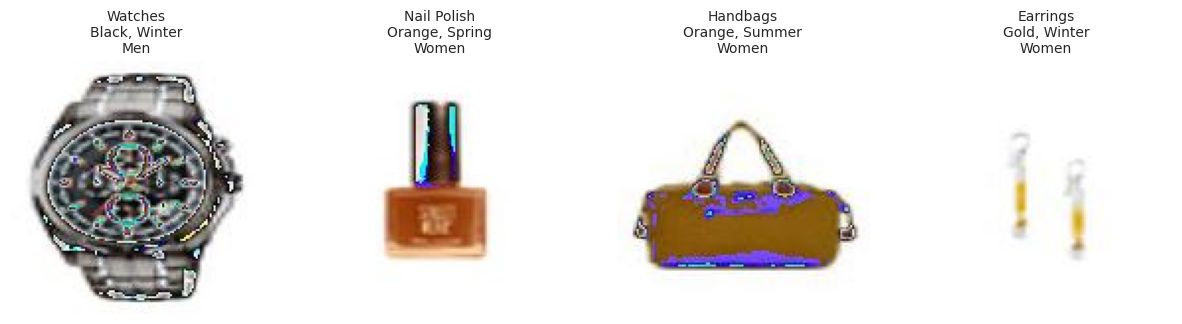

In [173]:
def show_multiple_predictions(model, test_dataset, transform, label_encoders, num_images=4):
    model.eval()
    
    # SELECTING RANDOM IMAGES FROM DATASET
    sample_indices = random.sample(range(len(test_dataset)), num_images)
    
    plt.figure(figsize=(15, 10))
    
    for i, idx in enumerate(sample_indices):
        image, labels = test_dataset[idx]

        # CONVERTING TENSOR IMAGE TO PIL IMAGE
        temp_path = "temp_test_image.jpg"
        transforms.ToPILImage()(image).save(temp_path)
        
        _, color, prod_type, season, gender = predict_image(temp_path, model, transform, label_encoders)
        
        # DISPLAYING IMAGE WITH PREDICTION
        plt.subplot(1, num_images, i + 1)
        plt.imshow(Image.open(temp_path))
        plt.axis('off')
        plt.title(f"{prod_type}\n{color}, {season}\n{gender}", fontsize=10)
    
    plt.show()

show_multiple_predictions(model, test_dataset, transform, label_encoders)


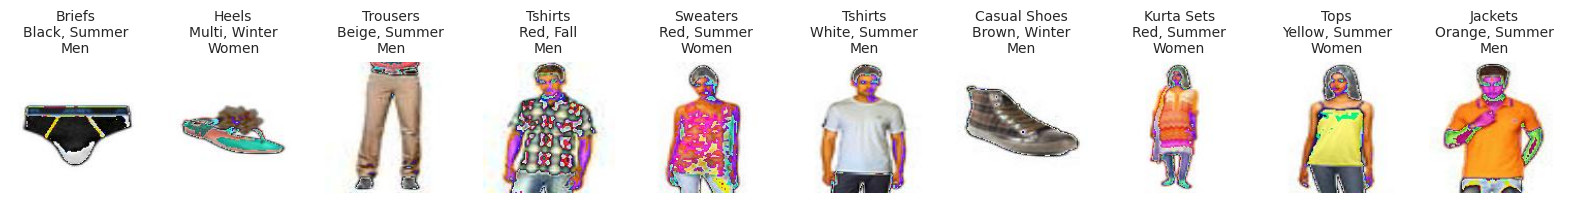

In [176]:
import random

num_samples = 10  
sample_indices = random.sample(range(len(test_dataset)), num_samples)

plt.figure(figsize=(20, 15))
for i, idx in enumerate(sample_indices):
    image, _ = test_dataset[idx]
    
    temp_path = "temp_test_image.jpg"
    transforms.ToPILImage()(image).save(temp_path)
    
    _, color, prod_type, season, gender = predict_image(temp_path, model, transform, label_encoders)
    
    plt.subplot(2, num_samples, i+1)
    plt.imshow(Image.open(temp_path))
    plt.axis('off')
    plt.title(f"{prod_type}\n{color}, {season}\n{gender}", fontsize=10)

plt.show()


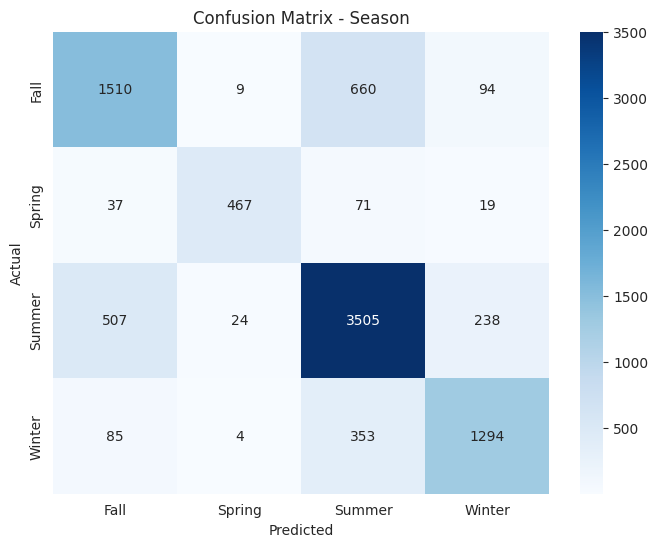

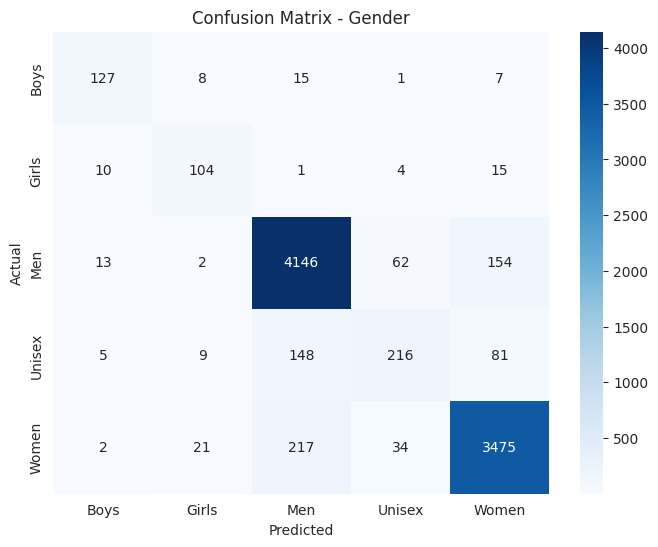

In [181]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    """Function to plot a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

def evaluate_model(model, test_loader, label_encoders):
    """Function to evaluate model and generate confusion matrices for each output."""
    model.eval()
    
    true_labels = {  "season": [], "gender": [] }
    pred_labels = {"season": [], "gender": [] }

    with torch.no_grad():
        for images, labels in test_loader:
            if images is None or labels is None:
                continue

            images, labels = images.to(device), labels.to(device)

            # Predictions
            color_out, type_out, season_out, gender_out = model(images)

            _, pred_color = torch.max(color_out, 1)
            _, pred_type = torch.max(type_out, 1)
            _, pred_season = torch.max(season_out, 1)
            _, pred_gender = torch.max(gender_out, 1)

   
            true_labels["season"].extend(labels[:, 2].cpu().numpy())
            true_labels["gender"].extend(labels[:, 3].cpu().numpy())

         
            pred_labels["season"].extend(pred_season.cpu().numpy())
            pred_labels["gender"].extend(pred_gender.cpu().numpy())

    # PLOTTING CONFUSION MATRIX FOR EACH CATEGORY
    categories = [ "season", "gender"]
    for cat in categories:
        class_names = label_encoders[cat].classes_  
        plot_confusion_matrix(true_labels[cat], pred_labels[cat], class_names, f"Confusion Matrix - {cat.capitalize()}")

evaluate_model(model, test_loader, label_encoders)


# TESTING PREDICTIONS USING AMAZON SCREENSHOTS

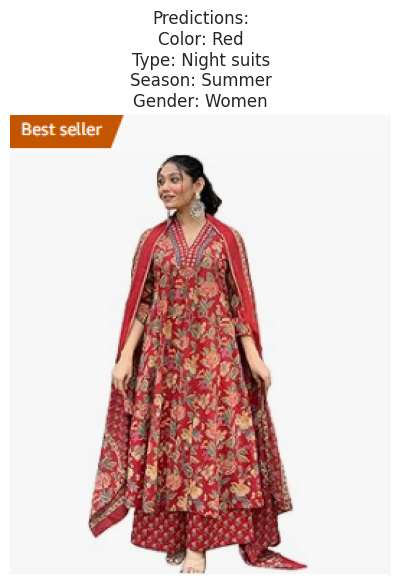

In [164]:
def show_predictions(image_path, model, transform, label_encoders):
    image_path, color, prod_type, season, gender = predict_image(image_path, model, transform, label_encoders)
    
    image = Image.open(image_path)
    
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predictions:\nColor: {color}\nType: {prod_type}\nSeason: {season}\nGender: {gender}", fontsize=12)
    plt.show()

test_image_path = "/kaggle/input/amazondata/Screenshot 2025-02-08 001011.png" 
show_predictions(test_image_path, model, transform, label_encoders)


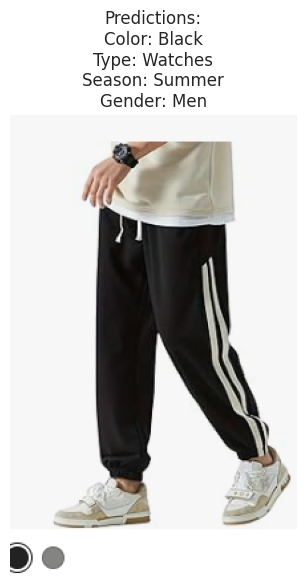

In [165]:
test_image_path = "/kaggle/input/amazondata/Screenshot 2025-02-08 001021.png" 
show_predictions(test_image_path, model, transform, label_encoders)


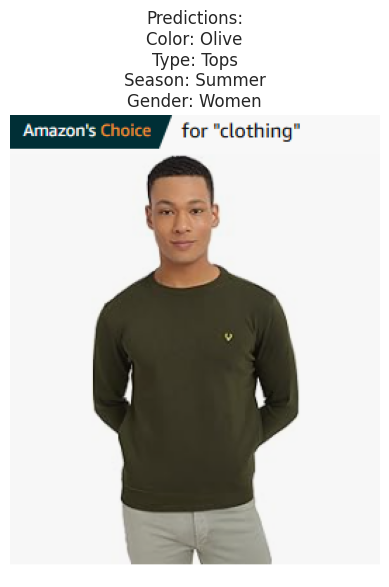

In [169]:
test_image_path = "/kaggle/input/amazondata/Screenshot 2025-02-08 001032.png" 
show_predictions(test_image_path, model, transform, label_encoders)

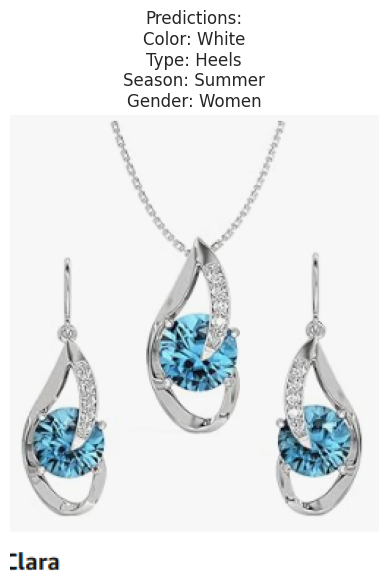

In [171]:
test_image_path = "/kaggle/input/amazondata/Screenshot 2025-02-08 001117.png" 
show_predictions(test_image_path, model, transform, label_encoders)

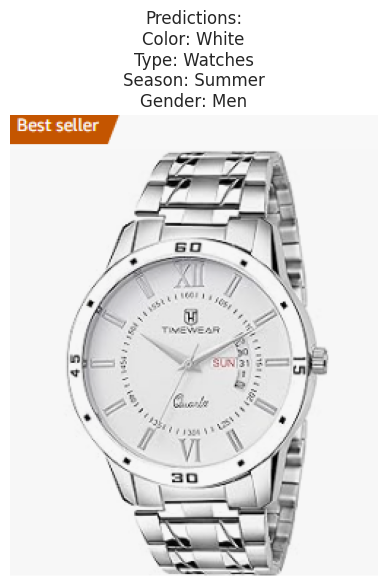

In [172]:
test_image_path = "/kaggle/input/amazondata/Screenshot 2025-02-08 001146.png"
show_predictions(test_image_path, model, transform, label_encoders)